In [2]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
import statsmodels.api as sm
import arch
import yfinance as yf

#### 株式市場

In [17]:
stock_code = "^N225"
nikkei = yf.download(stock_code, start="1960-01-01", end="2023-05-31")
nikkei

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1965-01-05,1257.719971,1257.719971,1257.719971,1257.719971,1257.719971,0
1965-01-06,1263.989990,1263.989990,1263.989990,1263.989990,1263.989990,0
1965-01-07,1274.270020,1274.270020,1274.270020,1274.270020,1274.270020,0
1965-01-08,1286.430054,1286.430054,1286.430054,1286.430054,1286.430054,0
1965-01-12,1288.540039,1288.540039,1288.540039,1288.540039,1288.540039,0
...,...,...,...,...,...,...
2023-05-10,29189.410156,29195.160156,29070.109375,29122.179688,29122.179688,87300000
2023-05-11,29110.789062,29165.589844,29028.710938,29126.720703,29126.720703,82200000
2023-05-12,29199.300781,29426.060547,29141.519531,29388.300781,29388.300781,106100000


In [18]:
nikkei['Adj Close']

Date
1965-01-05     1257.719971
1965-01-06     1263.989990
1965-01-07     1274.270020
1965-01-08     1286.430054
1965-01-12     1288.540039
                  ...     
2023-05-10    29122.179688
2023-05-11    29126.720703
2023-05-12    29388.300781
2023-05-15    29626.339844
2023-05-16    29842.990234
Name: Adj Close, Length: 14351, dtype: float64

Text(0.5, 1.0, 'Nikkei 225 Index')

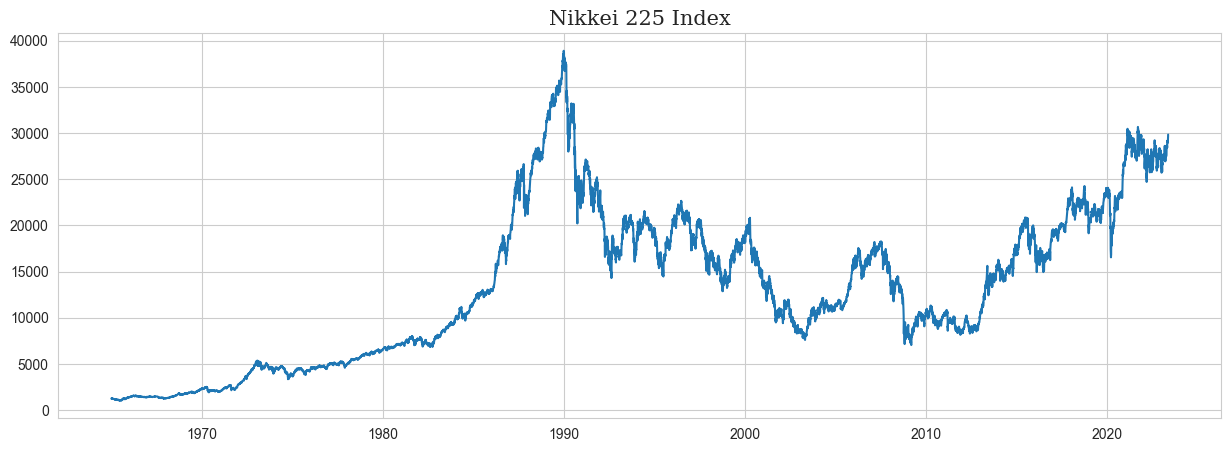

In [19]:
plt.figure(figsize = (15,5))
plt.plot(nikkei['Adj Close'])
plt.title('Nikkei 225 Index', fontfamily = 'Serif', fontsize = 15)

In [20]:
stock_code = "^N225"
nikkei5 = yf.download(stock_code, start="2019-01-01", end="2023-05-31")
nikkei5

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-04,19655.130859,19692.580078,19241.369141,19561.960938,19561.960938,91600000
2019-01-07,19944.609375,20266.220703,19920.800781,20038.970703,20038.970703,81500000
2019-01-08,20224.669922,20347.919922,20106.359375,20204.039062,20204.039062,86400000
2019-01-09,20366.300781,20494.349609,20331.199219,20427.060547,20427.060547,72800000
2019-01-10,20270.880859,20345.919922,20101.929688,20163.800781,20163.800781,73700000
...,...,...,...,...,...,...
2023-05-10,29189.410156,29195.160156,29070.109375,29122.179688,29122.179688,87300000
2023-05-11,29110.789062,29165.589844,29028.710938,29126.720703,29126.720703,82200000
2023-05-12,29199.300781,29426.060547,29141.519531,29388.300781,29388.300781,106100000


Text(0.5, 1.0, 'Nikkei 225 Index')

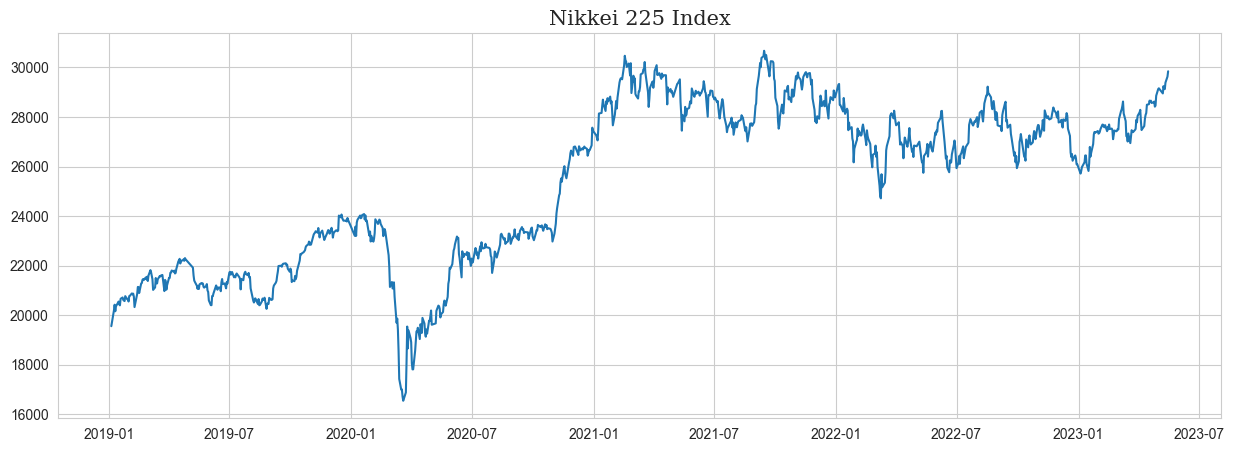

In [21]:
plt.figure(figsize = (15,5))
plt.plot(nikkei5['Adj Close'])
plt.title('Nikkei 225 Index', fontfamily = 'Serif', fontsize = 15)

#### 実質GDP増加率

In [30]:
gdp = pd.read_csv('./Data/GDPrate.csv', index_col = 2)
gdp = gdp.Value.astype(float)

In [38]:
gdp.index = pd.date_range(start = '1980-04-01', end = '2022-12-31', freq = 'Q')
gdp

1980-06-30   -0.5
1980-09-30    2.2
1980-12-31    2.1
1981-03-31    0.6
1981-06-30    1.2
             ... 
2021-12-31    1.1
2022-03-31   -0.5
2022-06-30    1.2
2022-09-30   -0.3
2022-12-31    0.0
Freq: Q-DEC, Name: Value, Length: 171, dtype: float64

Text(0.5, 1.0, 'real GDP rate')

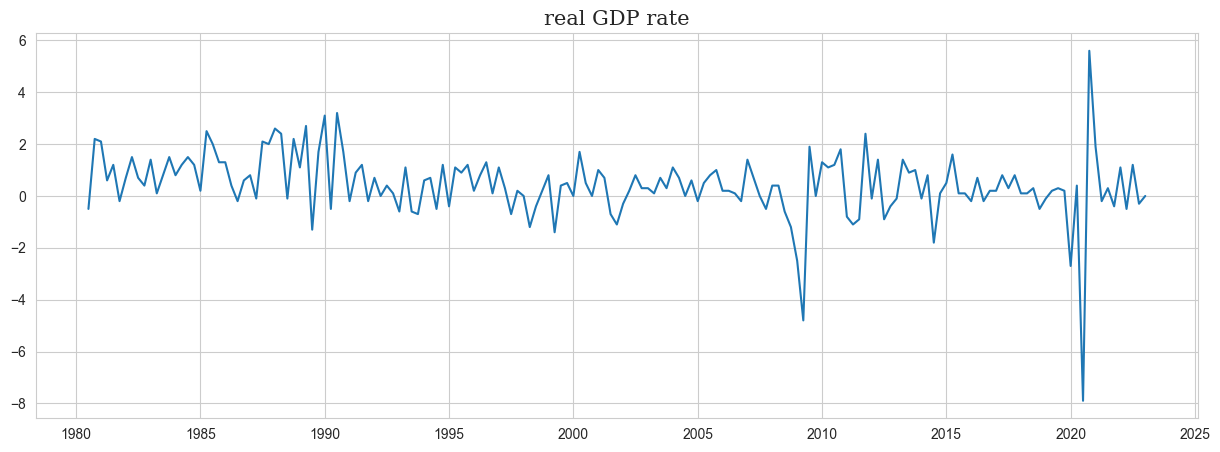

In [40]:
plt.figure(figsize = (15,5))
plt.plot(gdp)
plt.title('real GDP rate', fontfamily = 'Serif', fontsize = 15)

Text(0.5, 1.0, 'real GDP index')

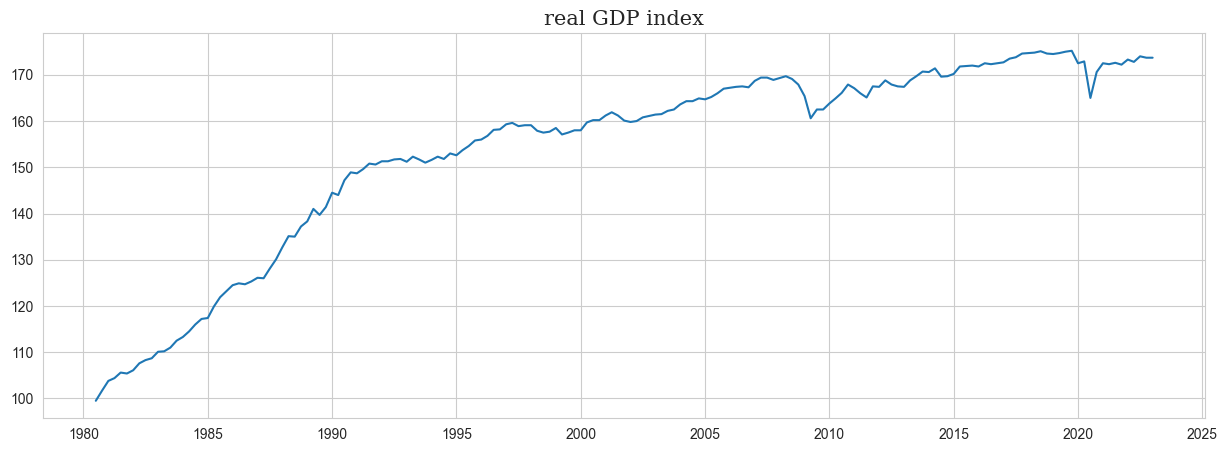

In [41]:
plt.figure(figsize=(15, 5))
plt.plot(gdp.cumsum() + 100)
plt.title('real GDP index', fontfamily='Serif', fontsize=15)

#### 失業率

In [49]:
unemploy = pd.read_csv('./Data/unemployment.csv', index_col = 2)
unemploy = unemploy.Value.astype(float) * 0.01
unemploy.index = pd.date_range(start = '1953-01-01', end = '2023-03-31', freq = 'M')

In [50]:
unemploy

1953-01-31    0.019
1953-02-28    0.019
1953-03-31    0.018
1953-04-30    0.020
1953-05-31    0.020
              ...  
2022-11-30    0.025
2022-12-31    0.025
2023-01-31    0.024
2023-02-28    0.026
2023-03-31    0.028
Freq: M, Name: Value, Length: 843, dtype: float64

Text(0.5, 1.0, 'Unemployment Rate')

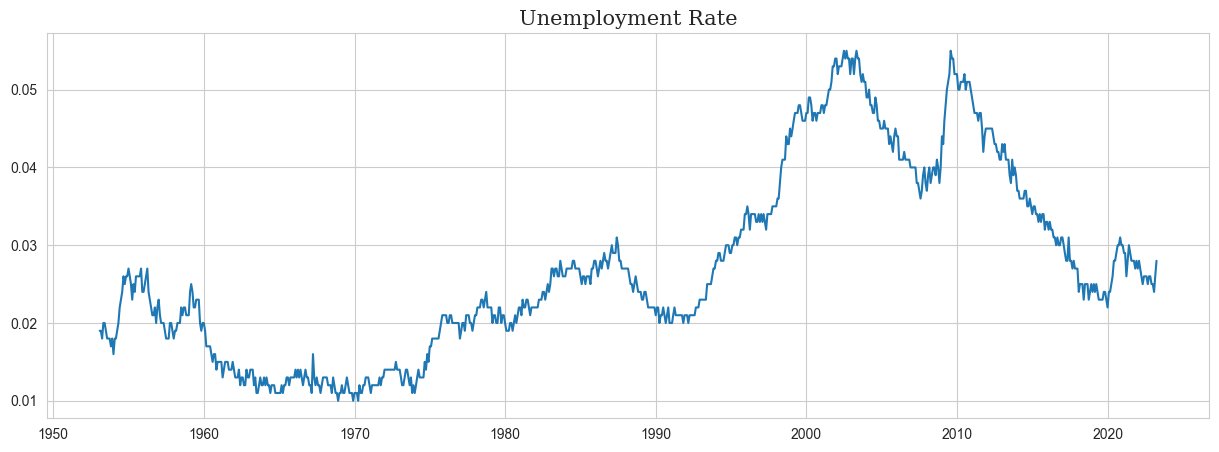

In [51]:
plt.figure(figsize=(15, 5))
plt.plot(unemploy)
plt.title('Unemployment Rate', fontfamily='Serif', fontsize=15)

#### 金利

In [58]:
interest = pd.read_csv('./Data/interest.csv', index_col = 2)
interest = interest.Value.astype(float) * 0.01

In [59]:
interest.index = pd.to_datetime(interest.index)

In [60]:
interest

DateTime
1972-10-02    0.0425
1972-11-03    0.0425
1972-12-01    0.0425
1973-01-05    0.0425
1973-02-02    0.0425
               ...  
2022-12-20   -0.0010
2023-01-18   -0.0010
2023-02-28   -0.0010
2023-03-10   -0.0010
2023-04-28   -0.0010
Name: Value, Length: 655, dtype: float64

Text(0.5, 1.0, 'Unemployment Rate')

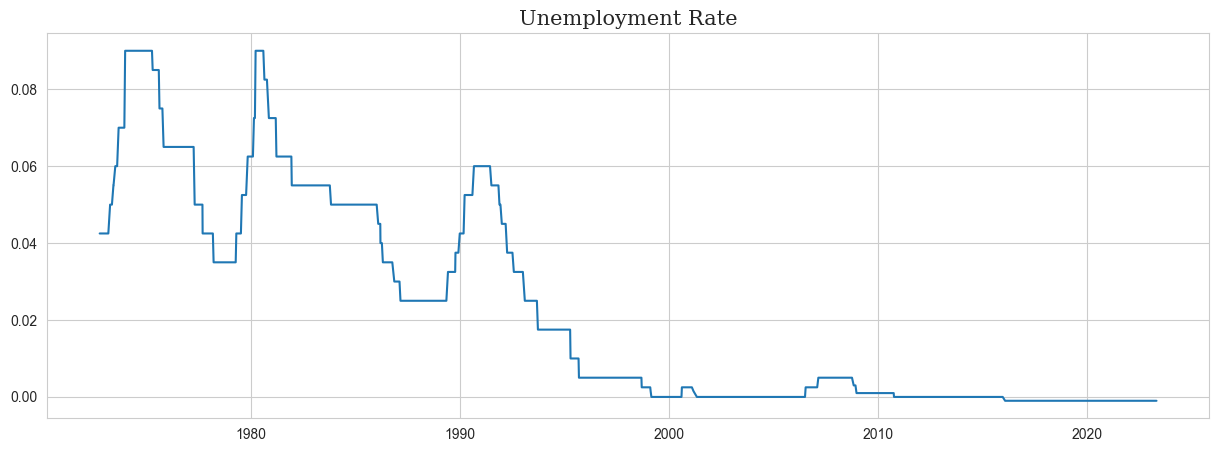

In [61]:
plt.figure(figsize=(15, 5))
plt.plot(interest)
plt.title('Unemployment Rate', fontfamily='Serif', fontsize=15)

### 時系列分析
まず、株式市場の分析する。

In [66]:
nikkei_ret = np.log(nikkei['Adj Close']) - np.log(nikkei['Adj Close'].shift(1))
nikkei_ret = nikkei_ret.dropna()
nikkei_ret

Date
1965-01-06    0.004973
1965-01-07    0.008100
1965-01-08    0.009498
1965-01-12    0.001639
1965-01-13   -0.005346
                ...   
2023-05-10   -0.004134
2023-05-11    0.000156
2023-05-12    0.008941
2023-05-15    0.008067
2023-05-16    0.007286
Name: Adj Close, Length: 14350, dtype: float64

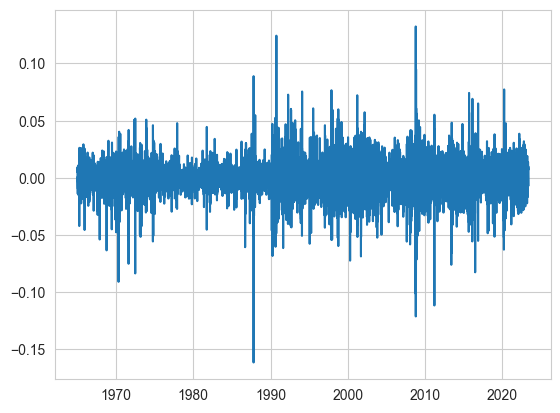

In [67]:
plt.plot(nikkei_ret)

<Figure size 1000x800 with 0 Axes>

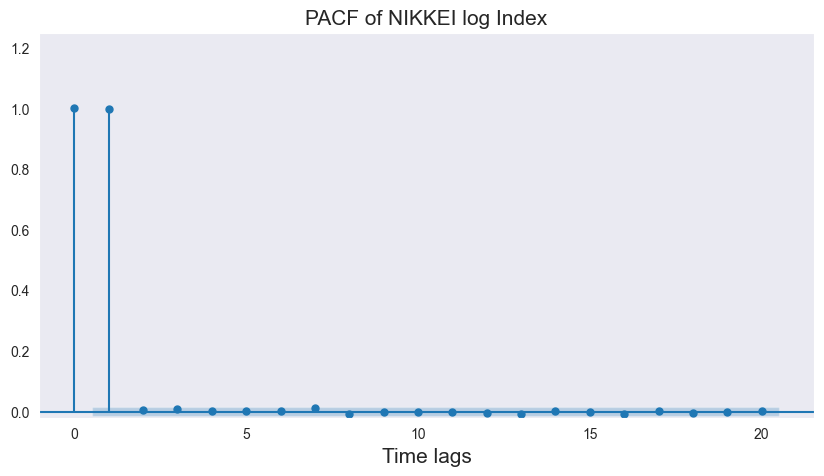

In [84]:
import statsmodels.tsa.stattools as tsa
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.figure(figsize = (10,8))
fig, ax = plt.subplots(figsize=(10, 5))
plot_pacf(np.log(nikkei['Adj Close']), auto_ylims = True, lags = 20, title = 'PACF of KOSPI log Index', ax = ax)
plt.xlabel('Time lags', fontsize = 15)
plt.title('PACF of NIKKEI log Index', fontsize = 15)
plt.show()

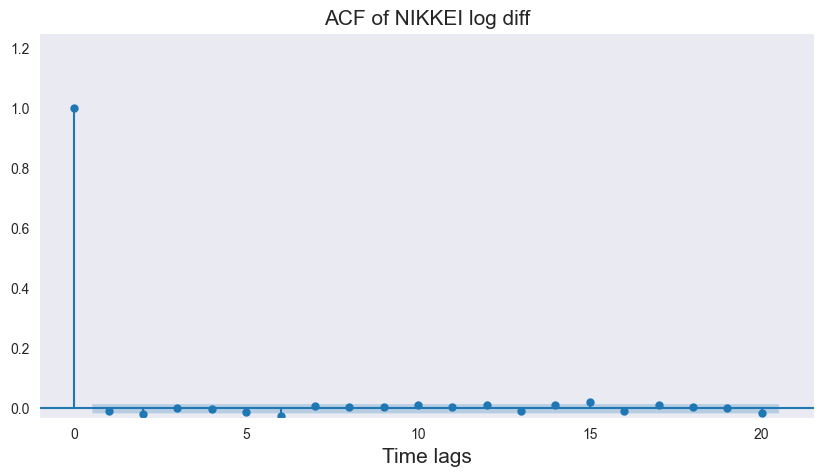

In [85]:
fig, ax = plt.subplots(figsize=(10, 5))
plot_acf(nikkei_ret, auto_ylims = True, lags = 20, title = 'ACF of KOSPI log Index' , ax = ax)
plt.xlabel('Time lags', fontsize = 15)
plt.title('ACF of NIKKEI log diff', fontsize = 15)
plt.show()

In [88]:
import statsmodels.api as sm
model = sm.tsa.ARIMA(nikkei['Adj Close'], order = (1,0,2), trend = 'c').fit(method = 'innovations_mle')
model.summary()

/Users/tommylee/Desktop/Pycharm/JapaneseIssue/venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/tommylee/Desktop/Pycharm/JapaneseIssue/venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/tommylee/Desktop/Pycharm/JapaneseIssue/venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              Adj Close   No. Observations:                14351
Model:                 ARIMA(1, 0, 2)   Log Likelihood              -96528.824
Date:                Wed, 17 May 2023   AIC                         193067.648
Time:                        01:01:00   BIC                         193105.506
Sample:                             0   HQIC                        193080.236
                              - 14351                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.432e+04      0.187   7.64e+04      0.000    1.43e+04    1.43e+04
ar.L1          0.9998      0.000   5414.099      0.000       0.999       1.000
ma.L1         -0.0019      0.003     -0.563      0.574      -0.009       0.005
ma.L2         -0.0336      0.004     -7.528      0.000      -0.042      -0.025
sigma2      4.071e+04    153.915    264.471      0.000    4.04e+04     4.1e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):            210681.61
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):              33.97   Skew:                            -0.55
Prob(H) (two-sided):                  0.00   Kurtosis:                        21.74
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 5.34e+18. Standard errors may be unstable.
"""

<Figure size 1000x800 with 0 Axes>

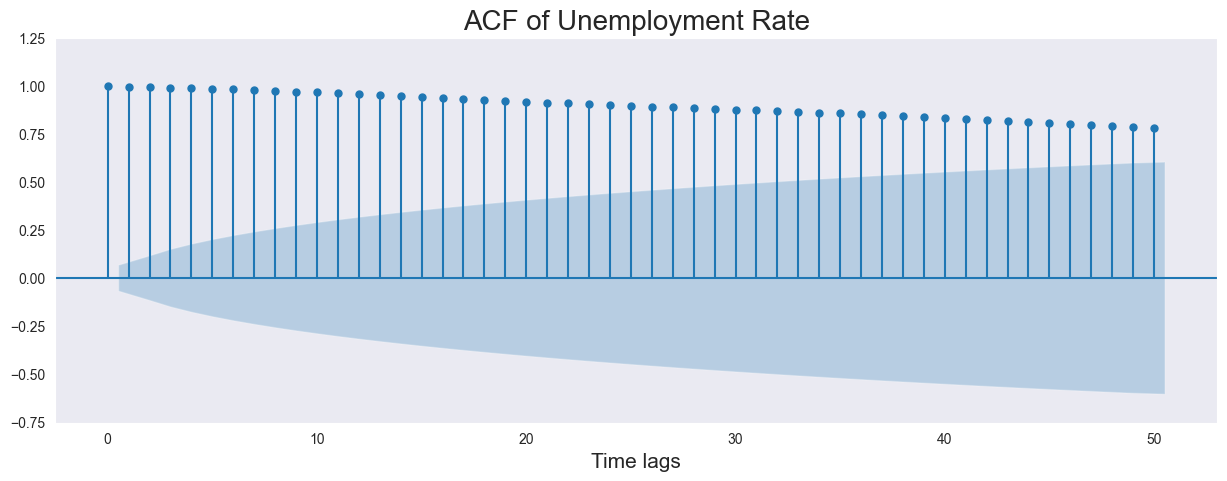

In [96]:
sns.set_style("dark")
plt.figure(figsize = (10,8))
fig, ax = plt.subplots(figsize=(15, 5))
plot_acf(unemploy, auto_ylims = True, lags = 50, ax = ax)
plt.title('ACF of Unemployment Rate', fontsize = 20)
plt.xlabel('Time lags', fontsize = 15)
plt.show()

<Figure size 1000x800 with 0 Axes>

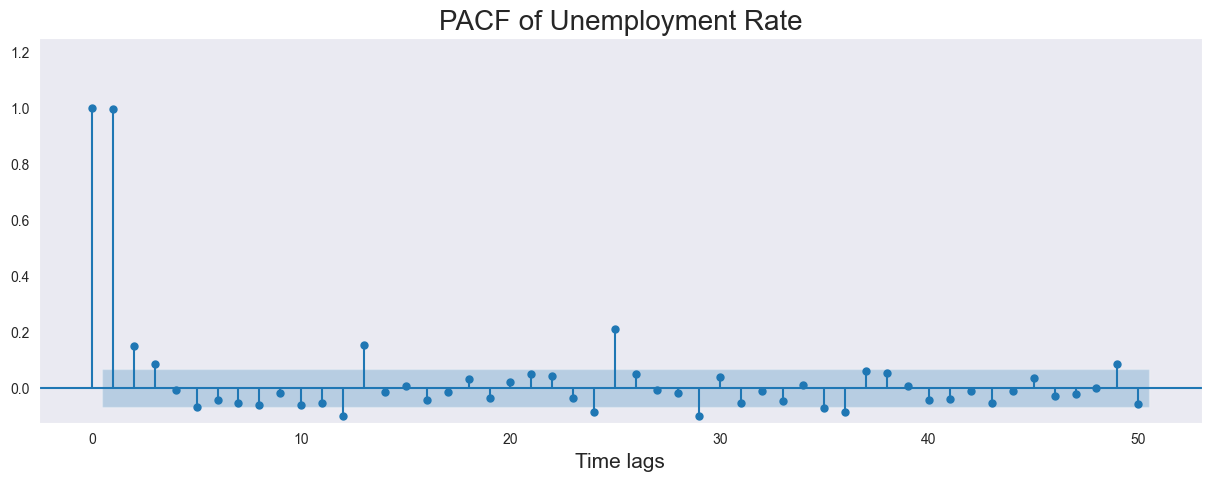

In [97]:
plt.figure(figsize = (10,8))
fig, ax = plt.subplots(figsize=(15, 5))
plot_pacf(unemploy, auto_ylims = True, lags = 50, ax = ax)
plt.xlabel('Time lags', fontsize = 15)
plt.title('PACF of Unemployment Rate', fontsize = 20)
plt.show()

In [98]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [100]:
import itertools
import statsmodels.api as sm

p = d = q = range(0, 3)
pdq = list(itertools.product(p, d, q))
pdqs = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

def sarimax_gridsearch(ts, pdq, pdqs, maxiter = 50, freq = 'M'):
    ans = []
    for comb in pdq:
        for combs in pdqs:
            try:
                mod = sm.tsa.statespace.SARIMAX(ts, order = comb, seasonal_order = combs,
                                                enforce_stationarity=False, enforce_invertibility=False)
                output = mod.fit(maxiter = maxiter)
                ans.append([comb, combs, output.bic])
                print('SARIMAX {} x {}12 : BIC Calculated ={}'.format(comb, combs, output.bic))
            except:
                continue

    ans_df = pd.DataFrame(ans, columns=['pdq', 'pdqs', 'bic'])
    ans_df = ans_df.sort_values(by=['bic'], ascending=True)[0:5]

    return ans_df

sarimax_gridsearch(unemploy, pdq, pdqs, freq='M')

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.09391D+00    |proj g|=  1.22950D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      2     20      1     0     0   4.929D-04  -2.094D+00
  F =  -2.0939139726477207     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (0, 0, 0) x (0, 0, 0, 12)12 : BIC Calculated =-3523.6031778698148
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f= -2.65687D+00    |proj g|=  1.00633D+00

At iterate   10    f= -2.67681D+00    |proj g|=  1.23126D+01

At iterate   15    f= -2.68396D+00    |proj g|=  6.20325D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     16     30      1     0     0   2.905D-03  -2.684D+00
  F =  -2.6839560205123028     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (0, 0, 0) x (0, 0, 1, 12)12 : BIC Calculated =-4511.706999182161
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the boun

 This problem is unconstrained.



At iterate    5    f= -2.94898D+00    |proj g|=  1.10362D+00

At iterate   10    f= -2.95719D+00    |proj g|=  1.34939D+01

At iterate   15    f= -3.11550D+00    |proj g|=  5.19671D+00

At iterate   20    f= -3.11606D+00    |proj g|=  2.20548D-01

At iterate   25    f= -3.11617D+00    |proj g|=  1.18271D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     29     54      1     0     0   3.514D-02  -3.116D+00
  F =  -3.1162188816080905     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (0, 0, 0) x (0, 0, 2, 12)12 : BIC Calculated =-5233.824447381432
RUNNING THE L-BFGS-B CODE

           * 

 This problem is unconstrained.
 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.15498D+00    |proj g|=  7.68577D+00



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      2     46      2     0     0   4.870D-01  -4.155D+00
  F =  -4.1551196324972457     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (0, 0, 0) x (0, 1, 1, 12)12 : BIC Calculated =-6992.11797571715
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.07437D+00    |proj g|=  4.51474D+00

At iterate    5    f= -4.07445D+00    |proj g|=  1.08505D+00

At iterate   10    f= -4.07547D+00    |proj g|=  1.92759D+0


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     29     57      1     0     0   2.871D-01  -4.119D+00
  F =  -4.1194244076666999     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (0, 0, 0) x (0, 1, 2, 12)12 : BIC Calculated =-6925.273300098536
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.90829D+00    |proj g|=  5.19805D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number o

 This problem is unconstrained.


  ys=-2.878E-09  -gs= 2.132E-07 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate    5    f= -4.00923D+00    |proj g|=  1.53462D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      6     55      2     1     0   1.535D-01  -4.009D+00
  F =  -4.0092317746972812     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


SARIMAX (0, 0, 0) x (0, 2, 1, 12)12 : BIC Calculated =-6746.180604654603
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.99739D+00    |proj g|=  6.96829D+01


 This problem is unconstrained.



At iterate    5    f= -4.02225D+00    |proj g|=  1.05016D-01

At iterate   10    f= -4.02229D+00    |proj g|=  2.28823D+00

At iterate   15    f= -4.02384D+00    |proj g|=  1.55797D+01

At iterate   20    f= -4.02492D+00    |proj g|=  5.05722D-02

At iterate   25    f= -4.02505D+00    |proj g|=  2.17610D-01

At iterate   30    f= -4.02872D+00    |proj g|=  7.58237D+00



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     34     55      1     0     0   3.056D-01  -4.029D+00
  F =  -4.0289517397572281     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (0, 0, 0) x (0, 2, 2, 12)12 : BIC Calculated =-6772.781382846945
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.19050D+00    |proj g|=  8.25147D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number o

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.13405D+00    |proj g|=  6.07294D+00

At iterate    5    f= -4.13419D+00    |proj g|=  3.02649D-01


 This problem is unconstrained.



At iterate   10    f= -4.13420D+00    |proj g|=  1.67648D+00

At iterate   15    f= -4.13504D+00    |proj g|=  1.37295D+01

At iterate   20    f= -4.13620D+00    |proj g|=  4.60277D-01

At iterate   25    f= -4.13696D+00    |proj g|=  8.59702D+00

At iterate   30    f= -4.16596D+00    |proj g|=  5.64590D+01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   35    f= -4.18009D+00    |proj g|=  4.27889D+00
  ys=-2.420E-02  -gs= 3.617E-03 BFGS update SKIPPED

At iterate   40    f= -4.18012D+00    |proj g|=  3.82013D-01

At iterate   45    f= -4.18025D+00    |proj g|=  6.06060D+00

At iterate   50    f= -4.18243D+00    |proj g|=  3.88693D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     50     91      3     1     0   3.887D+00  -4.182D+00
  F =  -4.1824261672237562     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


/Users/tommylee/Desktop/Pycharm/JapaneseIssue/venv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


SARIMAX (0, 0, 0) x (1, 0, 2, 12)12 : BIC Calculated =-7024.743068592842
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.16557D+00    |proj g|=  8.74880D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      1     12      1     0     0   8.699D-01  -4.166D+00
  F =  -4.1655671529620655     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (0, 0, 0) x (1, 1, 0, 12)12 : BIC Calculated =-7009.730051726337
RUNNING THE L-BFGS-B CODE

           * * *

Mac

 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      2     16      1     0     0   7.759D-01  -4.151D+00
  F =  -4.1508231857888562     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (0, 0, 0) x (1, 1, 1, 12)12 : BIC Calculated =-6978.167304230204
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.07383D+00    |proj g|=  2.44107D+01


 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f= -4.07553D+00    |proj g|=  6.09929D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      5     22      1     0     0   6.099D-01  -4.076D+00
  F =  -4.0755341555924431     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (0, 0, 0) x (1, 1, 2, 12)12 : BIC Calculated =-6844.582251358833
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.91379D+00    |proj g|=  6.08896D-01


/Users/tommylee/Desktop/Pycharm/JapaneseIssue/venv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      1     21      1     0     0   6.089D-01  -3.914D+00
  F =  -3.9137906232859239     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMAX (0, 0, 0) x (1, 2, 0, 12)12 : BIC Calculated =-6585.264343523528
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.96341D+00    |proj g|=  1.52372D+01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number o


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


SARIMAX (0, 0, 0) x (1, 2, 1, 12)12 : BIC Calculated =-6663.774909337242
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.00274D+00    |proj g|=  5.21346D+01


 This problem is unconstrained.



At iterate    5    f= -4.01465D+00    |proj g|=  1.45663D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      5     34      1     0     0   1.457D-01  -4.015D+00
  F =  -4.0146530888652885     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


SARIMAX (0, 0, 0) x (1, 2, 2, 12)12 : BIC Calculated =-6741.996773981888
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.16780D+00    |proj g|=  8.67750D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      2     23      1     0     0   7.744D-01  -4.168D+00
  F =  -4.1677964144167419     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


SARIMAX (0, 0, 0) x (2, 0, 0, 12)12 : BIC Calculated =-7006.780502455068
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.13517D+00    |proj g|=  2.30341D+01

At iterate    5    f= -4.13671D+00    |proj g|=  8.67605D-01

At iterate   10    f= -4.13727D+00    |proj g|=  6.38727D+00


 This problem is unconstrained.



At iterate   15    f= -4.13747D+00    |proj g|=  1.09101D+00

At iterate   20    f= -4.13912D+00    |proj g|=  1.41729D+01

At iterate   25    f= -4.15985D+00    |proj g|=  2.03800D+01

At iterate   30    f= -4.16339D+00    |proj g|=  1.54347D-01

At iterate   35    f= -4.17316D+00    |proj g|=  2.29886D+01

At iterate   40    f= -4.18256D+00    |proj g|=  2.89510D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     43     66      1     0     0   1.458D-01  -4.183D+00
  F =  -4.1826390584219881     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (0, 0, 0) x (2, 0, 1, 12)12 : BIC Calculate

 This problem is unconstrained.



At iterate    5    f= -4.13620D+00    |proj g|=  5.41602D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      5     18      1     0     0   5.416D-01  -4.136D+00
  F =  -4.1361974799118597     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (0, 0, 0) x (2, 0, 2, 12)12 : BIC Calculated =-6940.094639448382
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.11876D+00    |proj g|=  8.87998D-01


 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      1     12      1     0     0   8.853D-01  -4.119D+00
  F =  -4.1187570480249134     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (0, 0, 0) x (2, 1, 0, 12)12 : BIC Calculated =-6924.144411965195
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.09827D+00    |proj g|=  1.31065D+01


 This problem is unconstrained.



At iterate    5    f= -4.09881D+00    |proj g|=  3.67083D-01

At iterate   10    f= -4.09881D+00    |proj g|=  5.69480D-01

At iterate   15    f= -4.09897D+00    |proj g|=  8.69960D+00

At iterate   20    f= -4.11095D+00    |proj g|=  3.43534D+01

At iterate   25    f= -4.11474D+00    |proj g|=  3.87033D-02

At iterate   30    f= -4.11592D+00    |proj g|=  2.41250D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     33     61      1     0     0   3.561D-02  -4.116D+00
  F =  -4.1160101937183757     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (0, 0, 0) x (2, 1, 1, 12)12 : BIC Calculate

 This problem is unconstrained.



At iterate    5    f= -4.08256D+00    |proj g|=  6.06799D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      5     18      1     0     0   6.068D-01  -4.083D+00
  F =  -4.0825567864145329     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (0, 0, 0) x (2, 1, 2, 12)12 : BIC Calculated =-6849.73032318237
RUNNING THE L-BFGS-B CODE

           * * *



 This problem is unconstrained.


Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.96996D+00    |proj g|=  7.22502D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/tommylee/Desktop/Pycharm/JapaneseIssue/venv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      3     52      2     0     0   5.250D-01  -3.970D+00
  F =  -3.9699650312538224     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMAX (0, 0, 0) x (2, 2, 0, 12)12 : BIC Calculated =-6673.326016349982
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.97486D+00    |proj g|=  4.21657D+00


 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/tommylee/Desktop/Pycharm/JapaneseIssue/venv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      4     52      2     0     0   1.431D-01  -3.975D+00
  F =  -3.9749362414110903     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMAX (0, 0, 0) x (2, 2, 1, 12)12 : BIC Calculated =-6675.029134560481
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.96020D+00    |proj g|=  1.62366D+01


 This problem is unconstrained.



At iterate    5    f= -3.96111D+00    |proj g|=  1.03754D+00

At iterate   10    f= -3.96255D+00    |proj g|=  2.17678D+01

At iterate   15    f= -3.98888D+00    |proj g|=  7.45185D+00

At iterate   20    f= -3.98910D+00    |proj g|=  2.47517D-01

At iterate   25    f= -3.99000D+00    |proj g|=  8.21787D+00

At iterate   30    f= -3.99790D+00    |proj g|=  3.63674D+01

At iterate   35    f= -4.02144D+00    |proj g|=  1.17879D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     39     74      1     0     0   9.969D-02  -4.021D+00
  F =  -4.0214575417666962     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f= -3.18969D+00    |proj g|=  6.76954D-01

At iterate   10    f= -3.19849D+00    |proj g|=  2.05815D+01

At iterate   15    f= -3.23808D+00    |proj g|=  2.09291D+00

At iterate   20    f= -3.24968D+00    |proj g|=  1.98329D+01

At iterate   25    f= -3.27962D+00    |proj g|=  1.03752D+01

At iterate   30    f= -3.28447D+00    |proj g|=  5.65630D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     31     51      1     0     0   5.656D-03  -3.284D+00
  F =  -3.2844730172531031     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (0, 0, 1) x (0, 0, 1, 12)12 : BIC Calculate

 This problem is unconstrained.


  ys=-5.547E-02  -gs= 6.955E-01 BFGS update SKIPPED

At iterate    5    f= -3.42831D+00    |proj g|=  3.64261D-01

At iterate   10    f= -3.54221D+00    |proj g|=  3.55549D+00

At iterate   15    f= -3.54256D+00    |proj g|=  1.45584D-01

At iterate   20    f= -3.54507D+00    |proj g|=  1.11496D+00

At iterate   25    f= -3.56280D+00    |proj g|=  1.60996D+01

At iterate   30    f= -3.58503D+00    |proj g|=  2.33557D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     34     66      2     1     0   2.201D-02  -3.585D+00
  F =  -3.5851997259047645     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             

 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/tommylee/Desktop/Pycharm/JapaneseIssue/venv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      5     60      2     0     0   2.358D+00  -4.550D+00
  F =  -4.5498370110276420     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMAX (0, 0, 1) x (0, 1, 0, 12)12 : BIC Calculated =-7657.584760282334
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.41098D+00    |proj g|=  1.45396D+02



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      4     32      1     0     0   2.067D+00  -4.499D+00
  F =  -4.4989964849067121     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (0, 0, 1) x (0, 1, 1, 12)12 : BIC Calculated =-7565.191156268136
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.34441D+00    |proj g|=  1.42203D+02

At iterate    5    f= -4.42948D+00    |proj g|=  1.54313D+00

           * * *

Tit   = total number of iterations
Tnf  


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f= -4.17020D+00    |proj g|=  3.50714D-01
  ys=-9.684E-07  -gs= 1.354E-06 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      6     31      1     1     0   3.507D-01  -4.170D+00
  F =  -4.1701956966900777     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (0, 0, 1) x (0, 2, 0, 12)12 : BIC Calculated =-7017.53866642975
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.20491D+00    |proj g|=  1.37153D+02



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/tommylee/Desktop/Pycharm/JapaneseIssue/venv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      5     53      2     0     0   2.428D-01  -4.331D+00
  F =  -4.3308135876931546     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMAX (0, 0, 1) x (0, 2, 1, 12)12 : BIC Calculated =-7281.6791820184035


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.16463D+00    |proj g|=  1.53821D+02

At iterate    5    f= -4.34438D+00    |proj g|=  1.02927D+00



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      7     34      1     0     0   6.458D-02  -4.344D+00
  F =  -4.3443914947062749     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (0, 0, 1) x (0, 2, 2, 12)12 : BIC Calculated =-7297.94076718824
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.55515D+00    |proj g|=  3.29113D+01
  ys=-2.914E+00  -gs= 8.724E-01 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total nu

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


SARIMAX (0, 0, 1) x (1, 0, 0, 12)12 : BIC Calculated =-7670.078803942147
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.54899D+00    |proj g|=  3.28317D+01
  ys=-2.901E+00  -gs= 8.703E-01 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      4     34      2     1     0   8.678D-02  -4.550D+00
  F =  -4.5495217288541054     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


SARIMAX (0, 0, 1) x (1, 0, 1, 12)12 : BIC Calculated =-7643.61275422748
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.51195D+00    |proj g|=  3.23594D+01
  ys=-2.915E+00  -gs= 8.577E-01 BFGS update SKIPPED


 This problem is unconstrained.



At iterate    5    f= -4.48988D+00    |proj g|=  1.41551D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      5     25      2     1     0   1.416D+00  -4.490D+00
  F =  -4.4898829697169873     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (0, 0, 1) x (1, 0, 2, 12)12 : BIC Calculated =-7536.41449146854
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.41046D+00    |proj g|=  1.39150D+02


 This problem is unconstrained.



At iterate    5    f= -4.48882D+00    |proj g|=  1.67301D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      5     24      1     0     0   1.673D+00  -4.489D+00
  F =  -4.4888234235462781     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (0, 0, 1) x (1, 1, 0, 12)12 : BIC Calculated =-7548.032039847466
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.40998D+00    |proj g|=  1.44983D+02


 This problem is unconstrained.



At iterate    5    f= -4.49733D+00    |proj g|=  7.55984D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      6     24      1     0     0   7.610D-01  -4.497D+00
  F =  -4.4973291958995345     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (0, 0, 1) x (1, 1, 1, 12)12 : BIC Calculated =-7555.674467907175
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.34432D+00    |proj g|=  1.42140D+02


 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/tommylee/Desktop/Pycharm/JapaneseIssue/venv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      5     55      2     0     0   1.560D+00  -4.429D+00
  F =  -4.4293298350185468     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMAX (0, 0, 1) x (1, 1, 2, 12)12 : BIC Calculated =-7434.395890454177
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.15337D+00    |proj g|=  1.05547D+02

At iterate    5    f= -4.21688D+00    |proj g|=  1.81277D-01


 This problem is unconstrained.



At iterate   10    f= -4.21689D+00    |proj g|=  1.14890D-01
  ys=-2.839E-05  -gs= 2.583E-05 BFGS update SKIPPED

At iterate   15    f= -4.21697D+00    |proj g|=  4.11677D-01

At iterate   20    f= -4.21704D+00    |proj g|=  5.58723D-01
  ys=-1.986E-15  -gs= 8.822E-15 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     24     67      1     2     0   4.030D-01  -4.217D+00
  F =  -4.2170489058802829     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (0, 0, 1) x (1, 2, 0, 12)12 : BIC Calculated =-7089.864484309348
RUNNING THE L-BFGS-B CODE

           * * *

Machine precisi

 This problem is unconstrained.



At iterate    5    f= -4.29798D+00    |proj g|=  2.08121D-01
  ys=-4.513E-14  -gs= 1.919E-12 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      6     40      1     1     0   2.081D-01  -4.298D+00
  F =  -4.2979824278379706     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


SARIMAX (0, 0, 1) x (1, 2, 1, 12)12 : BIC Calculated =-7219.635004225143
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.17035D+00    |proj g|=  1.53189D+02


 This problem is unconstrained.



At iterate    5    f= -4.34790D+00    |proj g|=  7.21093D-01
  ys=-3.450E-14  -gs= 2.871E-13 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/tommylee/Desktop/Pycharm/JapaneseIssue/venv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     10    103      3     1     0   1.062D-01  -4.348D+00
  F =  -4.3479022595278387     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMAX (0, 0, 1) x (1, 2, 2, 12)12 : BIC Calculated =-7297.184093455761
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.51819D+00    |proj g|=  3.24325D+01
  ys=-2.800E+00  -gs= 8.597E-01 BFGS update SKIPPED


 This problem is unconstrained.



At iterate    5    f= -4.48715D+00    |proj g|=  1.60019D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      6     39      2     1     0   1.550D+00  -4.487D+00
  F =  -4.4871545083291862     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (0, 0, 1) x (2, 0, 0, 12)12 : BIC Calculated =-7538.510164707595
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.51778D+00    |proj g|=  3.24411D+01


 This problem is unconstrained.


  ys=-2.977E+00  -gs= 8.599E-01 BFGS update SKIPPED

At iterate    5    f= -4.50696D+00    |proj g|=  1.53722D+00



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      7     50      2     1     0   1.523D+00  -4.507D+00
  F =  -4.5069576434549266     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (0, 0, 1) x (2, 0, 1, 12)12 : BIC Calculated =-7565.19016644574
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.51169D+00    |proj g|=  3.23595D+01
  ys=-2.914E+00  -gs= 8.577E-01 BFGS update SKIPPED

At iterate    5    f= -4.48959D+00    |proj g|=  1.70154D+00



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      8     77      2     1     0   1.554D+00  -4.490D+00
  F =  -4.4895898519333945     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (0, 0, 1) x (2, 0, 2, 12)12 : BIC Calculated =-7529.2146557905435
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.34531D+00    |proj g|=  1.36789D+02

At iterate    5    f= -4.42207D+00    |proj g|=  1.09654D+00



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      6     35      1     0     0   1.080D+00  -4.422D+00
  F =  -4.4220691851832816     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (0, 0, 1) x (2, 1, 0, 12)12 : BIC Calculated =-7428.835351545933
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.35614D+00    |proj g|=  1.43602D+02

At iterate    5    f= -4.44305D+00    |proj g|=  1.82177D+00

           * * *

Tit   = total number of iterations
Tnf  

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.34694D+00    |proj g|=  1.44235D+02

At iterate    5    f= -4.43517D+00    |proj g|=  1.48844D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      5     22      1     0     0   1.488D+00  -4.435D+00
  F =  -4.4351659407216388     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (0, 0, 1) x (2, 1, 2, 12)12 : BIC Calculated =-7437.544722392172


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.14244D+00    |proj g|=  1.29920D+02

At iterate    5    f= -4.25321D+00    |proj g|=  1.59734D+00



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/tommylee/Desktop/Pycharm/JapaneseIssue/venv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      6     56      2     0     0   1.597D+00  -4.253D+00
  F =  -4.2532072064490647     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMAX (0, 0, 1) x (2, 2, 0, 12)12 : BIC Calculated =-7144.193981614506
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.15932D+00    |proj g|=  1.38603D+02


 This problem is unconstrained.



At iterate    5    f= -4.29181D+00    |proj g|=  2.03675D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      5     20      1     0     0   2.037D-01  -4.292D+00
  F =  -4.2918051305313529     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (0, 0, 1) x (2, 2, 1, 12)12 : BIC Calculated =-7202.59173950259
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.15527D+00    |proj g|=  1.41516D+02


 This problem is unconstrained.



At iterate    5    f= -4.29671D+00    |proj g|=  1.29496D-01
  ys=-1.928E-15  -gs= 1.514E-13 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/tommylee/Desktop/Pycharm/JapaneseIssue/venv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      6     66      2     1     0   1.295D-01  -4.297D+00
  F =  -4.2967079826836212     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMAX (0, 0, 1) x (2, 2, 2, 12)12 : BIC Calculated =-7204.194719474776
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.49829D+00    |proj g|=  2.76542D+01

At iterate    5    f= -2.96033D+00    |proj g|=  4.09642D-01

At iterate   10    f= -2.96435D+00    |proj g|=  9.90764D+

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


SARIMAX (0, 0, 2) x (0, 0, 0, 12)12 : BIC Calculated =-5596.086989471376
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.51072D+00    |proj g|=  3.11868D+01

At iterate    5    f= -3.48084D+00    |proj g|=  3.92600D+00


 This problem is unconstrained.



At iterate   10    f= -3.51798D+00    |proj g|=  5.35436D+01

At iterate   15    f= -3.54492D+00    |proj g|=  5.11453D+00

At iterate   20    f= -3.59243D+00    |proj g|=  4.51150D+01

At iterate   25    f= -3.64023D+00    |proj g|=  2.92442D+00

At iterate   30    f= -3.64121D+00    |proj g|=  3.98478D-01

At iterate   35    f= -3.64928D+00    |proj g|=  3.81100D+00

At iterate   40    f= -3.65024D+00    |proj g|=  4.13155D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     43     62      1     0     0   1.713D-05  -3.650D+00
  F =  -3.6502401539733200     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.


  ys=-1.306E-01  -gs= 7.519E-01 BFGS update SKIPPED

At iterate    5    f= -3.71014D+00    |proj g|=  3.52085D+01

At iterate   10    f= -3.75158D+00    |proj g|=  4.51034D+00

At iterate   15    f= -3.76466D+00    |proj g|=  1.54178D+01

At iterate   20    f= -3.83881D+00    |proj g|=  1.87671D+01

At iterate   25    f= -3.84379D+00    |proj g|=  1.90898D-01

At iterate   30    f= -3.84795D+00    |proj g|=  1.63790D+01

At iterate   35    f= -3.85717D+00    |proj g|=  6.89493D+00

At iterate   40    f= -3.85723D+00    |proj g|=  5.29453D-03

At iterate   45    f= -3.85723D+00    |proj g|=  1.70143D-01

At iterate   50    f= -3.85725D+00    |proj g|=  1.79184D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final 

/Users/tommylee/Desktop/Pycharm/JapaneseIssue/venv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
 This problem is unconstrained.



At iterate    5    f= -4.68375D+00    |proj g|=  9.50917D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      5     33      1     0     0   9.509D-01  -4.684D+00
  F =  -4.6837512955482454     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (0, 0, 2) x (0, 1, 0, 12)12 : BIC Calculated =-7876.647644831186
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.48543D+00    |proj g|=  1.75552D+02



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f= -4.61499D+00    |proj g|=  6.58550D-01
  ys=-1.399E-09  -gs= 7.193E-08 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/tommylee/Desktop/Pycharm/JapaneseIssue/venv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      6     59      2     1     0   6.586D-01  -4.615D+00
  F =  -4.6149925173046134     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMAX (0, 0, 2) x (0, 1, 1, 12)12 : BIC Calculated =-7754.059726755721
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.42073D+00    |proj g|=  1.73799D+02


 This problem is unconstrained.



At iterate    5    f= -4.55008D+00    |proj g|=  4.62977D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      6     34      1     0     0   4.630D-01  -4.550D+00
  F =  -4.5500771444135744     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (0, 0, 2) x (0, 1, 2, 12)12 : BIC Calculated =-7637.982069135392
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.21400D+00    |proj g|=  8.96123D+01



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f= -4.25064D+00    |proj g|=  2.08115D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/tommylee/Desktop/Pycharm/JapaneseIssue/venv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      8     67      2     0     0   3.748D-01  -4.251D+00
  F =  -4.2506466648258678     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMAX (0, 0, 2) x (0, 2, 0, 12)12 : BIC Calculated =-7146.477033831521
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.28085D+00    |proj g|=  1.58487D+02


 This problem is unconstrained.



At iterate    5    f= -4.44115D+00    |proj g|=  1.49844D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      5     17      1     0     0   1.498D+00  -4.441D+00
  F =  -4.4411468684859230     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (0, 0, 2) x (0, 2, 1, 12)12 : BIC Calculated =-7461.01522319055


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.23473D+00    |proj g|=  1.73512D+02

At iterate    5    f= -4.45202D+00    |proj g|=  5.03383D-01
  ys=-7.517E-11  -gs= 1.442E-08 BFGS update SKIPPED



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      8     43      1     1     0   4.883D-01  -4.452D+00
  F =  -4.4520226716220899     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (0, 0, 2) x (0, 2, 2, 12)12 : BIC Calculated =-7472.7374173957705
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.55448D+00    |proj g|=  3.29243D+01
  ys=-3.948E+00  -gs= 8.743E-01 BFGS update SKIPPED

At iterate    5    f= -4.69856D+00    |proj g|=  3.05185D-01

At it

 This problem is unconstrained.



At iterate   25    f= -4.72366D+00    |proj g|=  1.08549D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     25     53      2     1     0   1.085D-01  -4.724D+00
  F =  -4.7236586577537025     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (0, 0, 2) x (1, 0, 0, 12)12 : BIC Calculated =-7937.197977793321
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.54525D+00    |proj g|=  3.28062D+01
  ys=-3.948E+00  -gs= 8.711E-01 BFGS update SKIPPED


 This problem is unconstrained.



At iterate    5    f= -4.68382D+00    |proj g|=  2.94434D-01

At iterate   10    f= -4.68425D+00    |proj g|=  1.58746D+01

At iterate   15    f= -4.69315D+00    |proj g|=  2.36048D+01

At iterate   20    f= -4.69405D+00    |proj g|=  4.76976D-01

At iterate   25    f= -4.70586D+00    |proj g|=  1.21157D+01

At iterate   30    f= -4.71253D+00    |proj g|=  9.31104D-01



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   35    f= -4.71256D+00    |proj g|=  4.25905D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     35     70      2     1     0   4.259D-01  -4.713D+00
  F =  -4.7125613761176179     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (0, 0, 2) x (1, 0, 1, 12)12 : BIC Calculated =-7911.783414362379
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.50810D+00    |proj g|=  3.23251D+01
  ys=-3.777E+00  -gs= 8.584E-01 BFGS update SKIPPED

At ite


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     43     89      2     1     0   7.840D-01  -4.657D+00
  F =  -4.6568901273767391     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (0, 0, 2) x (1, 0, 2, 12)12 : BIC Calculated =-7811.290268627397
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.48496D+00    |proj g|=  1.65827D+02



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f= -4.59524D+00    |proj g|=  1.97933D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      5     26      1     0     0   1.979D+00  -4.595D+00
  F =  -4.5952449062899854     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (0, 0, 2) x (1, 1, 0, 12)12 : BIC Calculated =-7720.750575669503
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.48408D+00    |proj g|=  1.74896D+02

At iterate    5    f= -4.61231D+00    |proj g|=  7.22802D-

 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f= -4.55414D+00    |proj g|=  3.11834D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      5     53      2     0     0   3.118D-01  -4.554D+00
  F =  -4.5541352517576588     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (0, 0, 2) x (1, 1, 2, 12)12 : BIC Calculated =-7638.1344388483385
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.23187D+00    |proj g|=  1.23578D+02

At iterate    5    f= -4.31328D+00    |proj g|=  9.77291D


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   10    f= -4.32857D+00    |proj g|=  9.64065D+00



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


  ys=-1.020E-14  -gs= 1.099E-12 BFGS update SKIPPED


/Users/tommylee/Desktop/Pycharm/JapaneseIssue/venv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     14    108      4     1     0   1.522D+00  -4.329D+00
  F =  -4.3286968312345468     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMAX (0, 0, 2) x (1, 2, 0, 12)12 : BIC Calculated =-7271.409562788367
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.26737D+00    |proj g|=  1.51164D+02

At iterate    5    f= -4.40741D+00    |proj g|=  2.65277D-01
  ys=-1.610E-13  -gs= 2.426E-10 BFGS update SKIPPED
  ys=-1


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      7     50      1     2     0   2.630D-01  -4.407D+00
  F =  -4.4074091109109039     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (0, 0, 2) x (1, 2, 1, 12)12 : BIC Calculated =-7397.443764649889
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.24251D+00    |proj g|=  1.73843D+02


 This problem is unconstrained.



At iterate    5    f= -4.46113D+00    |proj g|=  4.64721D-01
  ys=-2.527E-09  -gs= 4.189E-08 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/tommylee/Desktop/Pycharm/JapaneseIssue/venv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      7     61      2     1     0   4.787D-01  -4.461D+00
  F =  -4.4611293785512025     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMAX (0, 0, 2) x (1, 2, 2, 12)12 : BIC Calculated =-7481.416763886442
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.51737D+00    |proj g|=  3.24351D+01
  ys=-3.605E+00  -gs= 8.614E-01 BFGS update SKIPPED


 This problem is unconstrained.



At iterate    5    f= -4.58939D+00    |proj g|=  3.79197D-01

At iterate   10    f= -4.59490D+00    |proj g|=  4.54247D+01

At iterate   15    f= -4.60623D+00    |proj g|=  3.00997D+01

At iterate   20    f= -4.63730D+00    |proj g|=  1.99274D+01



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   25    f= -4.64010D+00    |proj g|=  8.33106D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     25     66      2     1     0   8.331D-01  -4.640D+00
  F =  -4.6400993848704575     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (0, 0, 2) x (2, 0, 0, 12)12 : BIC Calculated =-7789.667142472325
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.51703D+00    |proj g|=  3.24513D+01
  ys=-3.942E+00  -gs= 8.617E-01 BFGS update SKIPPED

At ite


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/tommylee/Desktop/Pycharm/JapaneseIssue/venv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     25     87      3     1     0   3.571D-01  -4.669D+00
  F =  -4.6685339464623503     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMAX (0, 0, 2) x (2, 0, 1, 12)12 : BIC Calculated =-7830.899729232405
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.50783D+00    |proj g|=  3.23263D+01



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.


  ys=-3.801E+00  -gs= 8.584E-01 BFGS update SKIPPED

At iterate    5    f= -4.60195D+00    |proj g|=  3.43387D-01

At iterate   10    f= -4.60309D+00    |proj g|=  2.45534D+01

At iterate   15    f= -4.60834D+00    |proj g|=  1.14133D+00

At iterate   20    f= -4.60950D+00    |proj g|=  1.45395D+01

At iterate   25    f= -4.64413D+00    |proj g|=  4.08146D+01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   30    f= -4.65265D+00    |proj g|=  2.15029D-01



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     31     90      3     1     0   2.150D-01  -4.653D+00
  F =  -4.6526541497494396     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (0, 0, 2) x (2, 0, 2, 12)12 : BIC Calculated =-7797.443995992806
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.41513D+00    |proj g|=  1.60784D+02

At iterate    5    f= -4.51921D+00    |proj g|=  3.15910D-01

At iterate   10    f= -4.51999D+00    |proj g|=  8.39984D+


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


  ys=-2.454E-10  -gs= 1.336E-09 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     23    117      3     2     0   6.178D-01  -4.583D+00
  F =  -4.5825779304624943     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (0, 0, 2) x (2, 1, 0, 12)12 : BIC Calculated =-7692.759772418415
RUNNING THE L-BFGS-B CODE

           * * *



 This problem is unconstrained.


Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.43412D+00    |proj g|=  1.73116D+02

At iterate    5    f= -4.56125D+00    |proj g|=  2.55789D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      5     34      1     0     0   2.558D-01  -4.561D+00
  F =  -4.5612497397446683     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (0, 0, 2) x (2, 1, 1, 12)12 : BIC Calculated =-7650.107119199891



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.42109D+00    |proj g|=  1.73900D+02


 This problem is unconstrained.



At iterate    5    f= -4.55192D+00    |proj g|=  5.56836D-01
  ys=-2.429E-12  -gs= 1.022E-10 BFGS update SKIPPED
  ys=-6.488E-11  -gs= 2.029E-09 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7      7     46      1     2     0   5.851D-01  -4.552D+00
  F =  -4.5519228037694450     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


SARIMAX (0, 0, 2) x (2, 1, 2, 12)12 : BIC Calculated =-7627.714652271032
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.21277D+00    |proj g|=  1.46415D+02


 This problem is unconstrained.



At iterate    5    f= -4.34115D+00    |proj g|=  4.48286D-01
  ys=-3.071E-14  -gs= 1.387E-14 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      7     56      1     1     0   6.968D-01  -4.341D+00
  F =  -4.3411545873480089     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


SARIMAX (0, 0, 2) x (2, 2, 0, 12)12 : BIC Calculated =-7285.794923695471
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.23575D+00    |proj g|=  1.58100D+02


 This problem is unconstrained.



At iterate    5    f= -4.39837D+00    |proj g|=  1.16108D+00



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


  ys=-2.675E-14  -gs= 2.298E-13 BFGS update SKIPPED


/Users/tommylee/Desktop/Pycharm/JapaneseIssue/venv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      7     80      3     1     0   1.286D+00  -4.398D+00
  F =  -4.3983713443248877     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMAX (0, 0, 2) x (2, 2, 1, 12)12 : BIC Calculated =-7375.584033843835
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.23173D+00    |proj g|=  1.63901D+02


 This problem is unconstrained.



At iterate    5    f= -4.41428D+00    |proj g|=  2.24891D+00
  ys=-7.066E-10  -gs= 5.161E-07 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/tommylee/Desktop/Pycharm/JapaneseIssue/venv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7      6     59      2     1     0   2.249D+00  -4.414D+00
  F =  -4.4142753024245991     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMAX (0, 0, 2) x (2, 2, 2, 12)12 : BIC Calculated =-7395.746230145173
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -5.41343D+00    |proj g|=  6.48790D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number o

 This problem is unconstrained.
/Users/tommylee/Desktop/Pycharm/JapaneseIssue/venv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/tommylee/Desktop/Pycharm/JapaneseIssue/venv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      2     47      2     0     0   1.733D+00  -5.312D+00
  F =  -5.3119646056657821     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMAX (0, 1, 0) x (0, 0, 2, 12)12 : BIC Calculated =-8935.855407867928
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.91748D+00    |proj g|=  6.00759D+00
  ys=-3.237E-08  -gs= 5.376E-07 BFGS update SKIPPED
  ys=-5.620E-10  -gs= 7.881E-09 BFGS update SKIPPED


 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/tommylee/Desktop/Pycharm/JapaneseIssue/venv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      4     74      2     2     0   5.227D+00  -4.918D+00
  F =  -4.9175591751872112     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMAX (0, 1, 0) x (0, 1, 0, 12)12 : BIC Calculated =-8284.284549210503
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -5.17326D+00    |proj g|=  1.23956D+02



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      4     21      1     0     0   7.762D-01  -5.180D+00
  F =  -5.1796434436094083     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (0, 1, 0) x (0, 1, 1, 12)12 : BIC Calculated =-8719.467567735743
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -5.08229D+00    |proj g|=  2.19471D+02

At iterate    5    f= -5.10382D+00    |proj g|=  4.13546D-01

           * * *

Tit   = total number of iterations
Tnf  


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.32289D+00    |proj g|=  9.79769D+00
  ys=-2.838E-08  -gs= 2.430E-08 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/tommylee/Desktop/Pycharm/JapaneseIssue/venv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      3     57      2     1     0   2.694D+00  -4.323D+00
  F =  -4.3231423915015963     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMAX (0, 1, 0) x (0, 2, 0, 12)12 : BIC Calculated =-7282.112432976832
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.66496D+00    |proj g|=  1.76226D+02



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



At iterate    5    f= -4.69943D+00    |proj g|=  1.31715D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      5     30      1     0     0   1.317D+00  -4.699D+00
  F =  -4.6994265659684817     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (0, 1, 0) x (0, 2, 1, 12)12 : BIC Calculated =-7909.851505668023
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.66855D+00    |proj g|=  2.41578D+02


 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      3     35      1     0     0   4.295D+00  -4.739D+00
  F =  -4.7386820245390142     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


SARIMAX (0, 1, 0) x (0, 2, 2, 12)12 : BIC Calculated =-7969.390423707873
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -5.36012D+00    |proj g|=  8.81406D+00
  ys=-7.281E-10  -gs= 4.197E-07 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      2     26      2     1     0   8.829D+00  -5.360D+00
  F =  -5.3601167200794713     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (0, 1, 0) x (1, 0, 0, 12)12 : BIC Calculated =-9023.713938652

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


SARIMAX (0, 1, 0) x (1, 0, 1, 12)12 : BIC Calculated =-9037.819666920002
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -5.31428D+00    |proj g|=  2.78521D+01


 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      2     18      1     0     0   1.297D+00  -5.315D+00
  F =  -5.3146211838138635     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (0, 1, 0) x (1, 0, 2, 12)12 : BIC Calculated =-8933.628759530733
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.98301D+00    |proj g|=  4.96399D+00


 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      3     73      3     0     0   3.198D+00  -4.983D+00
  F =  -4.9830114268262058     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (0, 1, 0) x (1, 1, 0, 12)12 : BIC Calculated =-8387.943540955777
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -5.16399D+00    |proj g|=  1.13452D+02



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


  ys=-6.760E-12  -gs= 6.253E-09 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      4     61      3     1     0   6.026D+00  -5.169D+00
  F =  -5.1691899830374846     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (0, 1, 0) x (1, 1, 1, 12)12 : BIC Calculated =-8695.137394116618
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -5.13624D+00    |proj g|=  1.68518D+02



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      4     21      1     0     0   5.198D-01  -5.147D+00
  F =  -5.1465660459090978     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (0, 1, 0) x (1, 1, 2, 12)12 : BIC Calculated =-8650.346984293064
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.49866D+00    |proj g|=  1.79833D+00
  ys=-1.232E-14  -gs= 2.885E-14 BFGS update SKIPPED


 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/tommylee/Desktop/Pycharm/JapaneseIssue/venv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      3     64      2     1     0   2.105D+00  -4.499D+00
  F =  -4.4986717072412752     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMAX (0, 1, 0) x (1, 2, 0, 12)12 : BIC Calculated =-7571.376330923777
RUNNING THE L-BFGS-B CODE

           * * *



 This problem is unconstrained.


Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.80353D+00    |proj g|=  1.32211D+02

At iterate    5    f= -4.81979D+00    |proj g|=  5.35685D+00



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


  ys=-1.007E-14  -gs= 1.564E-11 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/tommylee/Desktop/Pycharm/JapaneseIssue/venv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     10    106      3     1     0   4.090D+00  -4.820D+00
  F =  -4.8197938729974572     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMAX (0, 1, 0) x (1, 2, 1, 12)12 : BIC Calculated =-8106.099943041457
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.61661D+00    |proj g|=  2.14761D+02


 This problem is unconstrained.



At iterate    5    f= -4.65889D+00    |proj g|=  3.04890D-01

At iterate   10    f= -4.66901D+00    |proj g|=  1.90688D+02

At iterate   15    f= -4.77833D+00    |proj g|=  2.49050D-01

At iterate   20    f= -4.78065D+00    |proj g|=  3.48423D+00

At iterate   25    f= -4.78250D+00    |proj g|=  6.88176D+00

At iterate   30    f= -4.79955D+00    |proj g|=  8.75005D+00

At iterate   35    f= -4.79965D+00    |proj g|=  3.59320D+00

At iterate   40    f= -4.80085D+00    |proj g|=  2.26409D+01

At iterate   45    f= -4.96641D+00    |proj g|=  2.06231D+02


/Users/tommylee/Desktop/Pycharm/JapaneseIssue/venv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f= -5.03242D+00    |proj g|=  4.94517D+01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     50     86      1     0     0   4.945D+01  -5.032D+00
  F =  -5.0324208049665318     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
SARIMAX (0, 1, 0) x (1, 2, 2, 12)12 : BIC Calculated =-8457.958184287034
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -5.31554D+00    |proj g|=  9.46709D+00
  ys=-4.368E-11  -gs= 7.027E-08 BFGS update SKIPPED


 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      2     32      2     1     0   9.473D+00  -5.316D+00
  F =  -5.3155351972313580     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (0, 1, 0) x (2, 0, 0, 12)12 : BIC Calculated =-8941.871755522263
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -5.31900D+00    |proj g|=  5.19254D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number o

 This problem is unconstrained.


SARIMAX (0, 1, 0) x (2, 0, 1, 12)12 : BIC Calculated =-8941.057148226484
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -5.31431D+00    |proj g|=  2.92615D+01


 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/tommylee/Desktop/Pycharm/JapaneseIssue/venv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      2     47      2     0     0   1.682D+00  -5.315D+00
  F =  -5.3146738913182032     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMAX (0, 1, 0) x (2, 0, 2, 12)12 : BIC Calculated =-8927.01198528819
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -5.02774D+00    |proj g|=  5.05277D+00


 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      2     43      2     0     0   2.707D+00  -5.028D+00
  F =  -5.0277500268662259     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (0, 1, 0) x (2, 1, 0, 12)12 : BIC Calculated =-8456.710294068936
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -5.09199D+00    |proj g|=  4.66078D+01

At iterate    5    f= -5.09265D+00    |proj g|=  3.23693D+00

At iterate   10    f= -5.09794D+00    |proj g|=  9.12448D+


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     24    105      3     1     0   3.939D-01  -5.164D+00
  F =  -5.1638094606023932     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (0, 1, 0) x (2, 1, 1, 12)12 : BIC Calculated =-8679.414415605608
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -5.17571D+00    |proj g|=  9.18784D+01


 This problem is unconstrained.



At iterate    5    f= -5.17821D+00    |proj g|=  4.90299D+00
  ys=-5.150E-14  -gs= 1.706E-12 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/tommylee/Desktop/Pycharm/JapaneseIssue/venv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      6     75      2     1     0   4.903D+00  -5.178D+00
  F =  -5.1782050103960779     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMAX (0, 1, 0) x (2, 1, 2, 12)12 : BIC Calculated =-8696.999436140695
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.62513D+00    |proj g|=  2.07228D+00


 This problem is unconstrained.


  ys=-1.499E-07  -gs= 3.917E-06 BFGS update SKIPPED


/Users/tommylee/Desktop/Pycharm/JapaneseIssue/venv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      2     31      2     1     0   2.150D+00  -4.625D+00
  F =  -4.6251353502453538     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMAX (0, 1, 0) x (2, 2, 0, 12)12 : BIC Calculated =-7777.946950129925
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.76030D+00    |proj g|=  8.79925D+01


 This problem is unconstrained.


  ys=-4.381E-10  -gs= 1.335E-08 BFGS update SKIPPED



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



At iterate    5    f= -4.76623D+00    |proj g|=  3.78841D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      5     29      1     1     0   3.788D-01  -4.766D+00
  F =  -4.7662289700210518     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (0, 1, 0) x (2, 2, 1, 12)12 : BIC Calculated =-8009.153709610505
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.80222D+00    |proj g|=  1.56653D+02


 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate    5    f= -4.81781D+00    |proj g|=  6.03148D+00



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/tommylee/Desktop/Pycharm/JapaneseIssue/venv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      6    103      3     0     0   6.031D+00  -4.818D+00
  F =  -4.8178112889972819     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMAX (0, 1, 0) x (2, 2, 2, 12)12 : BIC Calculated =-8089.450717141243
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -5.42251D+00    |proj g|=  8.44005D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number o

 This problem is unconstrained.
/Users/tommylee/Desktop/Pycharm/JapaneseIssue/venv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      2     27      1     0     0   5.357D+00  -5.367D+00
  F =  -5.3669747594985431     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (0, 1, 1) x (0, 0, 1, 12)12 : BIC Calculated =-9028.562405051387
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -5.31268D+00    |proj g|=  9.71094D+01


 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/tommylee/Desktop/Pycharm/JapaneseIssue/venv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.
/Users/tommylee/Desktop/Pycharm/JapaneseIssue/venv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and grad


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      3     49      2     0     0   2.527D+00  -5.315D+00
  F =  -5.3151051180062270     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMAX (0, 1, 1) x (0, 0, 2, 12)12 : BIC Calculated =-8934.449571538642
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.93815D+00    |proj g|=  4.04629D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number o

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -5.10120D+00    |proj g|=  3.02221D+02



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f= -5.19153D+00    |proj g|=  6.84830D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      5     34      1     0     0   6.848D+00  -5.192D+00
  F =  -5.1915290276241386     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (0, 1, 1) x (0, 1, 1, 12)12 : BIC Calculated =-8732.804697509406
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.96806D+00    |proj g|=  3.59918D+02

At iterate    5    f= -5.11728D+00    |proj g|=  3.83422D-


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


SARIMAX (0, 1, 1) x (0, 1, 2, 12)12 : BIC Calculated =-8600.974933424435
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.35200D+00    |proj g|=  3.94146D-01
  ys=-1.195E-08  -gs= 3.793E-08 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      2     31      2     1     0   5.402D-01  -4.352D+00
  F =  -4.3519970294743171     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


SARIMAX (0, 1, 1) x (0, 2, 0, 12)12 : BIC Calculated =-7324.058162983771
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.46757D+00    |proj g|=  2.52768D+02


 This problem is unconstrained.



At iterate    5    f= -4.72477D+00    |proj g|=  3.20301D-01

At iterate   10    f= -4.72480D+00    |proj g|=  3.89198D+00

At iterate   15    f= -4.72637D+00    |proj g|=  5.18163D+01

At iterate   20    f= -4.77406D+00    |proj g|=  7.16569D+01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     23     49      1     0     0   1.590D+00  -4.777D+00
  F =  -4.7773354048266157     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


SARIMAX (0, 1, 1) x (0, 2, 1, 12)12 : BIC Calculated =-8034.518694730137
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.41785D+00    |proj g|=  2.70476D+02


 This problem is unconstrained.



At iterate    5    f= -4.75714D+00    |proj g|=  5.31063D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      6     38      1     0     0   5.309D+00  -4.757D+00
  F =  -4.7571446396950350     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


SARIMAX (0, 1, 1) x (0, 2, 2, 12)12 : BIC Calculated =-7993.847616958571
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -5.37105D+00    |proj g|=  3.30114D+01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      2     42      2     0     0   1.869D+00  -5.371D+00
  F =  -5.3712015655285672     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (0, 1, 1) x (1, 0, 0, 12)12 : BIC Calculated =-9035.681562378792
RUNNING THE L-BFGS-B CODE

           * * *

Mac

 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      4     31      1     0     0   8.946D+00  -5.376D+00
  F =  -5.3755491997743974     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (0, 1, 1) x (1, 0, 1, 12)12 : BIC Calculated =-9036.299898202093
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -5.31542D+00    |proj g|=  1.01502D+02



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/tommylee/Desktop/Pycharm/JapaneseIssue/venv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      3     49      2     0     0   4.958D+00  -5.318D+00
  F =  -5.3181185104081798     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMAX (0, 1, 1) x (1, 0, 2, 12)12 : BIC Calculated =-8932.825736773371
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.98669D+00    |proj g|=  1.39880D+02



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/tommylee/Desktop/Pycharm/JapaneseIssue/venv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      4     50      2     0     0   1.786D+00  -5.001D+00
  F =  -5.0009533838545570     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMAX (0, 1, 1) x (1, 1, 0, 12)12 : BIC Calculated =-8411.486818168976
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -5.09429D+00    |proj g|=  2.96658D+02

At iterate    5    f= -5.18039D+00    |proj g|=  6.86741D+00



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/tommylee/Desktop/Pycharm/JapaneseIssue/venv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      7     73      2     0     0   6.869D+00  -5.180D+00
  F =  -5.1803898442854921     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMAX (0, 1, 1) x (1, 1, 1, 12)12 : BIC Calculated =-8707.319620045482
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -5.00524D+00    |proj g|=  3.60720D+02

At iterate    5    f= -5.15542D+00    |proj g|=  5.45854D-01
  ys=-5.758E-14  -gs= 3.295E-12 BFGS update SKIPPED

      


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


SARIMAX (0, 1, 1) x (1, 1, 2, 12)12 : BIC Calculated =-8658.59026141489
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.47696D+00    |proj g|=  1.32071D+02


 This problem is unconstrained.



At iterate    5    f= -4.52115D+00    |proj g|=  2.03751D+00
  ys=-1.735E-08  -gs= 1.675E-07 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/tommylee/Desktop/Pycharm/JapaneseIssue/venv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      6     63      2     1     0   2.038D+00  -4.521D+00
  F =  -4.5211483748120127     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMAX (0, 1, 1) x (1, 2, 0, 12)12 : BIC Calculated =-7602.579908705534



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.60518D+00    |proj g|=  2.45526D+02

At iterate    5    f= -4.84049D+00    |proj g|=  2.70954D+00
  ys=-3.212E-11  -gs= 2.635E-09 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      6     31      1     1     0   2.681D+00  -4.840D+00
  F =  -4.8404871736248234     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (0, 1, 1) x (1, 2, 1, 12)12 : BIC Calculated =-8134.302977654737
RUNNING

 This problem is unconstrained.



At iterate    5    f= -4.67566D+00    |proj g|=  2.89191D-01
  ys=-4.881E-11  -gs= 3.487E-09 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/tommylee/Desktop/Pycharm/JapaneseIssue/venv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      6     60      2     1     0   2.892D-01  -4.676D+00
  F =  -4.6756558306226585     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMAX (0, 1, 1) x (1, 2, 2, 12)12 : BIC Calculated =-7849.78292347073
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -5.32516D+00    |proj g|=  9.23161D+01
  ys=-3.140E-10  -gs= 2.837E-07 BFGS update SKIPPED


 This problem is unconstrained.


  ys=-1.372E-10  -gs= 3.470E-09 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      4     65      3     2     0   3.196D+00  -5.327D+00
  F =  -5.3273172212232094     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (0, 1, 1) x (2, 0, 0, 12)12 : BIC Calculated =-8955.02938563592
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -5.32718D+00    |proj g|=  9.68229D+01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of

 This problem is unconstrained.


  ys=-2.027E-14  -gs= 3.611E-11 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      4     29      1     1     0   2.956D+00  -5.319D+00
  F =  -5.3186570980957573     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


SARIMAX (0, 1, 1) x (2, 0, 2, 12)12 : BIC Calculated =-8927.029381259663
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.99389D+00    |proj g|=  2.38716D+02



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate    5    f= -5.04416D+00    |proj g|=  3.08744D+00
  ys=-1.133E-13  -gs= 1.693E-12 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      6     65      2     1     0   3.087D+00  -5.044D+00
  F =  -5.0441639801648419     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


SARIMAX (0, 1, 1) x (2, 1, 0, 12)12 : BIC Calculated =-8477.692135587897
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -5.03036D+00    |proj g|=  2.85276D+02

At iterate    5    f= -5.10982D+00    |proj g|=  6.51949D+00
  ys=-1.043E-11  -gs= 2.386E-08 BFGS update SKIPPED



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      7     45      1     1     0   6.521D+00  -5.110D+00
  F =  -5.1098193637584792     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (0, 1, 1) x (2, 1, 1, 12)12 : BIC Calculated =-8581.695028584263
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -5.05525D+00    |proj g|=  3.42876D+02


 This problem is unconstrained.



At iterate    5    f= -5.18538D+00    |proj g|=  9.43459D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      8     58      1     0     0   9.264D+00  -5.185D+00
  F =  -5.1853759867611080     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


SARIMAX (0, 1, 1) x (2, 1, 2, 12)12 : BIC Calculated =-8702.406318064155
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.50823D+00    |proj g|=  2.02843D+02


 This problem is unconstrained.



At iterate    5    f= -4.64273D+00    |proj g|=  7.89915D+00



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/tommylee/Desktop/Pycharm/JapaneseIssue/venv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      9     65      2     0     0   1.825D-01  -4.643D+00
  F =  -4.6427408788115070     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMAX (0, 1, 1) x (2, 2, 0, 12)12 : BIC Calculated =-7800.952787831213
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.55809D+00    |proj g|=  2.41632D+02


 This problem is unconstrained.



At iterate    5    f= -4.78644D+00    |proj g|=  1.65966D+00
  ys=-8.451E-15  -gs= 6.743E-12 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


  ys=-1.111E-13  -gs= 1.607E-11 BFGS update SKIPPED


/Users/tommylee/Desktop/Pycharm/JapaneseIssue/venv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      7     77      3     2     0   1.670D+00  -4.786D+00
  F =  -4.7864413375295962     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMAX (0, 1, 1) x (2, 2, 1, 12)12 : BIC Calculated =-8036.554677768663
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.46970D+00    |proj g|=  2.74837D+02


 This problem is unconstrained.



At iterate    5    f= -4.83030D+00    |proj g|=  2.92528D-01
  ys=-4.214E-18  -gs= 4.810E-16 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      6     35      1     1     0   2.921D-01  -4.830D+00
  F =  -4.8302955961492726     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (0, 1, 1) x (2, 2, 2, 12)12 : BIC Calculated =-8103.831006756787
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -5.41808D+00    |proj g|=  9.65116D+00

      

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      2     27      1     0     0   3.800D+00  -5.359D+00
  F =  -5.3585145148189959     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (0, 1, 2) x (0, 0, 1, 12)12 : BIC Calculated =-9007.584253204732
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -5.30284D+00    |proj g|=  8.82407D+01



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      4     32      1     0     0   8.717D+00  -5.305D+00
  F =  -5.3048028211726814     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (0, 1, 2) x (0, 0, 2, 12)12 : BIC Calculated =-8910.381615930937
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.93555D+00    |proj g|=  7.82541D-01



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


  ys=-5.006E-10  -gs= 1.565E-09 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      3     48      2     1     0   4.099D-02  -4.936D+00
  F =  -4.9355529973399062     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (0, 1, 2) x (0, 1, 0, 12)12 : BIC Calculated =-8301.18893943001
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -5.09770D+00    |proj g|=  2.98570D+02



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f= -5.18375D+00    |proj g|=  6.58090D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      5     31      1     0     0   6.581D+00  -5.184D+00
  F =  -5.1837480901372333     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (0, 1, 2) x (0, 1, 1, 12)12 : BIC Calculated =-8712.986527518413
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.96804D+00    |proj g|=  3.61082D+02

At iterate    5    f= -5.11581D+00    |proj g|=  3.56452D-


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/tommylee/Desktop/Pycharm/JapaneseIssue/venv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     21     70      2     0     0   2.082D+00  -5.154D+00
  F =  -5.1543198539719866     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMAX (0, 1, 2) x (0, 1, 2, 12)12 : BIC Calculated =-8656.741500227035
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.35192D+00    |proj g|=  1.64782D+00


 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      3     41      2     0     0   4.113D-01  -4.352D+00
  F =  -4.3519301697205757     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (0, 1, 2) x (0, 2, 0, 12)12 : BIC Calculated =-7317.244701809167
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.46956D+00    |proj g|=  2.54112D+02

At iterate    5    f= -4.72483D+00    |proj g|=  3.17527D-01

At iterate   10    f= -4.72486D+00    |proj g|=  3.44365D+


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     22     67      2     0     0   1.186D+00  -4.778D+00
  F =  -4.7781173276422253     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


SARIMAX (0, 1, 2) x (0, 2, 1, 12)12 : BIC Calculated =-8029.152395549005
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.41910D+00    |proj g|=  2.71614D+02


 This problem is unconstrained.



At iterate    5    f= -4.75423D+00    |proj g|=  1.12374D+00

At iterate   10    f= -4.76635D+00    |proj g|=  1.92440D+02

At iterate   15    f= -4.86241D+00    |proj g|=  2.03672D+01

At iterate   20    f= -4.86272D+00    |proj g|=  9.74574D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/tommylee/Desktop/Pycharm/JapaneseIssue/venv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     21     79      2     0     0   9.746D-01  -4.863D+00
  F =  -4.8627165432871813     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMAX (0, 1, 2) x (0, 2, 2, 12)12 : BIC Calculated =-8165.17360214335
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -5.37043D+00    |proj g|=  2.93126D+01


 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/tommylee/Desktop/Pycharm/JapaneseIssue/venv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      4     53      2     0     0   8.503D+00  -5.371D+00
  F =  -5.3705478442051389     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMAX (0, 1, 2) x (1, 0, 0, 12)12 : BIC Calculated =-9027.857962526701
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -5.36506D+00    |proj g|=  5.85136D+01



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      3     27      1     0     0   1.434D+00  -5.366D+00
  F =  -5.3657745920767130     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (0, 1, 2) x (1, 0, 1, 12)12 : BIC Calculated =-9013.10693876622
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -5.30619D+00    |proj g|=  9.46885D+01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of

 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/tommylee/Desktop/Pycharm/JapaneseIssue/venv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      4     51      2     0     0   5.621D+00  -5.002D+00
  F =  -5.0023412397582341     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMAX (0, 1, 2) x (1, 1, 0, 12)12 : BIC Calculated =-8407.119880885972
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -5.09022D+00    |proj g|=  2.91956D+02


 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



At iterate    5    f= -5.17146D+00    |proj g|=  6.72842D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      5     30      1     0     0   6.728D+00  -5.171D+00
  F =  -5.1714577788239078     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (0, 1, 2) x (1, 1, 1, 12)12 : BIC Calculated =-8685.561874530906
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -5.00428D+00    |proj g|=  3.60731D+02


 This problem is unconstrained.



At iterate    5    f= -5.15171D+00    |proj g|=  2.66556D+00
  ys=-5.682E-10  -gs= 2.813E-08 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      6     30      1     1     0   2.666D+00  -5.152D+00
  F =  -5.1517102698772472     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


SARIMAX (0, 1, 2) x (1, 1, 2, 12)12 : BIC Calculated =-8645.653386729358
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.48061D+00    |proj g|=  1.30274D+02


 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      4     25      1     0     0   2.106D+00  -4.522D+00
  F =  -4.5222609353427030     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (0, 1, 2) x (1, 2, 0, 12)12 : BIC Calculated =-7597.7636020177715



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.60627D+00    |proj g|=  2.46634D+02


 This problem is unconstrained.



At iterate    5    f= -4.83769D+00    |proj g|=  3.96101D+00



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/tommylee/Desktop/Pycharm/JapaneseIssue/venv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      8     73      2     0     0   3.879D+00  -4.838D+00
  F =  -4.8376951041586489     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMAX (0, 1, 2) x (1, 2, 1, 12)12 : BIC Calculated =-8122.912172041748
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.32781D+00    |proj g|=  2.73631D+02


 This problem is unconstrained.



At iterate    5    f= -4.67241D+00    |proj g|=  2.07396D+00
  ys=-1.515E-12  -gs= 8.668E-11 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/tommylee/Desktop/Pycharm/JapaneseIssue/venv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      6     61      2     1     0   2.074D+00  -4.672D+00
  F =  -4.6724082599481074     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMAX (0, 1, 2) x (1, 2, 2, 12)12 : BIC Calculated =-7837.640538465904
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -5.32378D+00    |proj g|=  8.73173D+01
  ys=-2.656E-09  -gs= 3.221E-07 BFGS update SKIPPED


 This problem is unconstrained.



At iterate    5    f= -5.32568D+00    |proj g|=  1.06858D+01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      5     36      1     1     0   1.069D+01  -5.326D+00
  F =  -5.3256848683807414     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (0, 1, 2) x (2, 0, 0, 12)12 : BIC Calculated =-8945.570376406917
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -5.32497D+00    |proj g|=  9.01729D+01



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      4     35      1     0     0   9.494D+00  -5.327D+00
  F =  -5.3270159492209181     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (0, 1, 2) x (2, 0, 1, 12)12 : BIC Calculated =-8941.10771636685
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -5.30703D+00    |proj g|=  9.45654D+01
  ys=-3.107E-12  -gs= 1.166E-09 BFGS update SKIPPED



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7      4     34      1     1     0   6.941D+00  -5.309D+00
  F =  -5.3093264345125899     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (0, 1, 2) x (2, 0, 2, 12)12 : BIC Calculated =-8904.60205179554
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.99667D+00    |proj g|=  2.33869D+02



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate    5    f= -5.04430D+00    |proj g|=  5.68355D+00



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      6     85      3     0     0   5.684D+00  -5.044D+00
  F =  -5.0442952122106579     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (0, 1, 2) x (2, 1, 0, 12)12 : BIC Calculated =-8471.221309074635
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -5.03302D+00    |proj g|=  2.81926D+02


 This problem is unconstrained.



At iterate    5    f= -5.10865D+00    |proj g|=  6.38000D+00
  ys=-7.546E-12  -gs= 5.463E-09 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      6     37      1     1     0   6.380D+00  -5.109D+00
  F =  -5.1086494796106070     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (0, 1, 2) x (2, 1, 1, 12)12 : BIC Calculated =-8573.030520168444



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -5.05334D+00    |proj g|=  3.41424D+02


 This problem is unconstrained.



At iterate    5    f= -5.17962D+00    |proj g|=  8.88498D+00



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7      8     67      2     0     0   8.455D+00  -5.180D+00
  F =  -5.1796176919766586     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


SARIMAX (0, 1, 2) x (2, 1, 2, 12)12 : BIC Calculated =-8686.016945675019
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.51289D+00    |proj g|=  2.02298D+02


 This problem is unconstrained.



At iterate    5    f= -4.64291D+00    |proj g|=  3.68020D+00



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


  ys=-2.445E-15  -gs= 6.425E-15 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



At iterate   10    f= -4.64294D+00    |proj g|=  5.80000D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     10    113      3     1     0   5.800D-01  -4.643D+00
  F =  -4.6429449222001598     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (0, 1, 2) x (2, 2, 0, 12)12 : BIC Calculated =-7794.619721523233
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.56371D+00    |proj g|=  2.41966D+02


 This problem is unconstrained.



At iterate    5    f= -4.78697D+00    |proj g|=  3.76434D+00



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/tommylee/Desktop/Pycharm/JapaneseIssue/venv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      7     69      2     0     0   3.761D+00  -4.787D+00
  F =  -4.7869669796164898     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMAX (0, 1, 2) x (2, 2, 1, 12)12 : BIC Calculated =-8030.763826865919
RUNNING THE L-BFGS-B CODE

           * * *



 This problem is unconstrained.


Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.47069D+00    |proj g|=  2.75733D+02

At iterate    5    f= -4.82546D+00    |proj g|=  5.60250D+00



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7      6     61      2     0     0   5.603D+00  -4.825D+00
  F =  -4.8254578125487866     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


SARIMAX (0, 1, 2) x (2, 2, 2, 12)12 : BIC Calculated =-8089.0087861828815
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.98755D+00    |proj g|=  1.85325D+00
  ys=-1.548E-12  -gs= 5.127E-08 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      2     36      2     1     0   1.853D+00  -4.988D+00
  F =  -4.9875549692888477     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMAX (0, 2, 0) x (0, 0, 0, 12)12 : BIC Calculated =-8402.28427632

 This problem is unconstrained.
/Users/tommylee/Desktop/Pycharm/JapaneseIssue/venv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      3     34      1     0     0   3.506D+00  -4.960D+00
  F =  -4.9603317886474647     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (0, 2, 0) x (0, 0, 1, 12)12 : BIC Calculated =-8349.681369350856
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.90831D+00    |proj g|=  3.07985D+01


 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      3     27      1     0     0   7.903D-01  -4.909D+00
  F =  -4.9087649353824174     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (0, 2, 0) x (0, 0, 2, 12)12 : BIC Calculated =-8256.064437989864
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.48263D+00    |proj g|=  4.29180D+00
  ys=-2.582E-13  -gs= 1.162E-13 BFGS update SKIPPED

At iterate    5    f= -4.48271D+00    |proj g|=  1.33291D+00

      


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.
 This problem is unconstrained.


  ys=-8.501E-11  -gs= 1.906E-08 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate    5    f= -4.79075D+00    |proj g|=  1.96406D+00
  ys=-7.292E-08  -gs= 6.049E-07 BFGS update SKIPPED



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      7     78      3     2     0   1.727D+00  -4.791D+00
  F =  -4.7907477834786132     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (0, 2, 0) x (0, 1, 1, 12)12 : BIC Calculated =-8063.791934235013
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.59123D+00    |proj g|=  2.23664D+02

At iterate    5    f= -4.69270D+00    |proj g|=  3.11366D+00
  ys=-1.090E-08  -gs= 2.097E-07 BFGS update SKIPPED

      


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/tommylee/Desktop/Pycharm/JapaneseIssue/venv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.88677D+00    |proj g|=  7.26722D+00
  ys=-3.664E-08  -gs= 5.023E-08 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      3     52      2     1     0   1.188D+00  -3.887D+00
  F =  -3.8870239989813409     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMAX (0, 2, 0) x (0, 2, 0, 12)12 : BIC Calculated =-6546.818047927577
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.22

 This problem is unconstrained.



At iterate    5    f= -4.25098D+00    |proj g|=  3.01320D-01
  ys=-8.343E-08  -gs= 5.617E-07 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/tommylee/Desktop/Pycharm/JapaneseIssue/venv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      8     70      2     1     0   3.013D-01  -4.251D+00
  F =  -4.2509779057385568     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMAX (0, 2, 0) x (0, 2, 1, 12)12 : BIC Calculated =-7153.769550536849


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.08071D+00    |proj g|=  1.83823D+02

At iterate    5    f= -4.32951D+00    |proj g|=  7.33299D-01
  ys=-2.077E-08  -gs= 2.248E-07 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/tommylee/Desktop/Pycharm/JapaneseIssue/venv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      6     67      2     1     0   7.333D-01  -4.330D+00
  F =  -4.3295089542612244     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMAX (0, 2, 0) x (0, 2, 2, 12)12 : BIC Calculated =-7279.528412708981
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.94942D+00    |proj g|=  3.62376D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number o

 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


SARIMAX (0, 2, 0) x (1, 0, 0, 12)12 : BIC Calculated =-8331.29691992027
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.95063D+00    |proj g|=  1.10002D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      1     14      1     0     0   1.100D+00  -4.951D+00
  F =  -4.9506258136209844     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (0, 2, 0) x (1, 0, 1, 12)12 : BIC Calculated =-8326.598082301824
RUNNING THE L-BFGS-B CODE

           * * *

Mach

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


  ys=-2.902E-15  -gs= 8.983E-13 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      4     71      3     1     0   3.310D+00  -4.913D+00
  F =  -4.9132576077446313     

ABNORMAL_TERMINATION_IN_LNSRCH                              


/Users/tommylee/Desktop/Pycharm/JapaneseIssue/venv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.


SARIMAX (0, 2, 0) x (1, 0, 2, 12)12 : BIC Calculated =-8256.934669237591
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.56798D+00    |proj g|=  1.30962D+00
  ys=-1.562E-10  -gs= 1.976E-09 BFGS update SKIPPED
  ys=-2.861E-14  -gs= 2.543E-14 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/tommylee/Desktop/Pycharm/JapaneseIssue/venv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      5     82      3     2     0   2.633D+00  -4.568D+00
  F =  -4.5679906026606902     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMAX (0, 2, 0) x (1, 1, 0, 12)12 : BIC Calculated =-7688.220877896203
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.69282D+00    |proj g|=  8.10241D+01
  ys=-2.591E-15  -gs= 3.743E-13 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate    5    f= -4.70060D+00    |proj g|=  2.92141D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      5     48      2     1     0   2.921D-01  -4.701D+00
  F =  -4.7005969694264484     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (0, 2, 0) x (1, 1, 1, 12)12 : BIC Calculated =-7905.0932473881
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.67300D+00    |proj g|=  1.97821D+02


 This problem is unconstrained.



At iterate    5    f= -4.72811D+00    |proj g|=  2.37161D-01

At iterate   10    f= -4.75278D+00    |proj g|=  9.77553D+01

At iterate   15    f= -4.75841D+00    |proj g|=  1.26880D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     18     79      1     0     0   1.299D+00  -4.758D+00
  F =  -4.7584055204656108     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (0, 2, 0) x (1, 1, 2, 12)12 : BIC Calculated =-7995.913310428305
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the boun

 This problem is unconstrained.
/Users/tommylee/Desktop/Pycharm/JapaneseIssue/venv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      1     21      1     0     0   7.972D-01  -4.082D+00
  F =  -4.0820866784363652     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMAX (0, 2, 0) x (1, 2, 0, 12)12 : BIC Calculated =-6869.016455288875
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.33324D+00    |proj g|=  1.15330D+02


 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      4     25      1     0     0   4.201D-01  -4.377D+00
  F =  -4.3773423277661294     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (0, 2, 0) x (1, 2, 1, 12)12 : BIC Calculated =-7360.130366806157



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.09123D+00    |proj g|=  1.84275D+02

At iterate    5    f= -4.22682D+00    |proj g|=  6.19811D-01

At iterate   10    f= -4.32469D+00    |proj g|=  2.59613D+02

At iterate   15    f= -4.37007D+00    |proj g|=  4.07512D+00

At iterate   20    f= -4.37252D+00    |proj g|=  2.36105D+01

At iterate   25    f= -4.37526D+00    |proj g|=  1.83866D+00

At iterate   30    f= -4.37824D+00    |proj g|=  1.93494D+01

At iterate   35    f= -4.38833D+00    |proj g|=  6.49270D-01

At iterate   40    f= -4.38853D+00    |proj g|=  9.26067D-01

At iterate   45    f= -4.39061D+00    |proj g|=  1.98443D+01


/Users/tommylee/Desktop/Pycharm/JapaneseIssue/venv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f= -4.39305D+00    |proj g|=  2.24873D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     50     84      1     0     0   2.249D+00  -4.393D+00
  F =  -4.3930521332492258     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
SARIMAX (0, 2, 0) x (1, 2, 2, 12)12 : BIC Calculated =-7379.987651090937
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.90799D+00    |proj g|=  6.03591D+00

           * * *

Tit   = total number of iterations
Tnf  

 This problem is unconstrained.
/Users/tommylee/Desktop/Pycharm/JapaneseIssue/venv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.


SARIMAX (0, 2, 0) x (2, 0, 0, 12)12 : BIC Calculated =-8254.758813740456
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.90891D+00    |proj g|=  9.95912D+00
  ys=-1.588E-07  -gs= 8.489E-07 BFGS update SKIPPED
  ys=-4.471E-12  -gs= 6.535E-10 BFGS update SKIPPED


 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f= -4.90903D+00    |proj g|=  2.70938D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      5     42      1     2     0   2.709D+00  -4.909D+00
  F =  -4.9090256511586059     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (0, 2, 0) x (2, 0, 1, 12)12 : BIC Calculated =-8249.79469147397
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.90598D+00    |proj g|=  1.42277D+01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      3     44      2     0     0   1.834D+00  -4.906D+00
  F =  -4.9061728230732049     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (0, 2, 0) x (2, 0, 2, 12)12 : BIC Calculated =-8238.285307926604
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.61996D+00    |proj g|=  6.19139D-01


 This problem is unconstrained.


  ys=-3.857E-06  -gs= 7.699E-06 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/tommylee/Desktop/Pycharm/JapaneseIssue/venv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      5     59      2     1     0   2.976D+00  -4.620D+00
  F =  -4.6199882113210036     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMAX (0, 2, 0) x (2, 1, 0, 12)12 : BIC Calculated =-7769.227597454956
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.65045D+00    |proj g|=  1.42352D+01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/tommylee/Desktop/Pycharm/JapaneseIssue/venv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      2     46      2     0     0   1.013D+00  -4.651D+00
  F =  -4.6505748178123785     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMAX (0, 2, 0) x (2, 1, 1, 12)12 : BIC Calculated =-7814.105773721996
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.74524D+00    |proj g|=  9.98835D+01


 This problem is unconstrained.



At iterate    5    f= -4.75479D+00    |proj g|=  2.45103D-01
  ys=-5.655E-18  -gs= 5.530E-17 BFGS update SKIPPED

At iterate   10    f= -4.75480D+00    |proj g|=  1.47332D+00
  ys=-4.038E-09  -gs= 1.586E-08 BFGS update SKIPPED
  ys=-5.527E-12  -gs= 3.409E-11 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/tommylee/Desktop/Pycharm/JapaneseIssue/venv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     13    113      2     3     0   1.453D+00  -4.755D+00
  F =  -4.7548000489300826     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMAX (0, 2, 0) x (2, 1, 2, 12)12 : BIC Calculated =-7983.144886150224
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.22213D+00    |proj g|=  1.26585D+00


 This problem is unconstrained.


  ys=-3.479E-10  -gs= 1.314E-09 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      4     24      1     1     0   1.687D+00  -4.222D+00
  F =  -4.2221319396793353     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (0, 2, 0) x (2, 2, 0, 12)12 : BIC Calculated =-7098.486980634454
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.31057D+00    |proj g|=  5.10977D+01


 This problem is unconstrained.



At iterate    5    f= -4.31575D+00    |proj g|=  3.51341D+00

At iterate   10    f= -4.47550D+00    |proj g|=  5.72926D+01

At iterate   15    f= -4.48032D+00    |proj g|=  9.51954D+00

At iterate   20    f= -4.48059D+00    |proj g|=  8.44764D+00

At iterate   25    f= -4.48435D+00    |proj g|=  2.38543D+01

At iterate   30    f= -4.49704D+00    |proj g|=  2.50987D+00

At iterate   35    f= -4.51174D+00    |proj g|=  5.48977D+00

At iterate   40    f= -4.51208D+00    |proj g|=  4.81478D-01
  ys=-5.304E-06  -gs= 2.765E-05 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   45    f= -4.51209D+00    |proj g|=  2.76698D+00
  ys=-5.695E-09  -gs= 1.635E-06 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


  ys=-3.503E-11  -gs= 3.672E-10 BFGS update SKIPPED


/Users/tommylee/Desktop/Pycharm/JapaneseIssue/venv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     48    202      5     3     0   2.811D+00  -4.512D+00
  F =  -4.5120897429027629     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMAX (0, 2, 0) x (2, 2, 1, 12)12 : BIC Calculated =-7580.680013647519
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.37115D+00    |proj g|=  1.55711D+02


 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/tommylee/Desktop/Pycharm/JapaneseIssue/venv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      5     93      3     0     0   5.107D+00  -4.427D+00
  F =  -4.4266731968641304     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMAX (0, 2, 0) x (2, 2, 2, 12)12 : BIC Calculated =-7429.998202953851
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -5.37366D+00    |proj g|=  1.12452D+02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number o

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


SARIMAX (0, 2, 1) x (0, 0, 1, 12)12 : BIC Calculated =-8984.974739790767
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -5.28164D+00    |proj g|=  2.17957D+02


 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      4     19      1     0     0   2.967D+00  -5.301D+00
  F =  -5.3009715466947114     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (0, 2, 1) x (0, 0, 2, 12)12 : BIC Calculated =-8910.62527527432
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.86632D+00    |proj g|=  7.15667D+01
  ys=-1.714E-10  -gs= 1.034E-09 BFGS update SKIPPED

At iterate    5    f= -4.87064D+00    |proj g|=  4.41382D-01

       

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


SARIMAX (0, 2, 1) x (0, 1, 0, 12)12 : BIC Calculated =-8198.456113166436
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -5.01689D+00    |proj g|=  3.20384D+02

At iterate    5    f= -5.16824D+00    |proj g|=  6.34931D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      6     35      1     0     0   6.349D+00  -5.168D+00
  F =  -5.1682415143830154     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (0, 2, 1) x (0, 1, 1, 12)12 : BIC Calculated =-8693


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f= -5.07242D+00    |proj g|=  8.26410D+00



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/tommylee/Desktop/Pycharm/JapaneseIssue/venv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      7     66      2     0     0   8.108D+00  -5.072D+00
  F =  -5.0724235117055505     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMAX (0, 2, 1) x (0, 1, 2, 12)12 : BIC Calculated =-8525.35262187977
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.27394D+00    |proj g|=  4.23717D+01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


SARIMAX (0, 2, 1) x (0, 2, 0, 12)12 : BIC Calculated =-7200.415015742958
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.29775D+00    |proj g|=  2.36834D+02


 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


  ys=-2.154E-09  -gs= 1.334E-07 BFGS update SKIPPED


/Users/tommylee/Desktop/Pycharm/JapaneseIssue/venv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      5     64      3     1     0   2.432D+00  -4.636D+00
  F =  -4.6362991844855044     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMAX (0, 2, 1) x (0, 2, 1, 12)12 : BIC Calculated =-7796.73536090072


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.27426D+00    |proj g|=  2.48435D+02
  ys=-5.863E-10  -gs= 8.147E-08 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      4     31      1     1     0   2.160D+00  -4.702D+00
  F =  -4.7020981665089323     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


SARIMAX (0, 2, 1) x (0, 2, 2, 12)12 : BIC Calculated =-7901.04431686299
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -5.32781D+00    |proj g|=  1.42973D+02

At iterate    5    f= -5.33505D+00    |proj g|=  7.87362D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      5     24      1     0     0   7.874D+00  -5.335D+00
  F =  -5.3350477066184556     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (0, 2, 1) x (1, 0, 0, 12)12 : BIC Calculated =-8974.

 This problem is unconstrained.
 This problem is unconstrained.


  ys=-1.692E-11  -gs= 1.768E-08 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      4     39      1     1     0   7.521D+00  -5.330D+00
  F =  -5.3300370553185763     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (0, 2, 1) x (1, 0, 1, 12)12 : BIC Calculated =-8959.571256487025
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -5.28416D+00    |proj g|=  2.20977D+02



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f= -5.30413D+00    |proj g|=  9.63306D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      6     41      1     0     0   9.633D+00  -5.304D+00
  F =  -5.3041261089736320     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


SARIMAX (0, 2, 1) x (1, 0, 2, 12)12 : BIC Calculated =-8909.24067916334
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.90904D+00    |proj g|=  1.82884D+02

At iterate    5    f= -4.94507D+00    |proj g|=  2.94317D-01

At iterate   10    f= -4.94513D+00    |proj g|=  9.26621D+00

At iterate   15    f= -4.96817D+00    |proj g|=  6.55308D+00

At iterate   20    f= -4.96872D+00    |proj g|=  1.44328D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     23     54      1     


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f= -5.07119D+00    |proj g|=  5.70566D+00
  ys=-2.036E-16  -gs= 5.584E-14 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      8     63      1     1     0   5.414D+00  -5.071D+00
  F =  -5.0711868977534547     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


SARIMAX (0, 2, 1) x (1, 1, 1, 12)12 : BIC Calculated =-8523.208357159361
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.88288D+00    |proj g|=  3.60720D+02

At iterate    5    f= -5.10591D+00    |proj g|=  3.16463D+00
  ys=-1.195E-12  -gs= 1.380E-09 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/tommylee/Desktop/Pycharm/JapaneseIssue/venv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      7     63      2     1     0   3.168D+00  -5.106D+00
  F =  -5.1059105055891489     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMAX (0, 2, 1) x (1, 1, 2, 12)12 : BIC Calculated =-8575.123338853571
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.38128D+00    |proj g|=  1.44433D+02


 This problem is unconstrained.



At iterate    5    f= -4.45965D+00    |proj g|=  2.00160D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      5     37      1     0     0   2.002D+00  -4.460D+00
  F =  -4.4596546304348772     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (0, 2, 1) x (1, 2, 0, 12)12 : BIC Calculated =-7498.9051800809475



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.48523D+00    |proj g|=  2.21325D+02


 This problem is unconstrained.



At iterate    5    f= -4.75176D+00    |proj g|=  5.19501D+00

At iterate   10    f= -4.83473D+00    |proj g|=  3.20573D+00

At iterate   15    f= -4.84027D+00    |proj g|=  2.23526D+01

At iterate   20    f= -4.85332D+00    |proj g|=  2.88646D+00



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/tommylee/Desktop/Pycharm/JapaneseIssue/venv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     22     85      2     0     0   2.254D+00  -4.853D+00
  F =  -4.8533250985237846     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMAX (0, 2, 1) x (1, 2, 1, 12)12 : BIC Calculated =-8155.952697255314
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.15741D+00    |proj g|=  2.49938D+02


 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      3     32      1     0     0   2.559D+00  -4.596D+00
  F =  -4.5964819396959484     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


SARIMAX (0, 2, 1) x (1, 2, 2, 12)12 : BIC Calculated =-7716.3020604885305
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -5.28197D+00    |proj g|=  1.94052D+02


 This problem is unconstrained.



At iterate    5    f= -5.29670D+00    |proj g|=  8.59115D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      5     26      1     0     0   8.591D+00  -5.297D+00
  F =  -5.2966963155477682     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (0, 2, 1) x (2, 0, 0, 12)12 : BIC Calculated =-8903.407431634098
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -5.28308D+00    |proj g|=  1.96029D+02


 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate    5    f= -5.29809D+00    |proj g|=  2.49603D+00

At iterate   10    f= -5.30888D+00    |proj g|=  9.38807D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     13     49      2     0     0   3.489D+00  -5.309D+00
  F =  -5.3091839402523533     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (0, 2, 1) x (2, 0, 1, 12)12 : BIC Calculated =-8917.755927791168
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -5.28043D+00    |proj g|=  2.12066D+

 This problem is unconstrained.


  ys=-8.114E-11  -gs= 3.259E-08 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate    5    f= -5.29858D+00    |proj g|=  2.97036D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      5     54      2     1     0   2.970D+00  -5.299D+00
  F =  -5.2985819881147567     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (0, 2, 1) x (2, 0, 2, 12)12 : BIC Calculated =-8893.190103282033
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.90732D+00    |proj g|=  2.57480D+02



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate    5    f= -4.99272D+00    |proj g|=  5.86187D+00
  ys=-2.936E-10  -gs= 7.208E-08 BFGS update SKIPPED


/Users/tommylee/Desktop/Pycharm/JapaneseIssue/venv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      6     71      3     1     0   5.862D+00  -4.993D+00
  F =  -4.9927186012028972     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMAX (0, 2, 1) x (2, 1, 0, 12)12 : BIC Calculated =-8390.96019251841
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.92263D+00    |proj g|=  2.74882D+02

At iterate    5    f= -5.02404D+00    |proj g|=  6.78453D+00



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/tommylee/Desktop/Pycharm/JapaneseIssue/venv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     10     81      2     0     0   5.805D+00  -5.024D+00
  F =  -5.0240398730459210     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMAX (0, 2, 1) x (2, 1, 1, 12)12 : BIC Calculated =-8437.077014568331
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.96049D+00    |proj g|=  3.34261D+02


 This problem is unconstrained.



At iterate    5    f= -5.13685D+00    |proj g|=  6.94638D+00
  ys=-1.610E-14  -gs= 4.167E-12 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/tommylee/Desktop/Pycharm/JapaneseIssue/venv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      6     62      2     1     0   6.946D+00  -5.137D+00
  F =  -5.1368489397018200     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMAX (0, 2, 1) x (2, 1, 2, 12)12 : BIC Calculated =-8620.597184053588
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.40059D+00    |proj g|=  1.96491D+02


 This problem is unconstrained.



At iterate    5    f= -4.58787D+00    |proj g|=  2.70277D+00



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/tommylee/Desktop/Pycharm/JapaneseIssue/venv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      7     92      3     0     0   2.586D+00  -4.588D+00
  F =  -4.5878716661664720     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMAX (0, 2, 1) x (2, 2, 0, 12)12 : BIC Calculated =-7708.448336270133
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.42920D+00    |proj g|=  2.15615D+02


 This problem is unconstrained.


  ys=-6.913E-09  -gs= 3.972E-08 BFGS update SKIPPED

At iterate    5    f= -4.68057D+00    |proj g|=  5.72460D-01
  ys=-4.225E-16  -gs= 3.677E-14 BFGS update SKIPPED
  ys=-1.052E-15  -gs= 4.630E-14 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/tommylee/Desktop/Pycharm/JapaneseIssue/venv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      7     89      2     3     0   5.752D-01  -4.681D+00
  F =  -4.6805670523319121     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMAX (0, 2, 1) x (2, 2, 1, 12)12 : BIC Calculated =-7858.056934123429
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.35250D+00    |proj g|=  2.50020D+02


 This problem is unconstrained.


  ys=-2.664E-15  -gs= 8.148E-14 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/tommylee/Desktop/Pycharm/JapaneseIssue/venv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      4     71      2     1     0   2.111D+00  -4.792D+00
  F =  -4.7920702607542331     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMAX (0, 2, 1) x (2, 2, 2, 12)12 : BIC Calculated =-8039.390671825031
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -5.39174D+00    |proj g|=  1.04576D+02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number o

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      4     30      1     0     0   2.966D-01  -5.349D+00
  F =  -5.3487928971400303     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (0, 2, 2) x (0, 0, 1, 12)12 : BIC Calculated =-8991.198445484006
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -5.28684D+00    |proj g|=  1.96655D+02



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


  ys=-2.805E-10  -gs= 2.016E-08 BFGS update SKIPPED

At iterate    5    f= -5.30089D+00    |proj g|=  2.62892D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      6     38      1     1     0   2.629D+00  -5.301D+00
  F =  -5.3008942534431567     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (0, 2, 2) x (0, 0, 2, 12)12 : BIC Calculated =-8903.79790947515
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.89127D+00    |proj g|=  8.29971D+01



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f= -4.89657D+00    |proj g|=  4.04663D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   10    f= -4.89662D+00    |proj g|=  5.04939D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     11    111      3     0     0   5.049D+00  -4.897D+00
  F =  -4.8966191667298569     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMAX (0, 2, 2) x (0, 1, 0, 12)12 : BIC Calculated =-8235.550130785976


/Users/tommylee/Desktop/Pycharm/JapaneseIssue/venv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -5.03428D+00    |proj g|=  3.33457D+02

At iterate    5    f= -5.18607D+00    |proj g|=  6.88393D+00
  ys=-3.420E-11  -gs= 6.291E-08 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/tommylee/Desktop/Pycharm/JapaneseIssue/venv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      7     63      2     1     0   6.896D+00  -5.186D+00
  F =  -5.1860702841117456     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMAX (0, 2, 2) x (0, 1, 1, 12)12 : BIC Calculated =-8716.906657548394
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.87285D+00    |proj g|=  3.71329D+02

At iterate    5    f= -5.08890D+00    |proj g|=  8.65914D+00



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/tommylee/Desktop/Pycharm/JapaneseIssue/venv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      7     65      2     0     0   8.544D+00  -5.089D+00
  F =  -5.0889057287511683     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMAX (0, 2, 2) x (0, 1, 2, 12)12 : BIC Calculated =-8546.459515635137
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.29695D+00    |proj g|=  5.09679D+01


 This problem is unconstrained.



At iterate    5    f= -4.30336D+00    |proj g|=  7.84575D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      5     18      1     0     0   7.846D-01  -4.303D+00
  F =  -4.3033641203822555     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (0, 2, 2) x (0, 2, 0, 12)12 : BIC Calculated =-7235.366025866475
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.31210D+00    |proj g|=  2.47850D+02


 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      3     19      1     0     0   5.134D-01  -4.658D+00
  F =  -4.6576073409948000     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (0, 2, 2) x (0, 2, 1, 12)12 : BIC Calculated =-7825.977542485767
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.28738D+00    |proj g|=  2.59390D+02


 This problem is unconstrained.



At iterate    5    f= -4.72101D+00    |proj g|=  6.99731D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      5     29      1     0     0   6.997D-01  -4.721D+00
  F =  -4.7210074236884143     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


SARIMAX (0, 2, 2) x (0, 2, 2, 12)12 : BIC Calculated =-7926.258351611362
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -5.34761D+00    |proj g|=  1.31710D+02

At iterate    5    f= -5.35337D+00    |proj g|=  7.37357D+00


 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      6     39      1     0     0   7.374D+00  -5.353D+00
  F =  -5.3533710802392029     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (0, 2, 2) x (1, 0, 0, 12)12 : BIC Calculated =-8998.902760662755
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -5.33179D+00    |proj g|=  1.38425D+02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number o


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


  ys=-8.038E-11  -gs= 4.939E-09 BFGS update SKIPPED

At iterate    5    f= -5.30642D+00    |proj g|=  2.48624D+00
  ys=-4.899E-17  -gs= 1.180E-13 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


  ys=-1.978E-16  -gs= 2.040E-13 BFGS update SKIPPED



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      7     75      3     3     0   2.490D+00  -5.306D+00
  F =  -5.3064165888796779     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (0, 2, 2) x (1, 0, 2, 12)12 : BIC Calculated =-8906.406606655122
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.93463D+00    |proj g|=  1.93418D+02

At iterate    5    f= -4.97167D+00    |proj g|=  3.14573D-01

           * * *

Tit   = total number of iterations
Tnf  


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.99152D+00    |proj g|=  2.80516D+02

At iterate    5    f= -5.08541D+00    |proj g|=  5.50376D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      6     35      1     0     0   5.504D+00  -5.085D+00
  F =  -5.0854128976593014     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (0, 2, 2) x (1, 1, 1, 12)12 : BIC Calculated =-8540.49634362357



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.89962D+00    |proj g|=  3.74672D+02


 This problem is unconstrained.



At iterate    5    f= -5.12197D+00    |proj g|=  8.90571D+00
  ys=-1.911E-10  -gs= 2.430E-08 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/tommylee/Desktop/Pycharm/JapaneseIssue/venv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     10    113      3     1     0   8.654D+00  -5.122D+00
  F =  -5.1219669292355707     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMAX (0, 2, 2) x (1, 1, 2, 12)12 : BIC Calculated =-8595.513591043973
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.40343D+00    |proj g|=  1.53579D+02


 This problem is unconstrained.



At iterate    5    f= -4.48578D+00    |proj g|=  1.80484D+00



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      6     35      1     0     0   1.805D+00  -4.486D+00
  F =  -4.4857751064325795     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (0, 2, 2) x (1, 2, 0, 12)12 : BIC Calculated =-7536.253460335655
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.49867D+00    |proj g|=  2.31343D+02


 This problem is unconstrained.



At iterate    5    f= -4.76882D+00    |proj g|=  5.47274D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      5     43      1     0     0   5.473D-01  -4.769D+00
  F =  -4.7688177482544276     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


SARIMAX (0, 2, 2) x (1, 2, 1, 12)12 : BIC Calculated =-8006.791180517633
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.17102D+00    |proj g|=  2.61006D+02


 This problem is unconstrained.



At iterate    5    f= -4.61633D+00    |proj g|=  8.45543D+00



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/tommylee/Desktop/Pycharm/JapaneseIssue/venv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      9     76      2     0     0   5.827D+00  -4.616D+00
  F =  -4.6163340144472151     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMAX (0, 2, 2) x (1, 2, 2, 12)12 : BIC Calculated =-7743.106950685238
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -5.30058D+00    |proj g|=  1.86199D+02


 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/tommylee/Desktop/Pycharm/JapaneseIssue/venv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      4     51      2     0     0   4.368D-01  -5.313D+00
  F =  -5.3131185897040103     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMAX (0, 2, 2) x (2, 0, 0, 12)12 : BIC Calculated =-8924.389746766661
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -5.30004D+00    |proj g|=  1.84731D+02


 This problem is unconstrained.


  ys=-1.094E-11  -gs= 2.466E-08 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/tommylee/Desktop/Pycharm/JapaneseIssue/venv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      5     60      2     1     0   8.697D+00  -5.313D+00
  F =  -5.3126669545177645     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMAX (0, 2, 2) x (2, 0, 1, 12)12 : BIC Calculated =-8916.92265074779
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -5.28917D+00    |proj g|=  1.99255D+02



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate    5    f= -5.30479D+00    |proj g|=  3.66724D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7      6     62      2     0     0   3.666D+00  -5.305D+00
  F =  -5.3047933219262280     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (0, 2, 2) x (2, 0, 2, 12)12 : BIC Calculated =-8896.967818205603



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.93051D+00    |proj g|=  2.68712D+02



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/tommylee/Desktop/Pycharm/JapaneseIssue/venv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      5     54      2     0     0   7.371D+00  -5.016D+00
  F =  -5.0160444988964707     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMAX (0, 2, 2) x (2, 1, 0, 12)12 : BIC Calculated =-8423.596813752358
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.94455D+00    |proj g|=  2.85453D+02


 This problem is unconstrained.



At iterate    5    f= -5.04499D+00    |proj g|=  7.09832D+00



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      7     39      1     0     0   6.210D+00  -5.045D+00
  F =  -5.0449954142897475     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (0, 2, 2) x (2, 1, 1, 12)12 : BIC Calculated =-8465.717214828002
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.97487D+00    |proj g|=  3.44681D+02


 This problem is unconstrained.



At iterate    5    f= -5.14697D+00    |proj g|=  1.78302D+00



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7      6     47      1     0     0   1.783D+00  -5.147D+00
  F =  -5.1469652369418704     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (0, 2, 2) x (2, 1, 2, 12)12 : BIC Calculated =-8630.973629228927
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.42013D+00    |proj g|=  2.06230D+02


 This problem is unconstrained.



At iterate    5    f= -4.61132D+00    |proj g|=  1.47832D+00
  ys=-4.369E-09  -gs= 2.944E-07 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/tommylee/Desktop/Pycharm/JapaneseIssue/venv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      7     61      2     1     0   1.517D+00  -4.611D+00
  F =  -4.6113230295886778     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMAX (0, 2, 2) x (2, 2, 0, 12)12 : BIC Calculated =-7741.311511778336
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.44769D+00    |proj g|=  2.25594D+02


 This problem is unconstrained.


  ys=-2.315E-11  -gs= 1.040E-09 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/tommylee/Desktop/Pycharm/JapaneseIssue/venv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      5     67      2     1     0   7.263D-01  -4.702D+00
  F =  -4.7022204890383899     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMAX (0, 2, 2) x (2, 2, 1, 12)12 : BIC Calculated =-7887.888805188917
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.36499D+00    |proj g|=  2.60727D+02


 This problem is unconstrained.



At iterate    5    f= -4.80836D+00    |proj g|=  4.38856D+00
  ys=-1.524E-12  -gs= 2.568E-09 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/tommylee/Desktop/Pycharm/JapaneseIssue/venv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7      8    110      3     1     0   4.393D+00  -4.808D+00
  F =  -4.8083609835709016     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMAX (0, 2, 2) x (2, 2, 2, 12)12 : BIC Calculated =-8060.192387682312
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -5.42051D+00    |proj g|=  8.68912D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number o

 This problem is unconstrained.
/Users/tommylee/Desktop/Pycharm/JapaneseIssue/venv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.


At iterate    5    f= -4.72719D+00    |proj g|=  5.57911D+00

At iterate   10    f= -4.73354D+00    |proj g|=  7.26743D+01

At iterate   15    f= -4.99377D+00    |proj g|=  8.54352D+01

At iterate   20    f= -5.01675D+00    |proj g|=  1.33431D+01

At iterate   25    f= -5.06372D+00    |proj g|=  1.48688D+02

At iterate   30    f= -5.36596D+00    |proj g|=  6.11159D+01



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     33     69      1     0     0   1.651D+00  -5.373D+00
  F =  -5.3726518953044868     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (1, 0, 0) x (0, 0, 1, 12)12 : BIC Calculated =-9038.126818380992
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.82325D+00    |proj g|=  6.19539D+03

At iterate    5    f= -4.16439D+00    |proj g|=  2.74445D+00

At iterate   10    f= -4.16750D+00    |proj g|=  3.48969D+


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/tommylee/Desktop/Pycharm/JapaneseIssue/venv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f= -5.20576D+00    |proj g|=  6.51344D+02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     50    121      2     0     0   6.513D+02  -5.206D+00
  F =  -5.2057571996137844     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
SARIMAX (1, 0, 0) x (0, 0, 2, 12)12 : BIC Calculated =-8750.07918920243
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.95218D+00    |proj g|=  4.01224D+00

           * * *

Tit   = total number of iterations
Tnf   

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      4     30      1     0     0   4.108D+00  -4.854D+00
  F =  -4.8536206196401430     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (1, 0, 0) x (0, 1, 1, 12)12 : BIC Calculated =-8163.083777703473
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.80706D+00    |proj g|=  1.40685D+00


 This problem is unconstrained.


  ys=-5.547E-12  -gs= 1.822E-09 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      2     20      2     1     0   1.409D+00  -4.807D+00
  F =  -4.8070613132494238     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (1, 0, 0) x (0, 1, 2, 12)12 : BIC Calculated =-8077.937039168502
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.38389D+00    |proj g|=  1.41032D+00
  ys=-1.778E-07  -gs= 3.227E-07 BFGS update SKIPPED

           * * *

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.55099D+00    |proj g|=  1.76670D+02


 This problem is unconstrained.



At iterate    5    f= -4.63724D+00    |proj g|=  4.21675D-01

At iterate   10    f= -4.63880D+00    |proj g|=  3.10929D+01

At iterate   15    f= -4.77373D+00    |proj g|=  4.00423D+00

At iterate   20    f= -4.77482D+00    |proj g|=  1.81751D+01

At iterate   25    f= -4.77533D+00    |proj g|=  3.83875D-01

At iterate   30    f= -4.77536D+00    |proj g|=  2.91648D-01

At iterate   35    f= -4.77562D+00    |proj g|=  7.67228D+00

At iterate   40    f= -4.78426D+00    |proj g|=  6.57437D+00
  ys=-2.272E-04  -gs= 7.711E-05 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   45    f= -4.78473D+00    |proj g|=  2.93349D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


  ys=-1.892E-11  -gs= 1.317E-09 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     48    178      5     2     0   3.112D-01  -4.785D+00
  F =  -4.7847265697625883     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


SARIMAX (1, 0, 0) x (0, 2, 1, 12)12 : BIC Calculated =-8046.972745392204
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.51062D+00    |proj g|=  2.05406D+02


 This problem is unconstrained.



At iterate    5    f= -4.64299D+00    |proj g|=  2.73082D+00
  ys=-3.593E-17  -gs= 1.435E-15 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      8    100      3     1     0   2.785D+00  -4.643D+00
  F =  -4.6429856548184212     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (1, 0, 0) x (0, 2, 2, 12)12 : BIC Calculated =-7801.36548017887
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.68715D+00    |proj g|=  1.20775D+03

At iterate    5    f= -4.92626D+00    |proj g|=  4.96670D-01

           * * *

Tit   = total number of iterations
Tnf   

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f= -4.93873D+00    |proj g|=  4.96220D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      7     37      1     0     0   4.962D-01  -4.939D+00
  F =  -4.9387308639456853     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (1, 0, 0) x (1, 0, 1, 12)12 : BIC Calculated =-8299.814533809262
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.54808D+00    |proj g|=  1.32227D+03



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f= -4.82526D+00    |proj g|=  5.01314D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      6     27      1     0     0   5.013D-01  -4.825D+00
  F =  -4.8252564673553850     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


SARIMAX (1, 0, 0) x (1, 0, 2, 12)12 : BIC Calculated =-8101.8480922781655
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.77980D+00    |proj g|=  1.24797D+02

At iterate    5    f= -4.78901D+00    |proj g|=  9.97909D-01
  ys=-3.140E-09  -gs= 1.165E-07 BFGS update SKIPPED
  ys=-5.312E-08  -gs= 1.060E-07 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/tommylee/Desktop/Pycharm/JapaneseIssue/venv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      8     72      2     2     0   1.981D+00  -4.789D+00
  F =  -4.7890151145410771     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMAX (1, 0, 0) x (1, 1, 0, 12)12 : BIC Calculated =-8054.158896106447
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.85009D+00    |proj g|=  3.40339D+01


 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      4     19      1     0     0   3.077D+00  -4.851D+00
  F =  -4.8509976519590658     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (1, 0, 0) x (1, 1, 1, 12)12 : BIC Calculated =-8151.954591856574
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.81386D+00    |proj g|=  9.88007D+00


 This problem is unconstrained.


  ys=-5.559E-11  -gs= 4.905E-08 BFGS update SKIPPED



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      3     26      1     1     0   1.774D+00  -4.814D+00
  F =  -4.8138783515268058     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (1, 0, 0) x (1, 1, 2, 12)12 : BIC Calculated =-8082.738481961662
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.44557D+00    |proj g|=  9.63464D+01


 This problem is unconstrained.



At iterate    5    f= -4.46581D+00    |proj g|=  5.78233D-01
  ys=-1.787E-10  -gs= 4.251E-10 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/tommylee/Desktop/Pycharm/JapaneseIssue/venv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      6     59      2     1     0   5.782D-01  -4.466D+00
  F =  -4.4658148106885793     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMAX (1, 0, 0) x (1, 2, 0, 12)12 : BIC Calculated =-7509.287519593425
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.53953D+00    |proj g|=  1.68012D+02


 This problem is unconstrained.



At iterate    5    f= -4.61538D+00    |proj g|=  1.14467D+00

At iterate   10    f= -4.62153D+00    |proj g|=  8.01954D+01

At iterate   15    f= -4.77169D+00    |proj g|=  3.31334D+01
  ys=-2.154E-10  -gs= 2.037E-08 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/tommylee/Desktop/Pycharm/JapaneseIssue/venv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     19     96      2     1     0   2.455D+00  -4.772D+00
  F =  -4.7721156755042990     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMAX (1, 0, 0) x (1, 2, 1, 12)12 : BIC Calculated =-8019.018693930221
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.52375D+00    |proj g|=  2.09807D+02


 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/tommylee/Desktop/Pycharm/JapaneseIssue/venv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      4     62      2     0     0   2.028D+00  -4.665D+00
  F =  -4.6651983946845936     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMAX (1, 0, 0) x (1, 2, 2, 12)12 : BIC Calculated =-7832.139076131989
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.35576D+00    |proj g|=  1.67901D+03

At iterate    5    f= -4.75345D+00    |proj g|=  4.98358D-01


 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/tommylee/Desktop/Pycharm/JapaneseIssue/venv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      7     82      3     0     0   4.984D-01  -4.753D+00
  F =  -4.7534480751892909     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMAX (1, 0, 0) x (2, 0, 0, 12)12 : BIC Calculated =-7987.486005422733
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.65213D+00    |proj g|=  1.12857D+03


 This problem is unconstrained.



At iterate    5    f= -4.86898D+00    |proj g|=  4.98119D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      6     32      1     0     0   4.981D-01  -4.869D+00
  F =  -4.8689789579546359     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (1, 0, 0) x (2, 0, 1, 12)12 : BIC Calculated =-8175.564211428502
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.55319D+00    |proj g|=  1.31219D+03



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f= -4.82720D+00    |proj g|=  4.99022D-01



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      6     31      1     0     0   4.990D-01  -4.827D+00
  F =  -4.8272024599076051     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (1, 0, 0) x (2, 0, 2, 12)12 : BIC Calculated =-8098.422173384605
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.67890D+00    |proj g|=  1.59059D+02



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


  ys=-7.043E-07  -gs= 3.556E-06 BFGS update SKIPPED


/Users/tommylee/Desktop/Pycharm/JapaneseIssue/venv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      4     60      3     1     0   2.228D+00  -4.694D+00
  F =  -4.6939406246547586     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMAX (1, 0, 0) x (2, 1, 0, 12)12 : BIC Calculated =-7887.215558197896
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.78167D+00    |proj g|=  2.99541D+01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/tommylee/Desktop/Pycharm/JapaneseIssue/venv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      5     60      2     0     0   3.149D+00  -4.782D+00
  F =  -4.7824077546858694     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMAX (1, 0, 0) x (2, 1, 1, 12)12 : BIC Calculated =-8029.679055687843
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.80534D+00    |proj g|=  4.49750D-01


 This problem is unconstrained.


  ys=-4.729E-11  -gs= 1.108E-09 BFGS update SKIPPED


/Users/tommylee/Desktop/Pycharm/JapaneseIssue/venv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      2     31      2     1     0   4.638D-01  -4.805D+00
  F =  -4.8053354305504081     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMAX (1, 0, 0) x (2, 1, 2, 12)12 : BIC Calculated =-8061.643033452948
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.43390D+00    |proj g|=  1.36012D+02


 This problem is unconstrained.



At iterate    5    f= -4.47987D+00    |proj g|=  4.94351D+00
  ys=-1.291E-11  -gs= 2.971E-11 BFGS update SKIPPED



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      6     44      1     1     0   4.944D+00  -4.480D+00
  F =  -4.4798730472588124     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (1, 0, 0) x (2, 2, 0, 12)12 : BIC Calculated =-7526.357623833369
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.48480D+00    |proj g|=  1.74538D+02


 This problem is unconstrained.



At iterate    5    f= -4.57035D+00    |proj g|=  4.34530D-01

At iterate   10    f= -4.58779D+00    |proj g|=  1.03420D+02

At iterate   15    f= -4.75118D+00    |proj g|=  5.62375D+00

At iterate   20    f= -4.75921D+00    |proj g|=  8.50607D+01

At iterate   25    f= -4.88220D+00    |proj g|=  5.91562D+01

At iterate   30    f= -4.91396D+00    |proj g|=  3.81811D+00

At iterate   35    f= -4.91428D+00    |proj g|=  1.80534D+01

At iterate   40    f= -4.91541D+00    |proj g|=  4.98193D+00

At iterate   45    f= -4.91859D+00    |proj g|=  1.17945D+01


/Users/tommylee/Desktop/Pycharm/JapaneseIssue/venv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f= -4.91929D+00    |proj g|=  5.76332D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     50     77      1     0     0   5.763D+00  -4.919D+00
  F =  -4.9192918863415844     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
SARIMAX (1, 0, 0) x (2, 2, 1, 12)12 : BIC Calculated =-8260.540703065675
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.51123D+00    |proj g|=  1.94970D+02


 This problem is unconstrained.



At iterate    5    f= -4.62591D+00    |proj g|=  3.42229D+00
  ys=-3.132E-17  -gs= 3.382E-15 BFGS update SKIPPED



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      7     40      1     1     0   3.469D+00  -4.626D+00
  F =  -4.6259071690280766     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (1, 0, 0) x (2, 2, 2, 12)12 : BIC Calculated =-7759.216986213854
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -5.42907D+00    |proj g|=  6.72059D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number o

 This problem is unconstrained.
/Users/tommylee/Desktop/Pycharm/JapaneseIssue/venv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



At iterate    5    f= -4.75415D+00    |proj g|=  3.08996D+00

At iterate   10    f= -4.77007D+00    |proj g|=  9.70774D+01

At iterate   15    f= -4.99863D+00    |proj g|=  7.41598D+01

At iterate   20    f= -5.00626D+00    |proj g|=  2.36982D+01

At iterate   25    f= -5.30694D+00    |proj g|=  2.35832D+02

At iterate   30    f= -5.37113D+00    |proj g|=  8.94786D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     32     92      2     0     0   4.878D+00  -5.371D+00
  F =  -5.3712229705512504     

ABNORMAL_TERMINATION_IN_LNSRCH                              



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/tommylee/Desktop/Pycharm/JapaneseIssue/venv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.


SARIMAX (1, 0, 1) x (0, 0, 1, 12)12 : BIC Calculated =-9029.001047728867
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.89787D+00    |proj g|=  6.17246D+03
  ys=-1.073E+01  -gs= 1.022E+00 BFGS update SKIPPED

At iterate    5    f= -4.18255D+00    |proj g|=  2.49178D+00

At iterate   10    f= -4.19043D+00    |proj g|=  6.07972D+01

At iterate   15    f= -4.57108D+00    |proj g|=  4.23675D+01

At iterate   20    f= -4.87700D+00    |proj g|=  2.94509D+02

At iterate   25    f= -5.05663D+00    |proj g|=  1.81341D+02

At iterate   30    f= -5.16197D+00    |proj g|=  2.38292D+02

At iterate   35    f= -5.19821D+00    |proj g|=  8.60743D+01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = n


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


SARIMAX (1, 0, 1) x (0, 0, 2, 12)12 : BIC Calculated =-8730.64757514394
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.96004D+00    |proj g|=  4.53534D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      2     20      1     0     0   4.497D+00  -4.960D+00
  F =  -4.9600466817246538     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (1, 0, 1) x (0, 1, 0, 12)12 : BIC Calculated =-8342.47804492236
RUNNING THE L-BFGS-B CODE

           * * *

Machi

 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/tommylee/Desktop/Pycharm/JapaneseIssue/venv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      3     49      2     0     0   3.958D+00  -4.862D+00
  F =  -4.8615867761628220     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMAX (1, 0, 1) x (0, 1, 1, 12)12 : BIC Calculated =-8169.812748231077
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.81555D+00    |proj g|=  3.25732D+00


 This problem is unconstrained.


  ys=-9.393E-12  -gs= 1.445E-08 BFGS update SKIPPED



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      2     30      2     1     0   3.258D+00  -4.816D+00
  F =  -4.8155533233436065     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (1, 0, 1) x (0, 1, 2, 12)12 : BIC Calculated =-8085.568691770227
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.38770D+00    |proj g|=  7.03820D-01
  ys=-9.596E-07  -gs= 1.323E-06 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total n

/Users/tommylee/Desktop/Pycharm/JapaneseIssue/venv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.


SARIMAX (1, 0, 1) x (0, 2, 0, 12)12 : BIC Calculated =-7377.561259707502
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.55789D+00    |proj g|=  1.80709D+02
  ys=-7.088E-13  -gs= 6.030E-11 BFGS update SKIPPED
  ys=-3.888E-13  -gs= 2.792E-11 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/tommylee/Desktop/Pycharm/JapaneseIssue/venv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      5     64      2     2     0   1.120D+00  -4.647D+00
  F =  -4.6472161756015673     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMAX (1, 0, 1) x (0, 2, 1, 12)12 : BIC Calculated =-7808.4431029545685


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.51790D+00    |proj g|=  2.10092D+02



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate    5    f= -4.65551D+00    |proj g|=  6.45582D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      7    111      4     0     0   6.218D-01  -4.656D+00
  F =  -4.6555148626681984     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (1, 0, 1) x (0, 2, 2, 12)12 : BIC Calculated =-7815.818942350407
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.72066D+00    |proj g|=  1.19408D+03

At iterate    5    f= -4.94981D+00    |proj g|=  4.95561D-01

           * * *

Tit   = total number of iterations
Tnf  

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f= -4.95547D+00    |proj g|=  4.95002D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      6     27      1     0     0   4.950D-01  -4.955D+00
  F =  -4.9554662377788219     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (1, 0, 1) x (1, 0, 1, 12)12 : BIC Calculated =-8321.314976119416
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.57506D+00    |proj g|=  1.30992D+03



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f= -4.84192D+00    |proj g|=  5.45090D-01
  ys=-4.980E-12  -gs= 1.047E-08 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      7     33      1     1     0   5.460D-01  -4.842D+00
  F =  -4.8419190695828505     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (1, 0, 1) x (1, 0, 2, 12)12 : BIC Calculated =-8123.241716747526
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.79418D+00    |proj g|=  1.22352D+02



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f= -4.80318D+00    |proj g|=  4.81208D-01

At iterate   10    f= -4.80447D+00    |proj g|=  4.46965D+01

At iterate   15    f= -4.89627D+00    |proj g|=  1.12044D+01

At iterate   20    f= -4.89636D+00    |proj g|=  2.68667D+00

At iterate   25    f= -4.89982D+00    |proj g|=  8.28756D+01

At iterate   30    f= -5.00638D+00    |proj g|=  8.06900D+01

At iterate   35    f= -5.01109D+00    |proj g|=  8.53913D+00

At iterate   40    f= -5.01134D+00    |proj g|=  1.04828D+01

At iterate   45    f= -5.01151D+00    |proj g|=  6.12044D+00
  ys=-2.119E-07  -gs= 3.149E-05 BFGS update SKIPPED
  ys=-5.195E-07  -gs= 5.416E-06 BFGS update SKIPPED
  ys=-2.259E-06  -gs= 7.360E-06 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/tommylee/Desktop/Pycharm/JapaneseIssue/venv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     50    155      2     3     0   3.300D+00  -5.012D+00
  F =  -5.0115091312453277     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMAX (1, 0, 1) x (1, 1, 0, 12)12 : BIC Calculated =-8422.576945933211
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.85758D+00    |proj g|=  3.41175D+01


 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/tommylee/Desktop/Pycharm/JapaneseIssue/venv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      4     51      2     0     0   3.165D+00  -4.858D+00
  F =  -4.8584718633676154     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMAX (1, 0, 1) x (1, 1, 1, 12)12 : BIC Calculated =-8157.855366163499


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.82275D+00    |proj g|=  1.24532D+01
  ys=-2.749E-11  -gs= 9.053E-09 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      3     29      1     1     0   2.165D+00  -4.823D+00
  F =  -4.8227952314776488     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


SARIMAX (1, 0, 1) x (1, 1, 2, 12)12 : BIC Calculated =-8091.087706606804
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.45687D+00    |proj g|=  9.88605D+01


 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate    5    f= -4.47789D+00    |proj g|=  6.67213D-01
  ys=-4.323E-09  -gs= 6.369E-08 BFGS update SKIPPED


/Users/tommylee/Desktop/Pycharm/JapaneseIssue/venv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      6     57      3     1     0   6.672D-01  -4.478D+00
  F =  -4.4778896850893783     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMAX (1, 0, 1) x (1, 2, 0, 12)12 : BIC Calculated =-7522.953674090665
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.54638D+00    |proj g|=  1.71874D+02

At iterate    5    f= -4.62492D+00    |proj g|=  4.74291D-01

At iterate   10    f= -4.62542D+00    |proj g|=  2.11812D+

 This problem is unconstrained.



At iterate    5    f= -4.67880D+00    |proj g|=  3.89252D-01
  ys=-8.852E-18  -gs= 4.540E-16 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


  ys=-2.370E-11  -gs= 7.164E-10 BFGS update SKIPPED



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      9    107      2     2     0   4.207D-01  -4.679D+00
  F =  -4.6788042867338984     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (1, 0, 1) x (1, 2, 2, 12)12 : BIC Calculated =-7848.409088103544
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.39949D+00    |proj g|=  1.65327D+03

At iterate    5    f= -4.77902D+00    |proj g|=  6.44311D-01


 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      6     50      2     0     0   6.443D-01  -4.779D+00
  F =  -4.7790200920434458     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (1, 0, 1) x (2, 0, 0, 12)12 : BIC Calculated =-8023.893563502235
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.68459D+00    |proj g|=  1.11520D+03


 This problem is unconstrained.



At iterate    5    f= -4.89216D+00    |proj g|=  5.05105D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/tommylee/Desktop/Pycharm/JapaneseIssue/venv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      6     53      2     0     0   5.051D-01  -4.892D+00
  F =  -4.8921638342188132     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMAX (1, 0, 1) x (2, 0, 1, 12)12 : BIC Calculated =-8207.947050473302
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.57845D+00    |proj g|=  1.30308D+03

At iterate    5    f= -4.84318D+00    |proj g|=  5.42634D-01



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7      6     29      1     0     0   5.426D-01  -4.843D+00
  F =  -4.8431795642178317     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (1, 0, 1) x (2, 0, 2, 12)12 : BIC Calculated =-8118.661271607244
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.69620D+00    |proj g|=  1.55746D+02
  ys=-6.896E-09  -gs= 3.391E-08 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


  ys=-5.999E-12  -gs= 1.211E-10 BFGS update SKIPPED

At iterate    5    f= -4.71032D+00    |proj g|=  1.70753D+00
  ys=-6.404E-19  -gs= 1.695E-16 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      7     85      3     3     0   1.718D+00  -4.710D+00
  F =  -4.7103155861341461     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


SARIMAX (1, 0, 1) x (2, 1, 0, 12)12 : BIC Calculated =-7908.131659509638
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.79863D+00    |proj g|=  2.52745D+01


 This problem is unconstrained.


  ys=-6.094E-10  -gs= 2.280E-08 BFGS update SKIPPED
  ys=-1.990E-16  -gs= 2.386E-14 BFGS update SKIPPED

At iterate    5    f= -4.79917D+00    |proj g|=  9.97081D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      5     45      1     2     0   9.971D-01  -4.799D+00
  F =  -4.7991656121033675     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (1, 0, 1) x (2, 1, 1, 12)12 : BIC Calculated =-8051.240719551237



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.81459D+00    |proj g|=  3.08610D+00


/Users/tommylee/Desktop/Pycharm/JapaneseIssue/venv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7      1     21      1     0     0   3.086D+00  -4.815D+00
  F =  -4.8145905676012868     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMAX (1, 0, 1) x (2, 1, 2, 12)12 : BIC Calculated =-8070.563801033839


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.44568D+00    |proj g|=  1.39373D+02



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      3     46      2     0     0   4.330D+00  -4.493D+00
  F =  -4.4933627665816909     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


SARIMAX (1, 0, 1) x (2, 2, 0, 12)12 : BIC Calculated =-7542.424207150496
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.49771D+00    |proj g|=  1.79150D+02


 This problem is unconstrained.



At iterate    5    f= -4.58703D+00    |proj g|=  7.03040D-01

At iterate   10    f= -4.58763D+00    |proj g|=  2.16327D+01

At iterate   15    f= -4.72909D+00    |proj g|=  2.85946D+02

At iterate   20    f= -4.76247D+00    |proj g|=  3.10939D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   25    f= -4.76367D+00    |proj g|=  2.83953D+01

At iterate   30    f= -4.79162D+00    |proj g|=  4.53227D+01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


  ys=-3.546E-11  -gs= 5.121E-09 BFGS update SKIPPED



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



At iterate   35    f= -4.79335D+00    |proj g|=  1.28851D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     35    112      3     1     0   1.289D+00  -4.793D+00
  F =  -4.7933501035542179     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (1, 0, 1) x (2, 2, 1, 12)12 : BIC Calculated =-8041.525773824928
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.52007D+00    |proj g|=  2.00700D+02


 This problem is unconstrained.



At iterate    5    f= -4.64123D+00    |proj g|=  7.25822D+00

At iterate   10    f= -4.64130D+00    |proj g|=  5.81459D+00

At iterate   15    f= -4.65963D+00    |proj g|=  3.29362D+02

At iterate   20    f= -4.76292D+00    |proj g|=  1.43262D+00

At iterate   25    f= -4.76776D+00    |proj g|=  6.26743D+01

At iterate   30    f= -4.85006D+00    |proj g|=  5.96780D+01

At iterate   35    f= -4.87964D+00    |proj g|=  5.42988D+00

At iterate   40    f= -4.88235D+00    |proj g|=  9.73453D-01

At iterate   45    f= -4.89338D+00    |proj g|=  7.34403D+01


/Users/tommylee/Desktop/Pycharm/JapaneseIssue/venv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f= -4.91468D+00    |proj g|=  6.97249D+01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     74      1     0     0   6.972D+01  -4.915D+00
  F =  -4.9146755312758517     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
SARIMAX (1, 0, 1) x (2, 2, 2, 12)12 : BIC Calculated =-8239.412183179642
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -5.42317D+00    |proj g|=  7.26048D+00

           * * *

Tit   = total number of iterations
Tnf  

 This problem is unconstrained.
/Users/tommylee/Desktop/Pycharm/JapaneseIssue/venv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



At iterate    5    f= -4.75697D+00    |proj g|=  3.17483D+00

At iterate   10    f= -4.77021D+00    |proj g|=  9.83868D+01

At iterate   15    f= -4.98744D+00    |proj g|=  6.81118D+01

At iterate   20    f= -5.00023D+00    |proj g|=  6.59724D+01

At iterate   25    f= -5.26031D+00    |proj g|=  2.44257D+02

At iterate   30    f= -5.35996D+00    |proj g|=  6.47846D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     31     64      1     0     0   6.478D+00  -5.360D+00
  F =  -5.3599602727631659     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (1, 0, 2) x (0, 0, 1, 12)12 : BIC Calculate


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.98735D+00    |proj g|=  5.99426D+03

At iterate    5    f= -4.19190D+00    |proj g|=  2.44758D+00

At iterate   10    f= -4.20001D+00    |proj g|=  6.53802D+01

At iterate   15    f= -4.55908D+00    |proj g|=  1.35764D+02

At iterate   20    f= -4.58848D+00    |proj g|=  3.37598D+01

At iterate   25    f= -4.90447D+00    |proj g|=  4.64813D+02

At iterate   30    f= -5.02404D+00    |proj g|=  2.38872D+02

At iterate   35    f= -5.12251D+00    |proj g|=  1.25243D+00

At iterate   40    f= -5.12417D+00    |proj g|=  2.67153D+01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


  ys=-1.400E-07  -gs= 3.477E-07 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/tommylee/Desktop/Pycharm/JapaneseIssue/venv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     43    141      3     1     0   1.585D+01  -5.124D+00
  F =  -5.1244021315623698     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMAX (1, 0, 2) x (0, 0, 2, 12)12 : BIC Calculated =-8599.515507684371
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.95614D+00    |proj g|=  1.89996D+00
  ys=-4.482E-10  -gs= 1.427E-09 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total n


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


  ys=-3.945E-13  -gs= 5.868E-11 BFGS update SKIPPED

At iterate    5    f= -4.86009D+00    |proj g|=  3.94746D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      5     43      1     1     0   3.947D+00  -4.860D+00
  F =  -4.8600926762505994     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


SARIMAX (1, 0, 2) x (0, 1, 1, 12)12 : BIC Calculated =-8160.5941803836895
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.81511D+00    |proj g|=  1.56570D+00
  ys=-4.187E-10  -gs= 8.948E-09 BFGS update SKIPPED


/Users/tommylee/Desktop/Pycharm/JapaneseIssue/venv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      2     30      2     1     0   1.645D+00  -4.815D+00
  F =  -4.8151105610229852     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMAX (1, 0, 2) x (0, 1, 2, 12)12 : BIC Calculated =-8078.138810269678
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.38433D+00    |proj g|=  1.05990D+00
  ys=-8.611E-08  -gs= 5.868E-07 BFGS update SKIPPED


 This problem is unconstrained.


  ys=-4.377E-11  -gs= 6.637E-11 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      4     35      1     2     0   2.849D+00  -4.384D+00
  F =  -4.3843382562002384     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (1, 0, 2) x (0, 2, 0, 12)12 : BIC Calculated =-7365.1766425337455



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.55795D+00    |proj g|=  1.81706D+02

At iterate    5    f= -4.64741D+00    |proj g|=  4.39982D-01

At iterate   10    f= -4.64818D+00    |proj g|=  4.80434D+01

At iterate   15    f= -4.68910D+00    |proj g|=  1.02964D+02

At iterate   20    f= -4.72180D+00    |proj g|=  6.97356D-01

At iterate   25    f= -4.73889D+00    |proj g|=  5.07240D+01

At iterate   30    f= -4.78987D+00    |proj g|=  4.67284D+00

At iterate   35    f= -4.79354D+00    |proj g|=  2.62859D-01
  ys=-2.045E-07  -gs= 1.068E-07 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/tommylee/Desktop/Pycharm/JapaneseIssue/venv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     37     99      2     1     0   2.203D-01  -4.794D+00
  F =  -4.7935391266886986     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMAX (1, 0, 2) x (0, 2, 1, 12)12 : BIC Calculated =-8048.458971251251
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.51794D+00    |proj g|=  2.11382D+02


 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate    5    f= -4.65602D+00    |proj g|=  1.21368D+00



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      6     98      3     0     0   1.214D+00  -4.656D+00
  F =  -4.6560202562309136     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (1, 0, 2) x (0, 2, 2, 12)12 : BIC Calculated =-7810.002783654434
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.73022D+00    |proj g|=  1.17692D+03

At iterate    5    f= -4.95414D+00    |proj g|=  4.95360D-01


 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      6     31      1     0     0   4.954D-01  -4.954D+00
  F =  -4.9541354679887162     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (1, 0, 2) x (1, 0, 0, 12)12 : BIC Calculated =-8319.065270525023
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.74561D+00    |proj g|=  1.12370D+03

At iterate    5    f= -4.95412D+00    |proj g|=  4.95016D-01

           * * *

Tit   = total number of iterations
Tnf  


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


SARIMAX (1, 0, 2) x (1, 0, 1, 12)12 : BIC Calculated =-8312.327406398976
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.58520D+00    |proj g|=  1.27931D+03

At iterate    5    f= -4.84264D+00    |proj g|=  5.23677D-01



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7      6     26      1     0     0   5.237D-01  -4.843D+00
  F =  -4.8426422464451360     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (1, 0, 2) x (1, 0, 2, 12)12 : BIC Calculated =-8117.76392702175
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.79640D+00    |proj g|=  1.29515D+02



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate    5    f= -4.80624D+00    |proj g|=  5.37242D-01
  ys=-4.344E-10  -gs= 7.257E-09 BFGS update SKIPPED
  ys=-1.598E-10  -gs= 4.565E-09 BFGS update SKIPPED



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      7     66      4     2     0   5.569D-01  -4.806D+00
  F =  -4.8062426924624022     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (1, 0, 2) x (1, 1, 0, 12)12 : BIC Calculated =-8069.790867808596
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.85578D+00    |proj g|=  3.80657D+01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



At iterate    5    f= -4.85685D+00    |proj g|=  3.23448D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      5     53      2     0     0   3.234D+00  -4.857D+00
  F =  -4.8568500198499400     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (1, 0, 2) x (1, 1, 1, 12)12 : BIC Calculated =-8148.422647337215
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.82268D+00    |proj g|=  1.12464D+01


 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7      2     23      1     0     0   2.021D+00  -4.823D+00
  F =  -4.8227139186403987     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


SARIMAX (1, 0, 2) x (1, 1, 2, 12)12 : BIC Calculated =-8084.268471943459
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.46013D+00    |proj g|=  9.76568D+01


 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/tommylee/Desktop/Pycharm/JapaneseIssue/venv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      5     53      2     0     0   4.912D-01  -4.480D+00
  F =  -4.4803883629029908     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMAX (1, 0, 2) x (1, 2, 0, 12)12 : BIC Calculated =-7520.474361141909
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.54673D+00    |proj g|=  1.73035D+02


 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/tommylee/Desktop/Pycharm/JapaneseIssue/venv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      4     56      2     0     0   1.394D+00  -4.626D+00
  F =  -4.6256266114973368     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMAX (1, 0, 2) x (1, 2, 1, 12)12 : BIC Calculated =-7758.668871369436


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.53133D+00    |proj g|=  2.16315D+02


/Users/tommylee/Desktop/Pycharm/JapaneseIssue/venv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7      1     21      1     0     0   2.163D+02  -4.531D+00
  F =  -4.5313253390948267     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMAX (1, 0, 2) x (1, 2, 2, 12)12 : BIC Calculated =-7593.092591971177
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.41452D+00    |proj g|=  1.62592D+03

At iterate    5    f= -4.78455D+00    |proj g|=  6.55247D-01


 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      6     32      1     0     0   6.552D-01  -4.785D+00
  F =  -4.7845499898581023     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (1, 0, 2) x (2, 0, 0, 12)12 : BIC Calculated =-8026.510108881143
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.69502D+00    |proj g|=  1.09644D+03



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f= -4.89702D+00    |proj g|=  5.07113D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


  ys=-2.505E-10  -gs= 9.472E-08 BFGS update SKIPPED


/Users/tommylee/Desktop/Pycharm/JapaneseIssue/venv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7      7     62      3     1     0   5.071D-01  -4.897D+00
  F =  -4.8970239989990159     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMAX (1, 0, 2) x (2, 0, 1, 12)12 : BIC Calculated =-8209.43442595612
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.58743D+00    |proj g|=  1.27572D+03

At iterate    5    f= -4.84344D+00    |proj g|=  5.54096D-01

           * * *

Tit   = total number of iterations
Tnf   


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


  ys=-3.609E-09  -gs= 6.139E-08 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate    5    f= -4.71480D+00    |proj g|=  1.53338D+00
  ys=-1.660E-09  -gs= 1.798E-08 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      6     66      2     2     0   1.533D+00  -4.715D+00
  F =  -4.7148029435746537     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


SARIMAX (1, 0, 2) x (2, 1, 0, 12)12 : BIC Calculated =-7909.0052604118255
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.80293D+00    |proj g|=  2.88671D+01


 This problem is unconstrained.


  ys=-5.017E-10  -gs= 5.207E-08 BFGS update SKIPPED
  ys=-2.258E-14  -gs= 9.062E-12 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/tommylee/Desktop/Pycharm/JapaneseIssue/venv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7      4     65      2     2     0   1.930D+00  -4.804D+00
  F =  -4.8035904581510973     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMAX (1, 0, 2) x (2, 1, 1, 12)12 : BIC Calculated =-8052.008926245205


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.81615D+00    |proj g|=  3.83153D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8      1     21      1     0     0   3.832D+00  -4.816D+00
  F =  -4.8161508299093798     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


SARIMAX (1, 0, 2) x (2, 1, 2, 12)12 : BIC Calculated =-8066.513505073783
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.45036D+00    |proj g|=  1.40054D+02


 This problem is unconstrained.


  ys=-1.141E-08  -gs= 2.779E-08 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate    5    f= -4.49765D+00    |proj g|=  3.08626D+00



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      6     97      3     1     0   3.086D+00  -4.498D+00
  F =  -4.4976526567751147     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (1, 0, 2) x (2, 2, 0, 12)12 : BIC Calculated =-7542.979878555361
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.50311D+00    |proj g|=  1.80242D+02


 This problem is unconstrained.


  ys=-1.043E-10  -gs= 3.041E-08 BFGS update SKIPPED

At iterate    5    f= -4.59252D+00    |proj g|=  1.05016D+00
  ys=-3.054E-18  -gs= 3.592E-16 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/tommylee/Desktop/Pycharm/JapaneseIssue/venv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7      7     84      2     2     0   1.081D+00  -4.593D+00
  F =  -4.5925239382027243     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMAX (1, 0, 2) x (2, 2, 1, 12)12 : BIC Calculated =-7696.255775581063
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.52178D+00    |proj g|=  2.03142D+02


 This problem is unconstrained.


  ys=-1.085E-13  -gs= 3.213E-12 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



At iterate    5    f= -4.64539D+00    |proj g|=  1.85853D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8      5     64      2     1     0   1.859D+00  -4.645D+00
  F =  -4.6453889921631264     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (1, 0, 2) x (2, 2, 2, 12)12 : BIC Calculated =-7778.729349652515
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -5.42669D+00    |proj g|=  8.89928D+00

           * * *

Tit   = total number of iterations
Tnf  

 This problem is unconstrained.
/Users/tommylee/Desktop/Pycharm/JapaneseIssue/venv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.


SARIMAX (1, 1, 0) x (0, 0, 1, 12)12 : BIC Calculated =-9037.960829737722
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -5.31718D+00    |proj g|=  9.78393D+01


 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      3     29      1     0     0   2.638D+00  -5.320D+00
  F =  -5.3196651854537977     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (1, 1, 0) x (0, 0, 2, 12)12 : BIC Calculated =-8942.132946295662
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.93750D+00    |proj g|=  3.57988D+00



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      2     45      2     0     0   3.111D+00  -4.937D+00
  F =  -4.9374998015464540     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (1, 1, 0) x (0, 1, 0, 12)12 : BIC Calculated =-8311.184225097051
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -5.10156D+00    |proj g|=  3.01326D+02


 This problem is unconstrained.



At iterate    5    f= -5.19267D+00    |proj g|=  6.77084D+00
  ys=-2.544E-11  -gs= 1.847E-08 BFGS update SKIPPED
  ys=-9.097E-15  -gs= 9.087E-13 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      7     58      1     2     0   6.839D+00  -5.193D+00
  F =  -5.1926728009418754     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (1, 1, 0) x (0, 1, 1, 12)12 : BIC Calculated =-8734.729425103422
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0 


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f= -5.11829D+00    |proj g|=  5.96387D-01



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      6     28      1     0     0   5.964D-01  -5.118D+00
  F =  -5.1182924852356848     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (1, 1, 0) x (0, 1, 2, 12)12 : BIC Calculated =-8602.67776099769
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.34661D+00    |proj g|=  1.34213D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.46166D+00    |proj g|=  2.50277D+02

At iterate    5    f= -4.72010D+00    |proj g|=  4.62240D+00



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      6     51      2     0     0   4.622D+00  -4.720D+00
  F =  -4.7201037528054810     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (1, 1, 0) x (0, 2, 1, 12)12 : BIC Calculated =-7938.022400397785
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.41286D+00    |proj g|=  2.68288D+02


 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


  ys=-3.426E-12  -gs= 1.852E-09 BFGS update SKIPPED



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



At iterate    5    f= -4.75622D+00    |proj g|=  1.30793D+01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      5     70      3     1     0   1.308D+01  -4.756D+00
  F =  -4.7562168495584327     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (1, 1, 0) x (0, 2, 2, 12)12 : BIC Calculated =-7992.278315468978
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -5.36239D+00    |proj g|=  3.34385D+01
  ys=-8.140E-12  -gs= 2.345E-09 BFGS update SKIPPED

      

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      4     26      1     0     0   9.395D+00  -5.381D+00
  F =  -5.3810599077610517     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (1, 1, 0) x (1, 0, 1, 12)12 : BIC Calculated =-9045.586123864592
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -5.31985D+00    |proj g|=  1.02075D+02


 This problem is unconstrained.


  ys=-1.491E-13  -gs= 4.740E-11 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      4     32      1     1     0   3.219D+00  -5.323D+00
  F =  -5.3225901066095282     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (1, 1, 0) x (1, 0, 2, 12)12 : BIC Calculated =-8940.358724269365
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.97543D+00    |proj g|=  1.39488D+02



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      4     44      2     0     0   1.161D+00  -4.990D+00
  F =  -4.9900152821147454     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (1, 1, 0) x (1, 1, 0, 12)12 : BIC Calculated =-8393.04884836088
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -5.09450D+00    |proj g|=  2.95847D+02


 This problem is unconstrained.



At iterate    5    f= -5.18129D+00    |proj g|=  6.75638D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      6     34      1     0     0   6.761D+00  -5.181D+00
  F =  -5.1812862245248956     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (1, 1, 0) x (1, 1, 1, 12)12 : BIC Calculated =-8708.826018169533
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -5.00624D+00    |proj g|=  3.60355D+02


 This problem is unconstrained.



At iterate    5    f= -5.15852D+00    |proj g|=  6.75147D-01
  ys=-4.030E-11  -gs= 2.085E-09 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/tommylee/Desktop/Pycharm/JapaneseIssue/venv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      6     59      2     1     0   6.751D-01  -5.159D+00
  F =  -5.1585203435374227     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMAX (1, 1, 0) x (1, 1, 2, 12)12 : BIC Calculated =-8663.811087817003
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.46329D+00    |proj g|=  1.32672D+02


 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      4     52      2     0     0   2.393D+00  -4.510D+00
  F =  -4.5095433557046540     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


SARIMAX (1, 1, 0) x (1, 2, 0, 12)12 : BIC Calculated =-7583.0175708857905
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.59939D+00    |proj g|=  2.43727D+02


 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



At iterate    5    f= -4.83620D+00    |proj g|=  1.71976D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      5     54      2     0     0   1.720D+00  -4.836D+00
  F =  -4.8361960746892905     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (1, 1, 0) x (1, 2, 1, 12)12 : BIC Calculated =-8127.063212816469
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.32151D+00    |proj g|=  2.70452D+02


 This problem is unconstrained.



At iterate    5    f= -4.67557D+00    |proj g|=  5.08342D+00



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      6     59      2     0     0   5.083D+00  -4.676D+00
  F =  -4.6755676637032826     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


SARIMAX (1, 1, 0) x (1, 2, 2, 12)12 : BIC Calculated =-7849.62796489556
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -5.31722D+00    |proj g|=  9.39356D+01
  ys=-5.883E-10  -gs= 5.976E-09 BFGS update SKIPPED


 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/tommylee/Desktop/Pycharm/JapaneseIssue/venv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      5     55      2     1     0   9.943D-01  -5.319D+00
  F =  -5.3194712679617373     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMAX (1, 1, 0) x (2, 0, 0, 12)12 : BIC Calculated =-8941.80600140405
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -5.31945D+00    |proj g|=  9.87099D+01


 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      3     29      1     0     0   2.796D+00  -5.322D+00
  F =  -5.3219802499993012     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (1, 1, 0) x (2, 0, 1, 12)12 : BIC Calculated =-8939.330506024522
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -5.32038D+00    |proj g|=  1.02374D+02



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      3     18      1     0     0   3.030D+00  -5.323D+00
  F =  -5.3231368699312132     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (1, 1, 0) x (2, 0, 2, 12)12 : BIC Calculated =-8934.574928134865
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.98280D+00    |proj g|=  2.36775D+02


 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      4     18      1     0     0   3.987D+00  -5.034D+00
  F =  -5.0339291881559456     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (1, 1, 0) x (2, 1, 0, 12)12 : BIC Calculated =-8460.44124212125


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -5.01950D+00    |proj g|=  2.84939D+02

At iterate    5    f= -5.10022D+00    |proj g|=  7.45988D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      6     37      1     0     0   7.426D+00  -5.100D+00
  F =  -5.1002188069165415     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (1, 1, 0) x (2, 1, 1, 12)12 : BIC Calculated =-8565.514697074197
RUNNING THE L-BFGS-B CODE

           * * *

Machine precis

 This problem is unconstrained.



At iterate    5    f= -5.18916D+00    |proj g|=  3.75981D-01
  ys=-1.541E-13  -gs= 1.348E-12 BFGS update SKIPPED
  ys=-1.431E-10  -gs= 1.136E-09 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/tommylee/Desktop/Pycharm/JapaneseIssue/venv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      7     65      2     2     0   4.156D-01  -5.189D+00
  F =  -5.1891621590866253     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMAX (1, 1, 0) x (2, 1, 2, 12)12 : BIC Calculated =-8708.78234655554
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.49375D+00    |proj g|=  2.01566D+02


 This problem is unconstrained.



At iterate    5    f= -4.63178D+00    |proj g|=  8.10651D-01
  ys=-1.201E-13  -gs= 4.280E-13 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/tommylee/Desktop/Pycharm/JapaneseIssue/venv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      7     74      2     1     0   6.892D-01  -4.632D+00
  F =  -4.6317797291510692     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMAX (1, 1, 0) x (2, 2, 0, 12)12 : BIC Calculated =-7782.477330462163
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.54307D+00    |proj g|=  2.39842D+02


 This problem is unconstrained.



At iterate    5    f= -4.77566D+00    |proj g|=  1.71023D+00
  ys=-3.061E-10  -gs= 9.625E-09 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/tommylee/Desktop/Pycharm/JapaneseIssue/venv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      6     60      2     1     0   1.710D+00  -4.776D+00
  F =  -4.7756624465162165     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMAX (1, 1, 0) x (2, 2, 1, 12)12 : BIC Calculated =-8018.387768718167
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.46510D+00    |proj g|=  2.72876D+02


 This problem is unconstrained.



At iterate    5    f= -4.83152D+00    |proj g|=  5.97691D+00



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      9     97      2     0     0   5.859D+00  -4.832D+00
  F =  -4.8315229861245816     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


SARIMAX (1, 1, 0) x (2, 2, 2, 12)12 : BIC Calculated =-8105.8928152762355
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -5.42261D+00    |proj g|=  6.99051D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      1     21      1     0     0   6.991D+00  -5.423D+00
  F =  -5.4226056255741764     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (1, 1, 1) x (0, 0, 0, 12)12 : BIC Calculated =-9122.312879042549
RUNNING THE L-BFGS-B CODE

           * * *

Ma

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      2     15      1     0     0   5.198D+00  -5.365D+00
  F =  -5.3651577441490526     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (1, 1, 1) x (0, 0, 1, 12)12 : BIC Calculated =-9018.779904017762
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -5.30903D+00    |proj g|=  8.87024D+01


 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/tommylee/Desktop/Pycharm/JapaneseIssue/venv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.
/Users/tommylee/Desktop/Pycharm/JapaneseIssue/venv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and grad


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      4     52      2     0     0   8.650D+00  -5.311D+00
  F =  -5.3110089933017290     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMAX (1, 1, 1) x (0, 0, 2, 12)12 : BIC Calculated =-8920.839090931895
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.93980D+00    |proj g|=  9.32917D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number o

 This problem is unconstrained.



At iterate    5    f= -5.18555D+00    |proj g|=  8.02622D+00
  ys=-1.966E-14  -gs= 8.983E-13 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/tommylee/Desktop/Pycharm/JapaneseIssue/venv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      6     75      2     1     0   8.026D+00  -5.186D+00
  F =  -5.1855476295681795     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMAX (1, 1, 1) x (0, 1, 1, 12)12 : BIC Calculated =-8716.015646032094
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.96915D+00    |proj g|=  3.57566D+02

At iterate    5    f= -5.11370D+00    |proj g|=  4.80431D-01

           * * *

Tit   = total number of iterations
Tnf  


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


SARIMAX (1, 1, 1) x (0, 1, 2, 12)12 : BIC Calculated =-8588.250449358584
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.35483D+00    |proj g|=  2.28053D+00
  ys=-3.640E-09  -gs= 8.006E-09 BFGS update SKIPPED


 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/tommylee/Desktop/Pycharm/JapaneseIssue/venv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      3     50      2     1     0   3.358D-01  -4.355D+00
  F =  -4.3548539486193727     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMAX (1, 1, 1) x (0, 2, 0, 12)12 : BIC Calculated =-7322.1705143073705
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.47212D+00    |proj g|=  2.53199D+02

At iterate    5    f= -4.72510D+00    |proj g|=  1.64085D+00
  ys=-2.931E-18  -gs= 3.152E-15 BFGS update SKIPPED



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      7     46      1     1     0   1.684D+00  -4.725D+00
  F =  -4.7251017776475681     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (1, 1, 1) x (0, 2, 1, 12)12 : BIC Calculated =-7939.763200037085
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.42153D+00    |proj g|=  2.70343D+02


 This problem is unconstrained.



At iterate    5    f= -4.75185D+00    |proj g|=  3.23068D+00

At iterate   10    f= -4.80094D+00    |proj g|=  2.13646D+02

At iterate   15    f= -4.86223D+00    |proj g|=  2.14626D-01



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     19     65      1     0     0   2.861D+00  -4.862D+00
  F =  -4.8622467505823543     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (1, 1, 1) x (0, 2, 2, 12)12 : BIC Calculated =-8164.375214522777
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -5.36330D+00    |proj g|=  2.90956D+01
  ys=-9.315E-15  -gs= 4.791E-13 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total n

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -5.37241D+00    |proj g|=  6.11574D+01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      3     23      1     0     0   3.206D+00  -5.373D+00
  F =  -5.3732184494203894     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (1, 1, 1) x (1, 0, 1, 12)12 : BIC Calculated =-9025.65123995085



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -5.31195D+00    |proj g|=  9.35302D+01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      3     16      1     0     0   2.162D+00  -5.314D+00
  F =  -5.3141689842218476     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (1, 1, 1) x (1, 0, 2, 12)12 : BIC Calculated =-8919.46242126825
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0  

 This problem is unconstrained.


  ys=-4.730E-08  -gs= 7.405E-08 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/tommylee/Desktop/Pycharm/JapaneseIssue/venv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      5     54      2     1     0   2.541D+00  -4.992D+00
  F =  -4.9921116112651980     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMAX (1, 1, 1) x (1, 1, 0, 12)12 : BIC Calculated =-8389.877620213683
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -5.09258D+00    |proj g|=  2.90410D+02


 This problem is unconstrained.



At iterate    5    f= -5.17315D+00    |proj g|=  7.16622D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      5     28      1     0     0   7.166D+00  -5.173D+00
  F =  -5.1731480119687712     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (1, 1, 1) x (1, 1, 1, 12)12 : BIC Calculated =-8688.405476404529


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -5.00481D+00    |proj g|=  3.56424D+02

At iterate    5    f= -5.14810D+00    |proj g|=  4.73503D-01
  ys=-6.606E-11  -gs= 9.550E-10 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


  ys=-2.014E-11  -gs= 6.786E-10 BFGS update SKIPPED


/Users/tommylee/Desktop/Pycharm/JapaneseIssue/venv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      8     71      3     2     0   5.221D-01  -5.148D+00
  F =  -5.1481003412876811     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMAX (1, 1, 1) x (1, 1, 2, 12)12 : BIC Calculated =-8639.559579795958
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.47099D+00    |proj g|=  1.27651D+02


 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      4     23      1     0     0   2.191D+00  -4.511D+00
  F =  -4.5112135289222097     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (1, 1, 1) x (1, 2, 0, 12)12 : BIC Calculated =-7579.142640653171



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.60829D+00    |proj g|=  2.45236D+02


 This problem is unconstrained.



At iterate    5    f= -4.83619D+00    |proj g|=  3.92505D+00



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      7     67      2     0     0   3.758D+00  -4.836D+00
  F =  -4.8361896368342361     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


SARIMAX (1, 1, 1) x (1, 2, 1, 12)12 : BIC Calculated =-8120.367731356627
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.33037D+00    |proj g|=  2.72657D+02


 This problem is unconstrained.



At iterate    5    f= -4.67141D+00    |proj g|=  2.72532D-01
  ys=-2.909E-10  -gs= 1.509E-08 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/tommylee/Desktop/Pycharm/JapaneseIssue/venv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      7     64      2     1     0   2.712D-01  -4.671D+00
  F =  -4.6714132159764610     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMAX (1, 1, 1) x (1, 2, 2, 12)12 : BIC Calculated =-7835.955313785426
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -5.31748D+00    |proj g|=  8.85172D+01


 This problem is unconstrained.



At iterate    5    f= -5.31946D+00    |proj g|=  8.48725D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      5     27      1     0     0   8.487D+00  -5.319D+00
  F =  -5.3194606646236826     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (1, 1, 1) x (2, 0, 0, 12)12 : BIC Calculated =-8935.082485081228
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -5.31889D+00    |proj g|=  9.18991D+01


 This problem is unconstrained.


  ys=-1.253E-13  -gs= 3.012E-10 BFGS update SKIPPED



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      4     33      1     1     0   2.326D+00  -5.321D+00
  F =  -5.3210320189534102     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (1, 1, 1) x (2, 0, 1, 12)12 : BIC Calculated =-8931.026149386289
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -5.31258D+00    |proj g|=  9.38488D+01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number o

 This problem is unconstrained.



At iterate    5    f= -5.03323D+00    |proj g|=  7.75582D+00
  ys=-1.114E-08  -gs= 8.075E-08 BFGS update SKIPPED



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      6     38      1     1     0   7.756D+00  -5.033D+00
  F =  -5.0332344844949173     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (1, 1, 1) x (2, 1, 0, 12)12 : BIC Calculated =-8452.579129471338
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -5.02292D+00    |proj g|=  2.79150D+02


 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



At iterate    5    f= -5.09735D+00    |proj g|=  6.31813D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      5     35      1     0     0   6.318D+00  -5.097D+00
  F =  -5.0973482287608762     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (1, 1, 1) x (2, 1, 1, 12)12 : BIC Calculated =-8553.984060026325
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -5.05251D+00    |proj g|=  3.35500D+02


 This problem is unconstrained.



At iterate    5    f= -5.17344D+00    |proj g|=  2.54232D-01
  ys=-3.566E-14  -gs= 1.318E-13 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/tommylee/Desktop/Pycharm/JapaneseIssue/venv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7      6     71      2     1     0   2.542D-01  -5.173D+00
  F =  -5.1734355700559753     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMAX (1, 1, 1) x (2, 1, 2, 12)12 : BIC Calculated =-8675.585176230123
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.50363D+00    |proj g|=  1.99680D+02


 This problem is unconstrained.



At iterate    5    f= -4.63088D+00    |proj g|=  5.01259D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      7     35      1     0     0   5.901D-01  -4.631D+00
  F =  -4.6308854964572985     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


SARIMAX (1, 1, 1) x (2, 2, 0, 12)12 : BIC Calculated =-7774.29383091883
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.55532D+00    |proj g|=  2.40305D+02


 This problem is unconstrained.



At iterate    5    f= -4.77553D+00    |proj g|=  3.47809D+00



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      8     73      2     0     0   3.445D+00  -4.776D+00
  F =  -4.7755312385501254     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (1, 1, 1) x (2, 2, 1, 12)12 : BIC Calculated =-8011.490728865702
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.47323D+00    |proj g|=  2.74616D+02


 This problem is unconstrained.



At iterate    5    f= -4.82353D+00    |proj g|=  2.00968D+00
  ys=-6.861E-12  -gs= 1.312E-08 BFGS update SKIPPED
  ys=-1.517E-17  -gs= 1.564E-15 BFGS update SKIPPED
  ys=-1.229E-18  -gs= 3.182E-16 BFGS update SKIPPED



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7      8     65      1     3     0   2.039D+00  -4.824D+00
  F =  -4.8235327921024291     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (1, 1, 1) x (2, 2, 2, 12)12 : BIC Calculated =-8085.754357741995
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -5.41775D+00    |proj g|=  9.06463D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number o

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/tommylee/Desktop/Pycharm/JapaneseIssue/venv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      2     47      2     0     0   1.968D+00  -5.358D+00
  F =  -5.3580635230457050     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMAX (1, 1, 2) x (0, 0, 1, 12)12 : BIC Calculated =-9000.10607637994
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -5.30230D+00    |proj g|=  8.71940D+01


 This problem is unconstrained.


  ys=-3.813E-11  -gs= 4.370E-08 BFGS update SKIPPED

At iterate    5    f= -5.30420D+00    |proj g|=  8.87812D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      5     38      1     1     0   8.878D+00  -5.304D+00
  F =  -5.3042029235994486     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (1, 1, 2) x (0, 0, 2, 12)12 : BIC Calculated =-8902.667000509224
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.93574D+00    |proj g|=  4.99046D-01



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/tommylee/Desktop/Pycharm/JapaneseIssue/venv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate    5    f= -4.93574D+00    |proj g|=  4.05703D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      6     75      3     0     0   4.057D-01  -4.936D+00
  F =  -4.9357430152233768     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMAX (1, 1, 2) x (0, 1, 0, 12)12 : BIC Calculated =-8294.791504886518



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -5.09807D+00    |proj g|=  2.99014D+02

At iterate    5    f= -5.18446D+00    |proj g|=  7.44547D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      5     27      1     0     0   7.445D+00  -5.184D+00
  F =  -5.1844560136575648     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (1, 1, 2) x (0, 1, 1, 12)12 : BIC Calculated =-8707.47689846045


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.96824D+00    |proj g|=  3.61328D+02

At iterate    5    f= -5.11630D+00    |proj g|=  5.15376D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      5     23      1     0     0   5.154D-01  -5.116D+00
  F =  -5.1163038542093817     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


SARIMAX (1, 1, 2) x (0, 1, 2, 12)12 : BIC Calculated =-8585.958169913336
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.35200D+00    |proj g|=  1.64948D+00
  ys=-5.809E-09  -gs= 6.955E-09 BFGS update SKIPPED
  ys=-1.818E-11  -gs= 5.454E-10 BFGS update SKIPPED


 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/tommylee/Desktop/Pycharm/JapaneseIssue/venv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      4     56      2     2     0   4.505D-01  -4.352D+00
  F =  -4.3520155688685422     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMAX (1, 1, 2) x (0, 2, 0, 12)12 : BIC Calculated =-7310.685496659399
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.46962D+00    |proj g|=  2.54158D+02


 This problem is unconstrained.



At iterate    5    f= -4.72504D+00    |proj g|=  1.08642D+00
  ys=-1.525E-14  -gs= 6.134E-13 BFGS update SKIPPED
  ys=-8.317E-16  -gs= 1.993E-14 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/tommylee/Desktop/Pycharm/JapaneseIssue/venv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      8     91      2     2     0   1.127D+00  -4.725D+00
  F =  -4.7250377411623159     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMAX (1, 1, 2) x (0, 2, 1, 12)12 : BIC Calculated =-7932.971858029931
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.41919D+00    |proj g|=  2.71684D+02


 This problem is unconstrained.



At iterate    5    f= -4.75462D+00    |proj g|=  6.91611D-01
  ys=-1.340E-14  -gs= 1.461E-12 BFGS update SKIPPED

At iterate   10    f= -4.75548D+00    |proj g|=  4.00282D+01

At iterate   15    f= -4.84025D+00    |proj g|=  2.63936D+02

At iterate   20    f= -4.86242D+00    |proj g|=  2.03730D-01

At iterate   25    f= -4.86771D+00    |proj g|=  4.13799D+01

At iterate   30    f= -4.94127D+00    |proj g|=  6.15347D+01

At iterate   35    f= -4.94582D+00    |proj g|=  1.30360D+01

At iterate   40    f= -4.96356D+00    |proj g|=  1.47677D+01

At iterate   45    f= -4.96971D+00    |proj g|=  3.51016D+01


/Users/tommylee/Desktop/Pycharm/JapaneseIssue/venv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f= -4.97046D+00    |proj g|=  7.14011D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50    116      1     1     0   7.140D+00  -4.970D+00
  F =  -4.9704624854432637     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
SARIMAX (1, 1, 2) x (0, 2, 2, 12)12 : BIC Calculated =-8340.159962650738
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -5.36302D+00    |proj g|=  2.75961D+01

           * * *

Tit   = total number of iterations
Tnf  

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -5.36458D+00    |proj g|=  5.75989D+01
  ys=-1.174E-13  -gs= 1.497E-10 BFGS update SKIPPED



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      4     29      1     1     0   9.946D-01  -5.365D+00
  F =  -5.3652723879557112     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (1, 1, 2) x (1, 0, 1, 12)12 : BIC Calculated =-9005.542417923187
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -5.30561D+00    |proj g|=  9.36933D+01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7      3     48      2     0     0   1.140D+00  -5.308D+00
  F =  -5.3077760000776539     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (1, 1, 2) x (1, 0, 2, 12)12 : BIC Calculated =-8901.988019338238
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.98341D+00    |proj g|=  1.34188D+02



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


  ys=-1.992E-08  -gs= 1.372E-08 BFGS update SKIPPED

At iterate    5    f= -4.99643D+00    |proj g|=  6.40159D-01
  ys=-3.943E-14  -gs= 1.577E-13 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      6     51      1     2     0   6.147D-01  -4.996D+00
  F =  -4.9964348589234273     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (1, 1, 2) x (1, 1, 0, 12)12 : BIC Calculated =-8390.460976670598
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0 


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f= -5.17211D+00    |proj g|=  7.45109D+00



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      6     69      2     0     0   7.451D+00  -5.172D+00
  F =  -5.1721136424443079     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (1, 1, 2) x (1, 1, 1, 12)12 : BIC Calculated =-8679.964472481657



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -5.00454D+00    |proj g|=  3.61002D+02


 This problem is unconstrained.



At iterate    5    f= -5.15234D+00    |proj g|=  2.51131D+00



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7      6     32      1     0     0   2.511D+00  -5.152D+00
  F =  -5.1523407320866887     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (1, 1, 2) x (1, 1, 2, 12)12 : BIC Calculated =-8640.02799130053
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.47535D+00    |proj g|=  1.30103D+02


 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate    5    f= -4.51711D+00    |proj g|=  1.76621D+00
  ys=-1.388E-09  -gs= 9.986E-08 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      6     59      3     1     0   1.619D+00  -4.517D+00
  F =  -4.5171077051008828     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (1, 1, 2) x (1, 2, 0, 12)12 : BIC Calculated =-7582.389379412995
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.60636D+00    |proj g|=  2.46706D+02


 This problem is unconstrained.



At iterate    5    f= -4.83801D+00    |proj g|=  3.95282D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      8     52      1     0     0   3.856D+00  -4.838D+00
  F =  -4.8380066807884194     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


SARIMAX (1, 1, 2) x (1, 2, 1, 12)12 : BIC Calculated =-8116.749135525594
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.32788D+00    |proj g|=  2.73688D+02


 This problem is unconstrained.



At iterate    5    f= -4.67276D+00    |proj g|=  2.04063D+00
  ys=-8.236E-12  -gs= 1.319E-08 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7      6     36      1     1     0   2.044D+00  -4.673D+00
  F =  -4.6727645073072033     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


SARIMAX (1, 1, 2) x (1, 2, 2, 12)12 : BIC Calculated =-7831.567873545571
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -5.31699D+00    |proj g|=  8.67550D+01


 This problem is unconstrained.



At iterate    5    f= -5.31886D+00    |proj g|=  8.09037D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      5     30      1     0     0   8.090D+00  -5.319D+00
  F =  -5.3188619240152919     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (1, 1, 2) x (2, 0, 0, 12)12 : BIC Calculated =-8927.367369320622
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -5.31805D+00    |proj g|=  8.93147D+01



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f= -5.32006D+00    |proj g|=  8.95788D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7      5     31      1     0     0   8.958D+00  -5.320D+00
  F =  -5.3200594187098735     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (1, 1, 2) x (2, 0, 1, 12)12 : BIC Calculated =-8922.680706280826
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -5.30646D+00    |proj g|=  9.34762D+01


 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8      3     21      1     0     0   2.255D+00  -5.309D+00
  F =  -5.3086801236843915     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (1, 1, 2) x (2, 0, 2, 12)12 : BIC Calculated =-8896.809183625957
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.99090D+00    |proj g|=  2.34328D+02
  ys=-1.174E-07  -gs= 1.005E-06 BFGS update SKIPPED

At iterate    5    f= -5.03870D+00    |proj g|=  5.68828D+00
  ys=-1


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/tommylee/Desktop/Pycharm/JapaneseIssue/venv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      6     74      2     2     0   5.688D+00  -5.039D+00
  F =  -5.0386991306858002     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMAX (1, 1, 2) x (2, 1, 0, 12)12 : BIC Calculated =-8455.101680671747
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -5.02749D+00    |proj g|=  2.82256D+02


 This problem is unconstrained.



At iterate    5    f= -5.10349D+00    |proj g|=  7.07741D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7      5     36      1     0     0   7.077D+00  -5.103D+00
  F =  -5.1034907442570896     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


SARIMAX (1, 1, 2) x (2, 1, 1, 12)12 : BIC Calculated =-8557.649498875524
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -5.05372D+00    |proj g|=  3.41848D+02


 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/tommylee/Desktop/Pycharm/JapaneseIssue/venv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8      5     53      2     0     0   1.862D+00  -5.180D+00
  F =  -5.1804580529171513     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMAX (1, 1, 2) x (2, 1, 2, 12)12 : BIC Calculated =-8680.745439506742
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.50738D+00    |proj g|=  2.01777D+02


 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate    5    f= -4.63747D+00    |proj g|=  9.68260D-01
  ys=-3.835E-17  -gs= 1.243E-15 BFGS update SKIPPED


/Users/tommylee/Desktop/Pycharm/JapaneseIssue/venv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      6     68      3     1     0   9.683D-01  -4.637D+00
  F =  -4.6374729050300916     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMAX (1, 1, 2) x (2, 2, 0, 12)12 : BIC Calculated =-7778.724378550926
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.55851D+00    |proj g|=  2.41900D+02


 This problem is unconstrained.



At iterate    5    f= -4.78218D+00    |proj g|=  3.76368D+00
  ys=-1.478E-11  -gs= 2.832E-09 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/tommylee/Desktop/Pycharm/JapaneseIssue/venv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7      7     66      2     1     0   3.785D+00  -4.782D+00
  F =  -4.7821835441614562     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMAX (1, 1, 2) x (2, 2, 1, 12)12 : BIC Calculated =-8016.030692904771


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.47077D+00    |proj g|=  2.75797D+02

At iterate    5    f= -4.82586D+00    |proj g|=  5.81425D+00



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


  ys=-1.250E-18  -gs= 8.594E-16 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   10    f= -4.82586D+00    |proj g|=  5.71163D+00



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/tommylee/Desktop/Pycharm/JapaneseIssue/venv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     11    160      4     1     0   5.712D+00  -4.826D+00
  F =  -4.8258583924929965     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMAX (1, 1, 2) x (2, 2, 2, 12)12 : BIC Calculated =-8083.01086600105
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -5.15927D+00    |proj g|=  5.28125D+00
  ys=-4.458E-09  -gs= 6.186E-07 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total nu

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      4     26      1     0     0   5.117D+00  -5.127D+00
  F =  -5.1273872129954352     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (1, 2, 0) x (0, 0, 1, 12)12 : BIC Calculated =-8624.617801647148
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -5.08029D+00    |proj g|=  1.08188D+02



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate    5    f= -5.08609D+00    |proj g|=  5.11691D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      5     50      2     0     0   5.117D+00  -5.086D+00
  F =  -5.0860905424556657     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (1, 2, 0) x (0, 0, 2, 12)12 : BIC Calculated =-8548.330997160396
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.65455D+00    |proj g|=  2.45461D+00

           * * *

Tit   = total number of iterations
Tnf  


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.
/Users/tommylee/Desktop/Pycharm/JapaneseIssue/venv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.


SARIMAX (1, 2, 0) x (0, 1, 0, 12)12 : BIC Calculated =-7834.138890699681
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.83937D+00    |proj g|=  2.45344D+02


 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f= -4.95129D+00    |proj g|=  4.83676D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      5     53      2     0     0   4.837D+00  -4.951D+00
  F =  -4.9512920880964266     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (1, 2, 0) x (0, 1, 1, 12)12 : BIC Calculated =-8327.765217465683
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.68524D+00    |proj g|=  2.79483D+02



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/tommylee/Desktop/Pycharm/JapaneseIssue/venv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      5     52      2     0     0   2.093D+00  -4.853D+00
  F =  -4.8534977358327236     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMAX (1, 2, 0) x (0, 1, 2, 12)12 : BIC Calculated =-8156.238785537256
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.05783D+00    |proj g|=  8.00755D-01
  ys=-2.885E-09  -gs= 7.712E-09 BFGS update SKIPPED
  ys=-8.443E-12  -gs= 5.496E-11 BFGS update SKIPPED


 This problem is unconstrained.



At iterate    5    f= -4.05784D+00    |proj g|=  1.03186D+00
  ys=-1.766E-14  -gs= 1.435E-13 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      6     78      2     3     0   1.032D+00  -4.058D+00
  F =  -4.0578357702598806     

ABNORMAL_TERMINATION_IN_LNSRCH                              



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/tommylee/Desktop/Pycharm/JapaneseIssue/venv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.


SARIMAX (1, 2, 0) x (0, 2, 0, 12)12 : BIC Calculated =-6828.102279948231
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.13054D+00    |proj g|=  1.91938D+02
  ys=-1.509E-09  -gs= 1.529E-08 BFGS update SKIPPED

At iterate    5    f= -4.41507D+00    |proj g|=  4.74495D-01
  ys=-2.696E-15  -gs= 4.228E-14 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      6     68      2     2     0   4.745D-01  -4.415D+00
  F =  -4.4150686957606640     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


SARIMAX (1, 2, 0) x (0, 2, 1, 12)12 : BIC Calculated =-7423.737023244943
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.11376D+00    |proj g|=  2.04227D+02


 This problem is unconstrained.



At iterate    5    f= -4.48580D+00    |proj g|=  7.22241D-01

At iterate   10    f= -4.48695D+00    |proj g|=  5.18313D+01

At iterate   15    f= -4.61090D+00    |proj g|=  7.66467D+01

At iterate   20    f= -4.61862D+00    |proj g|=  1.76866D+00



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     23     88      2     0     0   1.707D+00  -4.619D+00
  F =  -4.6186217759015484     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


SARIMAX (1, 2, 0) x (0, 2, 2, 12)12 : BIC Calculated =-7760.298068602752
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -5.10630D+00    |proj g|=  3.52540D+01
  ys=-5.736E-10  -gs= 2.284E-09 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      3     24      1     1     0   1.185D+00  -5.107D+00
  F =  -5.1067395976829886     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (1, 2, 0) x (1, 0, 0, 12)12 : BIC Calculated =-8589.805922230

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


  ys=-9.139E-12  -gs= 1.736E-09 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      4     26      1     1     0   1.182D+00  -5.115D+00
  F =  -5.1154971713135726     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (1, 2, 0) x (1, 0, 1, 12)12 : BIC Calculated =-8597.852178217143
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -5.08227D+00    |proj g|=  1.10031D+02



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f= -5.08829D+00    |proj g|=  6.11966D+00
  ys=-1.766E-12  -gs= 2.567E-10 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/tommylee/Desktop/Pycharm/JapaneseIssue/venv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      6     71      2     1     0   6.120D+00  -5.088D+00
  F =  -5.0882905837845271     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMAX (1, 2, 0) x (1, 0, 2, 12)12 : BIC Calculated =-8545.335852485892
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.70301D+00    |proj g|=  1.10954D+02



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/tommylee/Desktop/Pycharm/JapaneseIssue/venv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      5     51      2     0     0   2.436D+00  -4.720D+00
  F =  -4.7196060613496433     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMAX (1, 2, 0) x (1, 1, 0, 12)12 : BIC Calculated =-7937.142576370607
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.79273D+00    |proj g|=  1.97326D+02


 This problem is unconstrained.
/Users/tommylee/Desktop/Pycharm/JapaneseIssue/venv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      1     21      1     0     0   1.973D+02  -4.793D+00
  F =  -4.7927261608991758     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMAX (1, 2, 0) x (1, 1, 1, 12)12 : BIC Calculated =-8053.718649856154
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.71226D+00    |proj g|=  2.84476D+02


 This problem is unconstrained.



At iterate    5    f= -4.88685D+00    |proj g|=  4.73221D+00



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      8     88      3     0     0   4.689D+00  -4.887D+00
  F =  -4.8868517749535112     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (1, 2, 0) x (1, 1, 2, 12)12 : BIC Calculated =-8205.784096225725
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.18517D+00    |proj g|=  1.02524D+02


 This problem is unconstrained.



At iterate    5    f= -4.23557D+00    |proj g|=  2.66643D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      7     22      1     0     0   3.431D-01  -4.236D+00
  F =  -4.2355708834560675     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (1, 2, 0) x (1, 2, 0, 12)12 : BIC Calculated =-7121.103711699393
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.31555D+00    |proj g|=  1.77001D+02


 This problem is unconstrained.



At iterate    5    f= -4.53337D+00    |proj g|=  2.01800D+00



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      6     59      2     0     0   2.018D+00  -4.533D+00
  F =  -4.5333709736930681     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (1, 2, 0) x (1, 2, 1, 12)12 : BIC Calculated =-7616.505064569797
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.99755D+00    |proj g|=  2.05964D+02


 This problem is unconstrained.



At iterate    5    f= -4.38219D+00    |proj g|=  3.94454D+00



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
/Users/tommylee/Desktop/Pycharm/JapaneseIssue/venv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      7     65      2     0     0   3.397D+00  -4.382D+00
  F =  -4.3821876344320723     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMAX (1, 2, 0) x (1, 2, 2, 12)12 : BIC Calculated =-7354.995544693402
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -5.06571D+00    |proj g|=  8.31440D+01


 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate    5    f= -5.06894D+00    |proj g|=  6.54769D-01
  ys=-4.850E-19  -gs= 1.064E-16 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      6     63      3     1     0   6.548D-01  -5.069D+00
  F =  -5.0689414523859231     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


SARIMAX (1, 2, 0) x (2, 0, 0, 12)12 : BIC Calculated =-8519.41763130281
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -5.06713D+00    |proj g|=  8.53435D+01

At iterate    5    f= -5.07056D+00    |proj g|=  6.06013D+00
  ys=-1.523E-11  -gs= 2.574E-08 BFGS update SKIPPED
  ys=-5.737E-17  -gs= 2.207E-15 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      8     61      1     2     0   5.472D+00  -5.071D+00
  F =  -5.0705588220756619     

CONVERGENCE: REL_


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


SARIMAX (1, 2, 0) x (2, 0, 1, 12)12 : BIC Calculated =-8515.440102244746
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -5.07358D+00    |proj g|=  9.51080D+01
  ys=-2.579E-10  -gs= 1.076E-08 BFGS update SKIPPED

At iterate    5    f= -5.07794D+00    |proj g|=  3.08457D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      5     39      1     1     0   3.085D+00  -5.078D+00
  F =  -5.0779378430803828     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      1     20      1     0     0   1.834D+02  -4.713D+00
  F =  -4.7126019252178448     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (1, 2, 0) x (2, 1, 0, 12)12 : BIC Calculated =-7918.688448840571
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.73058D+00    |proj g|=  2.00453D+02


 This problem is unconstrained.



At iterate    5    f= -4.79850D+00    |proj g|=  4.44904D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      6     20      1     0     0   4.449D-01  -4.798D+00
  F =  -4.7984991785200757     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (1, 2, 0) x (2, 1, 1, 12)12 : BIC Calculated =-8056.821618638952
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.78462D+00    |proj g|=  2.56360D+02


 This problem is unconstrained.



At iterate    5    f= -4.91413D+00    |proj g|=  6.44247D-01
  ys=-7.828E-10  -gs= 7.357E-09 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      6     32      1     1     0   6.442D-01  -4.914D+00
  F =  -4.9141287800397562     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


SARIMAX (1, 2, 0) x (2, 1, 2, 12)12 : BIC Calculated =-8245.083527531955
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.21863D+00    |proj g|=  1.53539D+02


 This problem is unconstrained.



At iterate    5    f= -4.36466D+00    |proj g|=  1.84900D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      5     29      1     0     0   1.849D+00  -4.365D+00
  F =  -4.3646610399184143     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


SARIMAX (1, 2, 0) x (2, 2, 0, 12)12 : BIC Calculated =-7332.120267735189
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.25193D+00    |proj g|=  1.71974D+02


 This problem is unconstrained.



At iterate    5    f= -4.45749D+00    |proj g|=  2.23465D+00
  ys=-3.766E-14  -gs= 3.421E-13 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/tommylee/Desktop/Pycharm/JapaneseIssue/venv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      6     73      2     1     0   2.235D+00  -4.457D+00
  F =  -4.4574886463341761     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMAX (1, 2, 0) x (2, 2, 1, 12)12 : BIC Calculated =-7481.953050760349
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.19330D+00    |proj g|=  2.05948D+02


 This problem is unconstrained.



At iterate    5    f= -4.57775D+00    |proj g|=  5.59297D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      5     22      1     0     0   5.593D-01  -4.578D+00
  F =  -4.5777471355581376     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (1, 2, 0) x (2, 2, 2, 12)12 : BIC Calculated =-7678.034302200134
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -5.37163D+00    |proj g|=  1.08605D+02
  ys=-8.483E-16  -gs= 3.097E-11 BFGS update SKIPPED

      

 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/tommylee/Desktop/Pycharm/JapaneseIssue/venv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.


SARIMAX (1, 2, 1) x (0, 0, 0, 12)12 : BIC Calculated =-9042.815806342534
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -5.32941D+00    |proj g|=  1.66346D+02
  ys=-1.041E-12  -gs= 2.569E-10 BFGS update SKIPPED


 This problem is unconstrained.



At iterate    5    f= -5.33960D+00    |proj g|=  5.61031D-01
  ys=-2.826E-17  -gs= 2.647E-15 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      6     46      1     2     0   5.610D-01  -5.340D+00
  F =  -5.3396033754714072     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (1, 2, 1) x (0, 0, 1, 12)12 : BIC Calculated =-8975.700072264697
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -5.28060D+00    |proj g|=  2.15684D+02



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      4     18      1     0     0   2.953D+00  -5.299D+00
  F =  -5.2994691331344894     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (1, 2, 1) x (0, 0, 2, 12)12 : BIC Calculated =-8901.389017898546
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.86389D+00    |proj g|=  6.85910D+01


 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/tommylee/Desktop/Pycharm/JapaneseIssue/venv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      4     52      2     0     0   3.510D+00  -4.868D+00
  F =  -4.8678621143763703     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMAX (1, 2, 1) x (0, 1, 0, 12)12 : BIC Calculated =-8187.06211075349
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -5.01577D+00    |proj g|=  3.19112D+02


 This problem is unconstrained.



At iterate    5    f= -5.16532D+00    |proj g|=  4.92730D-01
  ys=-5.942E-10  -gs= 2.623E-09 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/tommylee/Desktop/Pycharm/JapaneseIssue/venv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      6     57      2     1     0   4.927D-01  -5.165D+00
  F =  -5.1653177296241894     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMAX (1, 2, 1) x (0, 1, 1, 12)12 : BIC Calculated =-8681.91293969342
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.85553D+00    |proj g|=  3.56483D+02


 This problem is unconstrained.



At iterate    5    f= -5.07014D+00    |proj g|=  1.05760D+00

At iterate   10    f= -5.08949D+00    |proj g|=  2.00578D+02

At iterate   15    f= -5.14206D+00    |proj g|=  6.66815D+00
  ys=-2.271E-07  -gs= 6.089E-07 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/tommylee/Desktop/Pycharm/JapaneseIssue/venv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     19     82      2     1     0   4.137D+00  -5.142D+00
  F =  -5.1420868607690329     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMAX (1, 2, 1) x (0, 1, 2, 12)12 : BIC Calculated =-8636.116673686856
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.27134D+00    |proj g|=  4.04925D+01


 This problem is unconstrained.



At iterate    5    f= -4.27563D+00    |proj g|=  4.11981D-01

At iterate   10    f= -4.31824D+00    |proj g|=  2.36990D+00

At iterate   15    f= -4.31828D+00    |proj g|=  7.61086D-01
  ys=-5.868E-19  -gs= 8.736E-18 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


  ys=-3.738E-14  -gs= 2.479E-13 BFGS update SKIPPED


/Users/tommylee/Desktop/Pycharm/JapaneseIssue/venv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     18    115      3     2     0   9.849D-01  -4.318D+00
  F =  -4.3182793320909987     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMAX (1, 2, 1) x (0, 2, 0, 12)12 : BIC Calculated =-7260.509389565701
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.29736D+00    |proj g|=  2.36437D+02
  ys=-1.391E-18  -gs= 1.919E-16 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/tommylee/Desktop/Pycharm/JapaneseIssue/venv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      4     68      2     1     0   3.326D+00  -4.634D+00
  F =  -4.6335884072524189     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMAX (1, 2, 1) x (0, 2, 1, 12)12 : BIC Calculated =-7785.476635771791
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.27386D+00    |proj g|=  2.48144D+02


 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      3     27      1     0     0   1.107D+00  -4.699D+00
  F =  -4.6992885767457349     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


SARIMAX (1, 2, 1) x (0, 2, 2, 12)12 : BIC Calculated =-7889.634050554471
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -5.31968D+00    |proj g|=  1.39182D+02

At iterate    5    f= -5.32659D+00    |proj g|=  1.36897D+01

At iterate   10    f= -5.34158D+00    |proj g|=  1.35592D+02


 This problem is unconstrained.



At iterate   15    f= -5.35196D+00    |proj g|=  4.38865D+00
  ys=-5.047E-11  -gs= 9.489E-10 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/tommylee/Desktop/Pycharm/JapaneseIssue/venv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     18     89      2     1     0   3.503D+00  -5.352D+00
  F =  -5.3519567202241030     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMAX (1, 2, 1) x (1, 0, 0, 12)12 : BIC Calculated =-8996.522977680297
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -5.32001D+00    |proj g|=  1.50229D+02
  ys=-2.160E-12  -gs= 4.297E-09 BFGS update SKIPPED

At iterate    5    f= -5.32814D+00    |proj g|=  8.40096D+00



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      6     70      2     1     0   8.401D+00  -5.328D+00
  F =  -5.3281398727374887     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (1, 2, 1) x (1, 0, 1, 12)12 : BIC Calculated =-8949.654801960287
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -5.28312D+00    |proj g|=  2.18712D+02



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      4     30      1     0     0   2.971D+00  -5.303D+00
  F =  -5.3025957416005767     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (1, 2, 1) x (1, 0, 2, 12)12 : BIC Calculated =-8899.957291659126
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.90147D+00    |proj g|=  1.80245D+02



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      1     16      1     0     0   1.802D+02  -4.901D+00
  F =  -4.9014725940884558     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (1, 2, 1) x (1, 1, 0, 12)12 : BIC Calculated =-8237.06513621328
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.97486D+00    |proj g|=  2.69331D+02

At iterate    5    f= -5.06903D+00    |proj g|=  5.62003D+00
  ys=-7.504E-13  -gs= 2.532E-10 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/tommylee/Desktop/Pycharm/JapaneseIssue/venv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      6     63      2     1     0   5.620D+00  -5.069D+00
  F =  -5.0690279511181568     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMAX (1, 2, 1) x (1, 1, 1, 12)12 : BIC Calculated =-8512.865185019009
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.88216D+00    |proj g|=  3.59913D+02


 This problem is unconstrained.



At iterate    5    f= -5.10344D+00    |proj g|=  8.48167D+00



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      7     68      2     0     0   8.318D+00  -5.103D+00
  F =  -5.1034391192439701     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


SARIMAX (1, 2, 1) x (1, 1, 2, 12)12 : BIC Calculated =-8564.268226761653
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.37458D+00    |proj g|=  1.43058D+02


 This problem is unconstrained.



At iterate    5    f= -4.45118D+00    |proj g|=  2.35709D+00
  ys=-4.414E-07  -gs= 1.795E-07 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/tommylee/Desktop/Pycharm/JapaneseIssue/venv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      6     62      2     1     0   2.357D+00  -4.451D+00
  F =  -4.4511834073321239     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMAX (1, 2, 1) x (1, 2, 0, 12)12 : BIC Calculated =-7477.936827685246
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.48480D+00    |proj g|=  2.20850D+02


 This problem is unconstrained.



At iterate    5    f= -4.74921D+00    |proj g|=  8.23081D+00

At iterate   10    f= -4.83380D+00    |proj g|=  2.30409D+02

At iterate   15    f= -4.85008D+00    |proj g|=  5.06616D+00



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     16     65      1     0     0   5.066D+00  -4.850D+00
  F =  -4.8500789336769419     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (1, 2, 1) x (1, 2, 1, 12)12 : BIC Calculated =-8143.7913086095905
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.15716D+00    |proj g|=  2.49663D+02


 This problem is unconstrained.



At iterate    5    f= -4.59385D+00    |proj g|=  5.47541D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      5     43      1     0     0   5.475D+00  -4.594D+00
  F =  -4.5938477581238555     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


SARIMAX (1, 2, 1) x (1, 2, 2, 12)12 : BIC Calculated =-7705.187532390215
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -5.27437D+00    |proj g|=  1.91187D+02


 This problem is unconstrained.



At iterate    5    f= -5.28863D+00    |proj g|=  8.71623D+00
  ys=-5.743E-16  -gs= 2.589E-13 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/tommylee/Desktop/Pycharm/JapaneseIssue/venv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      9     92      2     1     0   8.719D+00  -5.289D+00
  F =  -5.2886281040945731     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMAX (1, 2, 1) x (2, 0, 0, 12)12 : BIC Calculated =-8883.104911728631
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -5.27548D+00    |proj g|=  1.93214D+02

At iterate    5    f= -5.28981D+00    |proj g|=  8.09482D+00
  ys=-3.296E-12  -gs= 9.855E-09 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/tommylee/Desktop/Pycharm/JapaneseIssue/venv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      7     72      2     1     0   8.078D+00  -5.290D+00
  F =  -5.2898135042205459     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMAX (1, 2, 1) x (2, 0, 1, 12)12 : BIC Calculated =-8878.399081986056
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -5.27922D+00    |proj g|=  2.09712D+02



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7      4     50      2     0     0   3.013D+00  -5.297D+00
  F =  -5.2969099033716969     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (1, 2, 1) x (2, 0, 2, 12)12 : BIC Calculated =-8883.667780291995
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.90016D+00    |proj g|=  2.55285D+02



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/tommylee/Desktop/Pycharm/JapaneseIssue/venv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      5     81      3     0     0   5.382D+00  -4.984D+00
  F =  -4.9838995805280284     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMAX (1, 2, 1) x (2, 1, 0, 12)12 : BIC Calculated =-8369.406696424361
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.91576D+00    |proj g|=  2.72919D+02


 This problem is unconstrained.



At iterate    5    f= -5.01540D+00    |proj g|=  4.91591D+00
  ys=-4.146E-08  -gs= 6.274E-07 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/tommylee/Desktop/Pycharm/JapaneseIssue/venv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      7     62      2     1     0   5.632D+00  -5.015D+00
  F =  -5.0154113383984269     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMAX (1, 2, 1) x (2, 1, 1, 12)12 : BIC Calculated =-8415.845920924674
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.95998D+00    |proj g|=  3.33390D+02


 This problem is unconstrained.



At iterate    5    f= -5.13486D+00    |proj g|=  5.46292D+00
  ys=-2.265E-10  -gs= 1.713E-08 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/tommylee/Desktop/Pycharm/JapaneseIssue/venv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7      6     59      2     1     0   5.463D+00  -5.135D+00
  F =  -5.1348610548764011     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMAX (1, 2, 1) x (2, 1, 2, 12)12 : BIC Calculated =-8610.557255523985
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.39444D+00    |proj g|=  1.95478D+02


 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/tommylee/Desktop/Pycharm/JapaneseIssue/venv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      4     53      2     0     0   4.732D+00  -4.579D+00
  F =  -4.5792199367030362     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMAX (1, 2, 1) x (2, 2, 0, 12)12 : BIC Calculated =-7687.192006322246
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.42339D+00    |proj g|=  2.14743D+02


 This problem is unconstrained.


  ys=-1.876E-09  -gs= 2.861E-09 BFGS update SKIPPED



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



At iterate    5    f= -4.67199D+00    |proj g|=  1.12874D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      5     35      1     1     0   1.129D+00  -4.672D+00
  F =  -4.6719941290700309     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (1, 2, 1) x (2, 2, 1, 12)12 : BIC Calculated =-7836.934733261185
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.35233D+00    |proj g|=  2.49731D+02


 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/tommylee/Desktop/Pycharm/JapaneseIssue/venv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7      3     53      2     0     0   3.862D+00  -4.789D+00
  F =  -4.7894806673391015     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMAX (1, 2, 1) x (2, 2, 2, 12)12 : BIC Calculated =-8028.351319359353
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -5.39044D+00    |proj g|=  1.02149D+02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number o

 This problem is unconstrained.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      4     25      1     0     0   4.113D-01  -5.348D+00
  F =  -5.3481700860643713     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (1, 2, 2) x (0, 0, 1, 12)12 : BIC Calculated =-8983.431791236924
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -5.28914D+00    |proj g|=  2.01637D+02



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate    5    f= -5.30378D+00    |proj g|=  4.66071D+00
  ys=-9.874E-15  -gs= 8.555E-12 BFGS update SKIPPED
  ys=-1.314E-09  -gs= 1.519E-07 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      8     72      4     2     0   4.595D+00  -5.304D+00
  F =  -5.3037810043247431     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (1, 2, 2) x (0, 0, 2, 12)12 : BIC Calculated =-8901.963011095502
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0 

 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/tommylee/Desktop/Pycharm/JapaneseIssue/venv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      4     61      2     0     0   2.415D+00  -4.891D+00
  F =  -4.8909542968149307     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMAX (1, 2, 2) x (0, 1, 0, 12)12 : BIC Calculated =-8219.282565335889
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -5.03320D+00    |proj g|=  3.35760D+02

At iterate    5    f= -5.18233D+00    |proj g|=  6.27754D-01
  ys=-1.212E-14  -gs= 4.355E-14 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/tommylee/Desktop/Pycharm/JapaneseIssue/venv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      7     74      2     1     0   9.412D-01  -5.182D+00
  F =  -5.1823300557660401     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMAX (1, 2, 2) x (0, 1, 1, 12)12 : BIC Calculated =-8703.898672191532


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.87201D+00    |proj g|=  3.74433D+02

At iterate    5    f= -5.08494D+00    |proj g|=  8.18917D+00



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      8     79      2     0     0   7.894D+00  -5.085D+00
  F =  -5.0849382917444350     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (1, 2, 2) x (0, 1, 2, 12)12 : BIC Calculated =-8533.083308233918
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.29195D+00    |proj g|=  4.73112D+01


 This problem is unconstrained.



At iterate    5    f= -4.29724D+00    |proj g|=  2.97074D-01

At iterate   10    f= -4.29833D+00    |proj g|=  3.48142D+01

At iterate   15    f= -4.31044D+00    |proj g|=  5.94341D-01
  ys=-1.963E-08  -gs= 1.994E-08 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     18     64      1     1     0   5.835D-01  -4.310D+00
  F =  -4.3104378144626088     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (1, 2, 2) x (0, 2, 0, 12)12 : BIC Calculated =-7240.5903137199475



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.31169D+00    |proj g|=  2.50370D+02


 This problem is unconstrained.



At iterate    5    f= -4.65121D+00    |proj g|=  4.64041D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      6     36      1     0     0   4.640D-01  -4.651D+00
  F =  -4.6512115166591226     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


SARIMAX (1, 2, 2) x (0, 2, 1, 12)12 : BIC Calculated =-7808.507074047948
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.28754D+00    |proj g|=  2.62356D+02


 This problem is unconstrained.


  ys=-5.346E-06  -gs= 4.480E-06 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/tommylee/Desktop/Pycharm/JapaneseIssue/venv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      5     63      2     1     0   4.878D+00  -4.715D+00
  F =  -4.7150451457206035     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMAX (1, 2, 2) x (0, 2, 2, 12)12 : BIC Calculated =-7909.533918012172
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -5.33977D+00    |proj g|=  1.27906D+02


 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate    5    f= -5.34512D+00    |proj g|=  8.35040D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      6     61      2     0     0   8.340D+00  -5.345D+00
  F =  -5.3451158915557944     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (1, 2, 2) x (1, 0, 0, 12)12 : BIC Calculated =-8978.270327391143
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -5.33138D+00    |proj g|=  1.36881D+02



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/tommylee/Desktop/Pycharm/JapaneseIssue/venv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      3     49      2     0     0   1.279D+00  -5.337D+00
  F =  -5.3374909300390749     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMAX (1, 2, 2) x (1, 0, 1, 12)12 : BIC Calculated =-8958.710139404755
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -5.29243D+00    |proj g|=  2.06633D+02


 This problem is unconstrained.



At iterate    5    f= -5.30799D+00    |proj g|=  1.00899D+00

At iterate   10    f= -5.31041D+00    |proj g|=  6.08429D+01
  ys=-3.312E-12  -gs= 1.069E-09 BFGS update SKIPPED

At iterate   15    f= -5.31221D+00    |proj g|=  2.18243D+00
  ys=-7.872E-13  -gs= 1.663E-12 BFGS update SKIPPED



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     16     65      1     2     0   2.182D+00  -5.312D+00
  F =  -5.3122127640346450     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (1, 2, 2) x (1, 0, 2, 12)12 : BIC Calculated =-8909.476997600394
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.92527D+00    |proj g|=  1.90315D+02

At iterate    5    f= -4.96017D+00    |proj g|=  4.99324D+00



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      8     75      2     0     0   4.930D+00  -4.960D+00
  F =  -4.9601660784693378     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (1, 2, 2) x (1, 1, 0, 12)12 : BIC Calculated =-8329.317936524483
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.98955D+00    |proj g|=  2.80839D+02



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f= -5.08107D+00    |proj g|=  5.61116D+00
  ys=-4.423E-10  -gs= 1.721E-07 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/tommylee/Desktop/Pycharm/JapaneseIssue/venv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      9     82      2     1     0   5.588D+00  -5.081D+00
  F =  -5.0810661424386181     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMAX (1, 2, 2) x (1, 1, 1, 12)12 : BIC Calculated =-8526.465753955496


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.89883D+00    |proj g|=  3.77927D+02

At iterate    5    f= -5.11817D+00    |proj g|=  9.15460D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7      6     28      1     0     0   9.155D+00  -5.118D+00
  F =  -5.1181720393667192     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (1, 2, 2) x (1, 1, 2, 12)12 : BIC Calculated =-8582.428298117222
RUNNING THE L-BFGS-B CODE

           * * *

Machine precis

 This problem is unconstrained.



At iterate    5    f= -4.47373D+00    |proj g|=  1.87651D+00



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      6     42      1     0     0   1.877D+00  -4.474D+00
  F =  -4.4737324008222208     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (1, 2, 2) x (1, 2, 0, 12)12 : BIC Calculated =-7509.26483144037
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.49816D+00    |proj g|=  2.33376D+02


 This problem is unconstrained.


  ys=-4.831E-12  -gs= 1.260E-08 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/tommylee/Desktop/Pycharm/JapaneseIssue/venv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      5     81      2     1     0   5.435D-01  -4.763D+00
  F =  -4.7628548844651908     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMAX (1, 2, 2) x (1, 2, 1, 12)12 : BIC Calculated =-7990.050683561113
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.17101D+00    |proj g|=  2.63990D+02


 This problem is unconstrained.



At iterate    5    f= -4.60999D+00    |proj g|=  2.39284D-01

At iterate   10    f= -4.61072D+00    |proj g|=  5.52063D+01

At iterate   15    f= -4.63168D+00    |proj g|=  1.74009D+01

At iterate   20    f= -4.63195D+00    |proj g|=  4.99546D+00



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/tommylee/Desktop/Pycharm/JapaneseIssue/venv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     21     77      2     0     0   4.995D+00  -4.632D+00
  F =  -4.6319501127359777     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMAX (1, 2, 2) x (1, 2, 2, 12)12 : BIC Calculated =-7762.76365945463
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -5.29361D+00    |proj g|=  1.83969D+02


 This problem is unconstrained.


  ys=-8.440E-13  -gs= 3.681E-10 BFGS update SKIPPED

At iterate    5    f= -5.30558D+00    |proj g|=  3.22192D+00
  ys=-6.189E-13  -gs= 2.853E-10 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/tommylee/Desktop/Pycharm/JapaneseIssue/venv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      6     66      2     2     0   3.222D+00  -5.306D+00
  F =  -5.3055773516483518     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMAX (1, 2, 2) x (2, 0, 0, 12)12 : BIC Calculated =-8904.976928749336
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -5.29332D+00    |proj g|=  1.83906D+02



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


  ys=-3.263E-11  -gs= 4.014E-10 BFGS update SKIPPED


/Users/tommylee/Desktop/Pycharm/JapaneseIssue/venv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7      5     61      3     1     0   4.993D-01  -5.305D+00
  F =  -5.3053189389899336     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMAX (1, 2, 2) x (2, 0, 1, 12)12 : BIC Calculated =-8897.836830652279
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -5.28942D+00    |proj g|=  1.99764D+02
  ys=-7.231E-11  -gs= 1.402E-08 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/tommylee/Desktop/Pycharm/JapaneseIssue/venv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8      5     58      2     1     0   7.933D+00  -5.304D+00
  F =  -5.3038665845973156     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMAX (1, 2, 2) x (2, 0, 2, 12)12 : BIC Calculated =-8888.703378703054
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.92241D+00    |proj g|=  2.68045D+02

At iterate    5    f= -5.00505D+00    |proj g|=  3.51313D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


  ys=-7.384E-10  -gs= 1.623E-09 BFGS update SKIPPED


/Users/tommylee/Desktop/Pycharm/JapaneseIssue/venv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     10     88      4     1     0   3.979D-01  -5.005D+00
  F =  -5.0050511122298920     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMAX (1, 2, 2) x (2, 1, 0, 12)12 : BIC Calculated =-8398.378579604525
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.93702D+00    |proj g|=  2.85706D+02


 This problem is unconstrained.


  ys=-4.389E-10  -gs= 9.093E-08 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/tommylee/Desktop/Pycharm/JapaneseIssue/venv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7      5     65      2     1     0   1.262D+01  -5.035D+00
  F =  -5.0347636388634722     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMAX (1, 2, 2) x (2, 1, 1, 12)12 : BIC Calculated =-8441.784300239562
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.97461D+00    |proj g|=  3.48264D+02


 This problem is unconstrained.



At iterate    5    f= -5.14536D+00    |proj g|=  6.83779D-01
  ys=-4.026E-20  -gs= 1.387E-17 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/tommylee/Desktop/Pycharm/JapaneseIssue/venv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8      6     67      2     1     0   6.838D-01  -5.145D+00
  F =  -5.1453590116995453     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMAX (1, 2, 2) x (2, 1, 2, 12)12 : BIC Calculated =-8621.5784248625
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.41338D+00    |proj g|=  2.06978D+02


 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/tommylee/Desktop/Pycharm/JapaneseIssue/venv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      4     53      2     0     0   4.017D+00  -4.599D+00
  F =  -4.5989182049374859     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMAX (1, 2, 2) x (2, 2, 0, 12)12 : BIC Calculated =-7713.728725173714
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.44167D+00    |proj g|=  2.27042D+02


 This problem is unconstrained.


  ys=-2.685E-11  -gs= 3.846E-10 BFGS update SKIPPED
  ys=-1.625E-09  -gs= 2.707E-08 BFGS update SKIPPED

At iterate    5    f= -4.69015D+00    |proj g|=  7.04997D-01
  ys=-3.259E-17  -gs= 5.027E-15 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/tommylee/Desktop/Pycharm/JapaneseIssue/venv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7      6     82      2     3     0   7.050D-01  -4.690D+00
  F =  -4.6901544410737817     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMAX (1, 2, 2) x (2, 2, 1, 12)12 : BIC Calculated =-7860.8784579076955


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.36526D+00    |proj g|=  2.63737D+02

At iterate    5    f= -4.80243D+00    |proj g|=  6.06241D+00



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


  ys=-3.939E-19  -gs= 5.416E-16 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/tommylee/Desktop/Pycharm/JapaneseIssue/venv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8      9    128      3     1     0   6.026D+00  -4.802D+00
  F =  -4.8024339033082395     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMAX (1, 2, 2) x (2, 2, 2, 12)12 : BIC Calculated =-8043.5272974140025
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -5.42671D+00    |proj g|=  8.89962D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number 

 This problem is unconstrained.
/Users/tommylee/Desktop/Pycharm/JapaneseIssue/venv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



At iterate    5    f= -4.75551D+00    |proj g|=  3.05573D+00

At iterate   10    f= -4.92057D+00    |proj g|=  1.92834D+02

At iterate   15    f= -5.09059D+00    |proj g|=  1.65500D+01

At iterate   20    f= -5.27751D+00    |proj g|=  2.53526D+02

At iterate   25    f= -5.37904D+00    |proj g|=  5.68728D-01



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     28     67      1     0     0   4.688D-01  -5.380D+00
  F =  -5.3799427796985730     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (2, 0, 0) x (0, 0, 1, 12)12 : BIC Calculated =-9043.69782376863
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.85156D+00    |proj g|=  5.65804D+03
  ys=-2.753E+00  -gs= 8.656E-01 BFGS update SKIPPED

At iterate    5    f= -4.17816D+00    |proj g|=  2.53921D+00

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   35    f= -5.23089D+00    |proj g|=  2.21565D+01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/tommylee/Desktop/Pycharm/JapaneseIssue/venv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     36    132      3     1     0   2.216D+01  -5.231D+00
  F =  -5.2308915973876067     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMAX (2, 0, 0) x (0, 0, 2, 12)12 : BIC Calculated =-8785.748921512492
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.95718D+00    |proj g|=  4.11056D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number o

 This problem is unconstrained.
/Users/tommylee/Desktop/Pycharm/JapaneseIssue/venv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f= -4.86480D+00    |proj g|=  3.32322D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      5     37      1     0     0   3.323D+00  -4.865D+00
  F =  -4.8648014804922983     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (2, 0, 0) x (0, 1, 1, 12)12 : BIC Calculated =-8175.227846763603
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.81776D+00    |proj g|=  1.50981D+00
  ys=-1.664E-14  -gs= 6.587E-12 BFGS update SKIPPED



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      2     26      2     1     0   1.516D+00  -4.818D+00
  F =  -4.8177606054191457     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (2, 0, 0) x (0, 1, 2, 12)12 : BIC Calculated =-8089.283962024147
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.38576D+00    |proj g|=  2.06207D-01
  ys=-6.910E-08  -gs= 2.933E-08 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


  ys=-9.504E-16  -gs= 5.364E-16 BFGS update SKIPPED

At iterate    5    f= -4.38576D+00    |proj g|=  2.24225D+00
  ys=-5.069E-10  -gs= 1.492E-09 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/tommylee/Desktop/Pycharm/JapaneseIssue/venv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      7    114      4     3     0   3.446D+00  -4.386D+00
  F =  -4.3857782340718252     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMAX (2, 0, 0) x (0, 2, 0, 12)12 : BIC Calculated =-7374.305185360517
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.56044D+00    |proj g|=  1.79788D+02


 This problem is unconstrained.



At iterate    5    f= -4.64938D+00    |proj g|=  3.31151D+01

At iterate   10    f= -4.71502D+00    |proj g|=  8.03473D+01

At iterate   15    f= -4.72296D+00    |proj g|=  3.86181D+00

At iterate   20    f= -4.73390D+00    |proj g|=  6.67829D+01

At iterate   25    f= -4.75901D+00    |proj g|=  9.57223D+00

At iterate   30    f= -4.79506D+00    |proj g|=  4.84906D+01
  ys=-4.159E-07  -gs= 3.506E-06 BFGS update SKIPPED

At iterate   35    f= -4.79647D+00    |proj g|=  6.29372D-01
  ys=-5.190E-11  -gs= 9.723E-11 BFGS update SKIPPED
  ys=-4.182E-09  -gs= 6.193E-08 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     39    132      2     3     0   7.578D-01  -4.796D+00
  F =  -4.7964704775514155     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


SARIMAX (2, 0, 0) x (0, 2, 1, 12)12 : BIC Calculated =-8060.08089018166


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.51956D+00    |proj g|=  2.08547D+02

At iterate    5    f= -4.65481D+00    |proj g|=  5.16998D-01

At iterate   10    f= -4.65961D+00    |proj g|=  3.81291D+01

At iterate   15    f= -4.68542D+00    |proj g|=  2.70739D+00

At iterate   20    f= -4.69962D+00    |proj g|=  1.41167D+02

At iterate   25    f= -4.73311D+00    |proj g|=  2.82237D+00

At iterate   30    f= -4.96249D+00    |proj g|=  2.67352D+02

At iterate   35    f= -5.05369D+00    |proj g|=  3.34413D+01

At iterate   40    f= -5.05468D+00    |proj g|=  2.75909D+00



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/tommylee/Desktop/Pycharm/JapaneseIssue/venv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     42    126      2     0     0   2.749D+00  -5.055D+00
  F =  -5.0546847561649768     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMAX (2, 0, 0) x (0, 2, 2, 12)12 : BIC Calculated =-8488.813081587916
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.70809D+00    |proj g|=  1.19480D+03

At iterate    5    f= -4.93887D+00    |proj g|=  4.94761D-01

           * * *

Tit   = total number of iterations
Tnf  

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.73600D+00    |proj g|=  1.14227D+03

At iterate    5    f= -4.95112D+00    |proj g|=  4.95065D-01

At iterate   10    f= -4.95190D+00    |proj g|=  3.46475D+01

At iterate   15    f= -5.00170D+00    |proj g|=  1.37644D+02

At iterate   20    f= -5.01052D+00    |proj g|=  4.14937D+00

At iterate   25    f= -5.01607D+00    |proj g|=  7.03135D+01

At iterate   30    f= -5.29426D+00    |proj g|=  4.26518D+02

At iterate   35    f= -5.38326D+00    |proj g|=  2.96512D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f= -4.84315D+00    |proj g|=  5.07157D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/tommylee/Desktop/Pycharm/JapaneseIssue/venv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      6     53      2     0     0   5.072D-01  -4.843D+00
  F =  -4.8431478588421459     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMAX (2, 0, 0) x (1, 0, 2, 12)12 : BIC Calculated =-8125.306115988241
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.78433D+00    |proj g|=  1.23255D+02

At iterate    5    f= -4.79360D+00    |proj g|=  7.36194D-01



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      6     23      1     0     0   7.094D-01  -4.794D+00
  F =  -4.7936031618821060     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (2, 0, 0) x (1, 1, 0, 12)12 : BIC Calculated =-8055.19237455379
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.85446D+00    |proj g|=  3.49761D+01

At iterate    5    f= -4.85540D+00    |proj g|=  3.12204D+00

           * * *

Tit   = total number of iterations
Tnf   

 This problem is unconstrained.


  ys=-6.493E-14  -gs= 1.797E-11 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/tommylee/Desktop/Pycharm/JapaneseIssue/venv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      4     86      3     1     0   1.862D+00  -4.825D+00
  F =  -4.8247147359640330     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMAX (2, 0, 0) x (1, 1, 2, 12)12 : BIC Calculated =-8094.316542380319
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.44850D+00    |proj g|=  9.78143D+01

At iterate    5    f= -4.46920D+00    |proj g|=  3.24316D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/tommylee/Desktop/Pycharm/JapaneseIssue/venv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      6     61      2     0     0   3.243D-01  -4.469D+00
  F =  -4.4692029857026849     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMAX (2, 0, 0) x (1, 2, 0, 12)12 : BIC Calculated =-7508.312864785052
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.54332D+00    |proj g|=  1.70736D+02

At iterate    5    f= -4.62097D+00    |proj g|=  4.03316D-01

At iterate   10    f= -4.62127D+00    |proj g|=  1.44813D+


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/tommylee/Desktop/Pycharm/JapaneseIssue/venv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     21     69      2     0     0   4.732D-01  -4.701D+00
  F =  -4.7009084198702755     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMAX (2, 0, 0) x (1, 2, 1, 12)12 : BIC Calculated =-7892.277384514192


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.53313D+00    |proj g|=  2.13694D+02

At iterate    5    f= -4.67799D+00    |proj g|=  5.82902D-01



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      6     33      1     0     0   5.829D-01  -4.678D+00
  F =  -4.6779892297462169     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (2, 0, 0) x (1, 2, 2, 12)12 : BIC Calculated =-7847.027340584639
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.38487D+00    |proj g|=  1.65630D+03

At iterate    5    f= -4.76768D+00    |proj g|=  4.76799D-01


 This problem is unconstrained.



At iterate   10    f= -4.76855D+00    |proj g|=  2.78262D+01

At iterate   15    f= -4.80524D+00    |proj g|=  1.13405D+02

At iterate   20    f= -4.81907D+00    |proj g|=  3.28054D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     22     72      1     0     0   3.131D+00  -4.819D+00
  F =  -4.8190727689349711     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (2, 0, 0) x (2, 0, 0, 12)12 : BIC Calculated =-8091.428492950061
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the boun


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f= -4.88106D+00    |proj g|=  4.91779D-01

At iterate   10    f= -4.88123D+00    |proj g|=  1.78546D+01

At iterate   15    f= -4.90425D+00    |proj g|=  1.86946D+02

At iterate   20    f= -4.93704D+00    |proj g|=  3.86418D-01

At iterate   25    f= -4.93792D+00    |proj g|=  2.74423D+01

At iterate   30    f= -5.00911D+00    |proj g|=  2.10989D+02

At iterate   35    f= -5.25350D+00    |proj g|=  1.52098D+02

At iterate   40    f= -5.27103D+00    |proj g|=  3.50138D+00

At iterate   45    f= -5.27123D+00    |proj g|=  1.13176D+01


/Users/tommylee/Desktop/Pycharm/JapaneseIssue/venv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
 This problem is unconstrained.



At iterate   50    f= -5.28222D+00    |proj g|=  1.15625D+02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     81      1     0     0   1.156D+02  -5.282D+00
  F =  -5.2822157315174358     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
SARIMAX (2, 0, 0) x (2, 0, 1, 12)12 : BIC Calculated =-8865.581888769237
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.57210D+00    |proj g|=  1.30435D+03

At iterate    5    f= -4.83854D+00    |proj g|=  4.99514D-


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/tommylee/Desktop/Pycharm/JapaneseIssue/venv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      5     84      3     0     0   1.864D+00  -4.701D+00
  F =  -4.7008342660490827     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMAX (2, 0, 0) x (2, 1, 0, 12)12 : BIC Calculated =-7892.15236117166
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.78903D+00    |proj g|=  2.68751D+01


 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      3     45      2     0     0   1.375D+00  -4.790D+00
  F =  -4.7896282812676230     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (2, 0, 0) x (2, 1, 1, 12)12 : BIC Calculated =-8035.168228552701


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.81102D+00    |proj g|=  1.51981D+00


/Users/tommylee/Desktop/Pycharm/JapaneseIssue/venv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7      1     21      1     0     0   1.520D+00  -4.811D+00
  F =  -4.8110211783407637     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMAX (2, 0, 0) x (2, 1, 2, 12)12 : BIC Calculated =-8064.5458107405975


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.43797D+00    |proj g|=  1.38768D+02



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



At iterate    5    f= -4.48553D+00    |proj g|=  2.72716D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      5     79      3     0     0   2.727D+00  -4.486D+00
  F =  -4.4855295679173475     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (2, 0, 0) x (2, 2, 0, 12)12 : BIC Calculated =-7529.223735400473
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.48967D+00    |proj g|=  1.78232D+02


 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/tommylee/Desktop/Pycharm/JapaneseIssue/venv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      3     48      2     0     0   1.256D+00  -4.578D+00
  F =  -4.5784877595073725     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMAX (2, 0, 0) x (2, 2, 1, 12)12 : BIC Calculated =-7679.275423199621
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.51668D+00    |proj g|=  1.99241D+02


 This problem is unconstrained.



At iterate    5    f= -4.63614D+00    |proj g|=  6.21360D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7      6     38      1     0     0   6.214D-01  -4.636D+00
  F =  -4.6361394741397408     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


SARIMAX (2, 0, 0) x (2, 2, 2, 12)12 : BIC Calculated =-7769.800390848159
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -5.42120D+00    |proj g|=  1.24139D+01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      2     46      2     0     0   2.514D+00  -5.421D+00
  F =  -5.4213134631151707     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMAX (2, 0, 1) x (0, 0, 0, 12)12 : BIC Calculated =-9113.396132172285
RUNNING THE L-BFGS-B CODE

           * * *

Mac

 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/tommylee/Desktop/Pycharm/JapaneseIssue/venv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



At iterate    5    f= -4.77326D+00    |proj g|=  4.64054D+01

At iterate   10    f= -5.10807D+00    |proj g|=  1.65370D+02

At iterate   15    f= -5.33263D+00    |proj g|=  4.60189D+01

At iterate   20    f= -5.33746D+00    |proj g|=  4.26561D-01

At iterate   25    f= -5.36250D+00    |proj g|=  4.86271D+01

At iterate   30    f= -5.37032D+00    |proj g|=  1.63447D-01



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     31     67      1     0     0   1.634D-01  -5.370D+00
  F =  -5.3703227922229466     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (2, 0, 1) x (0, 0, 1, 12)12 : BIC Calculated =-9020.76312691221
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.97416D+00    |proj g|=  6.04957D+03

At iterate    5    f= -4.19731D+00    |proj g|=  2.43669D+00

At iterate   10    f= -4.21314D+00    |proj g|=  9.28906D+0


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



At iterate   40    f= -5.12996D+00    |proj g|=  1.44056D+01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     40     76      1     0     0   1.441D+01  -5.130D+00
  F =  -5.1299594732172906     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (2, 0, 1) x (0, 0, 2, 12)12 : BIC Calculated =-8608.877837275191
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.94953D+00    |proj g|=  1.23624D+01
  ys=-2.903E-11  -gs= 1.157E-09 BFGS update SKIPPED

      

 This problem is unconstrained.



At iterate    5    f= -4.85244D+00    |proj g|=  3.15278D+00
  ys=-1.784E-10  -gs= 7.736E-08 BFGS update SKIPPED
  ys=-1.071E-10  -gs= 6.762E-08 BFGS update SKIPPED



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      7     51      1     2     0   3.161D+00  -4.852D+00
  F =  -4.8524374594657331     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (2, 0, 1) x (0, 1, 1, 12)12 : BIC Calculated =-8147.681361184926
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.80591D+00    |proj g|=  1.28958D+01
  ys=-1.729E-15  -gs= 5.422E-13 BFGS update SKIPPED
  ys=-1.414E-18  -gs= 4.091E-15 BFGS update SKIPPED

At iterate    5 


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


  ys=-2.100E-08  -gs= 1.819E-07 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/tommylee/Desktop/Pycharm/JapaneseIssue/venv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      5     82      3     1     0   1.156D+00  -4.364D+00
  F =  -4.3643638490756569     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMAX (2, 0, 1) x (0, 2, 0, 12)12 : BIC Calculated =-7331.4948931621175
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.55161D+00    |proj g|=  1.74434D+02



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/tommylee/Desktop/Pycharm/JapaneseIssue/venv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      4     51      2     0     0   2.988D+00  -4.633D+00
  F =  -4.6325639540872130     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMAX (2, 0, 1) x (0, 2, 1, 12)12 : BIC Calculated =-7777.0486152039475
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.51335D+00    |proj g|=  2.05197D+02


 This problem is unconstrained.



At iterate    5    f= -4.64113D+00    |proj g|=  2.02328D+00
  ys=-1.121E-09  -gs= 5.069E-07 BFGS update SKIPPED



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      6     44      1     1     0   2.023D+00  -4.641D+00
  F =  -4.6411346963540989     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (2, 0, 1) x (0, 2, 2, 12)12 : BIC Calculated =-7784.898158723202
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.71733D+00    |proj g|=  1.18458D+03

At iterate    5    f= -4.94615D+00    |proj g|=  8.62153D-01

At iterate   10    f= -4.95422D+00    |proj g|=  8.65145D+

 This problem is unconstrained.



At iterate   20    f= -4.96323D+00    |proj g|=  6.80864D+00

At iterate   25    f= -4.98834D+00    |proj g|=  1.65518D+02

At iterate   30    f= -5.24004D+00    |proj g|=  6.73616D+02

At iterate   35    f= -5.33483D+00    |proj g|=  6.64461D+00



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/tommylee/Desktop/Pycharm/JapaneseIssue/venv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     36     92      2     0     0   6.645D+00  -5.335D+00
  F =  -5.3348298495314355     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMAX (2, 0, 1) x (1, 0, 0, 12)12 : BIC Calculated =-8960.922025534323
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.74436D+00    |proj g|=  1.14480D+03

At iterate    5    f= -4.95810D+00    |proj g|=  8.65164D-01

At iterate   10    f= -4.96308D+00    |proj g|=  7.81021D+


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/tommylee/Desktop/Pycharm/JapaneseIssue/venv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50    132      2     0     0   8.951D+00  -5.382D+00
  F =  -5.3822155413381401     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMAX (2, 0, 1) x (1, 0, 1, 12)12 : BIC Calculated =-9034.094081765292
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.58233D+00    |proj g|=  1.30586D+03


 This problem is unconstrained.



At iterate    5    f= -4.84630D+00    |proj g|=  8.60665D-01

At iterate   10    f= -4.84692D+00    |proj g|=  3.01729D+01

At iterate   15    f= -4.86907D+00    |proj g|=  3.77691D+01

At iterate   20    f= -4.87014D+00    |proj g|=  2.40698D+00

At iterate   25    f= -4.87150D+00    |proj g|=  3.63969D+01

At iterate   30    f= -4.95025D+00    |proj g|=  2.30863D+02

At iterate   35    f= -5.28373D+00    |proj g|=  1.03338D+02



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/tommylee/Desktop/Pycharm/JapaneseIssue/venv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     40     97      2     0     0   5.055D+00  -5.289D+00
  F =  -5.2885680248130127     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMAX (2, 0, 1) x (1, 0, 2, 12)12 : BIC Calculated =-8869.58621617072
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.77791D+00    |proj g|=  1.39419D+02

At iterate    5    f= -4.78927D+00    |proj g|=  6.26328D-01
  ys=-3.069E-12  -gs= 1.974E-09 BFGS update SKIPPED
  ys=-3.


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


SARIMAX (2, 0, 1) x (1, 1, 0, 12)12 : BIC Calculated =-8041.180729439878
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.84835D+00    |proj g|=  4.94749D+01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      4     29      1     0     0   2.876D+00  -4.850D+00
  F =  -4.8500676633771169     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (2, 0, 1) x (1, 1, 1, 12)12 : BIC Calculated =-8136.98024588466
RUNNING THE L-BFGS-B CODE

           * * *

Mach


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/tommylee/Desktop/Pycharm/JapaneseIssue/venv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7      2     45      2     0     0   8.187D-01  -4.814D+00
  F =  -4.8142086068563641     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMAX (2, 0, 1) x (1, 1, 2, 12)12 : BIC Calculated =-8069.9198152179
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.43618D+00    |proj g|=  8.53543D+01


 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate    5    f= -4.45127D+00    |proj g|=  6.45685D-01
  ys=-5.217E-07  -gs= 7.979E-06 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      6     62      3     1     0   6.457D-01  -4.451D+00
  F =  -4.4512675438554439     

ABNORMAL_TERMINATION_IN_LNSRCH                              


/Users/tommylee/Desktop/Pycharm/JapaneseIssue/venv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.


SARIMAX (2, 0, 1) x (1, 2, 0, 12)12 : BIC Calculated =-7471.382867553186
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.53751D+00    |proj g|=  1.63568D+02


 This problem is unconstrained.



At iterate    5    f= -4.60633D+00    |proj g|=  3.25400D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      8     27      1     0     0   1.859D+00  -4.606D+00
  F =  -4.6063265368482833     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (2, 0, 1) x (1, 2, 1, 12)12 : BIC Calculated =-7726.1214874616935
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.52739D+00    |proj g|=  2.10883D+02


 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/tommylee/Desktop/Pycharm/JapaneseIssue/venv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7      5     63      2     0     0   1.314D+00  -4.665D+00
  F =  -4.6652489321444222     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMAX (2, 0, 1) x (1, 2, 2, 12)12 : BIC Calculated =-7818.878937044052
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.40729D+00    |proj g|=  1.63522D+03

At iterate    5    f= -4.77932D+00    |proj g|=  1.15423D+00


 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      6     33      1     0     0   1.154D+00  -4.779D+00
  F =  -4.7793176561868860     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (2, 0, 1) x (2, 0, 0, 12)12 : BIC Calculated =-8017.69573376193
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.68576D+00    |proj g|=  1.10843D+03



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f= -4.89056D+00    |proj g|=  8.50662D-01

At iterate   10    f= -4.89253D+00    |proj g|=  5.44724D+01

At iterate   15    f= -4.91069D+00    |proj g|=  2.90579D+00

At iterate   20    f= -4.91079D+00    |proj g|=  6.60456D+00

At iterate   25    f= -4.91641D+00    |proj g|=  7.56114D+01

At iterate   30    f= -5.06008D+00    |proj g|=  2.91449D+02

At iterate   35    f= -5.26665D+00    |proj g|=  7.25731D+00



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     38     86      1     0     0   5.505D+00  -5.267D+00
  F =  -5.2666489157122642     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (2, 0, 1) x (2, 0, 1, 12)12 : BIC Calculated =-8832.630598226857
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.58567D+00    |proj g|=  1.29742D+03

At iterate    5    f= -4.84749D+00    |proj g|=  8.59471D-01

At iterate   10    f= -4.84824D+00    |proj g|=  3.31606D+

/Users/tommylee/Desktop/Pycharm/JapaneseIssue/venv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
 This problem is unconstrained.



At iterate   50    f= -5.29954D+00    |proj g|=  2.07173D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     50    100      1     0     0   2.072D+00  -5.300D+00
  F =  -5.2995396412178568     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
SARIMAX (2, 0, 1) x (2, 0, 2, 12)12 : BIC Calculated =-8881.378722334426
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.68281D+00    |proj g|=  1.69207D+02
  ys=-1.560E-10  -gs= 1.383E-09 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate    5    f= -4.69914D+00    |proj g|=  1.92097D+00
  ys=-9.056E-10  -gs= 9.550E-09 BFGS update SKIPPED


/Users/tommylee/Desktop/Pycharm/JapaneseIssue/venv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      6     69      3     2     0   1.921D+00  -4.699D+00
  F =  -4.6991423621571675     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMAX (2, 0, 1) x (2, 1, 0, 12)12 : BIC Calculated =-7882.6089689324735
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.78657D+00    |proj g|=  3.67281D+01


 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate    5    f= -4.78760D+00    |proj g|=  3.12064D+00
  ys=-8.316E-11  -gs= 5.214E-08 BFGS update SKIPPED


/Users/tommylee/Desktop/Pycharm/JapaneseIssue/venv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7      6     74      3     1     0   3.121D+00  -4.788D+00
  F =  -4.7875950292037874     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMAX (2, 0, 1) x (2, 1, 1, 12)12 : BIC Calculated =-8025.049323295655
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.80564D+00    |proj g|=  1.18873D+01


 This problem is unconstrained.


  ys=-8.307E-10  -gs= 8.141E-08 BFGS update SKIPPED



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8      3     35      1     1     0   1.646D+00  -4.806D+00
  F =  -4.8058011782123256     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (2, 0, 1) x (2, 1, 2, 12)12 : BIC Calculated =-8049.054048246632
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.43452D+00    |proj g|=  1.33458D+02


 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


  ys=-9.150E-13  -gs= 6.379E-12 BFGS update SKIPPED

At iterate    5    f= -4.47716D+00    |proj g|=  1.60517D+00



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/tommylee/Desktop/Pycharm/JapaneseIssue/venv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      6     96      3     1     0   1.605D+00  -4.477D+00
  F =  -4.4771616570778017     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMAX (2, 0, 1) x (2, 2, 0, 12)12 : BIC Calculated =-7508.439614503365
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.48969D+00    |proj g|=  1.75586D+02


 This problem is unconstrained.


  ys=-1.851E-10  -gs= 3.475E-09 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7      4     35      1     1     0   5.948D-01  -4.574D+00
  F =  -4.5740269852943936     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


SARIMAX (2, 0, 1) x (2, 2, 1, 12)12 : BIC Calculated =-7665.078734654903
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.51861D+00    |proj g|=  1.98160D+02


 This problem is unconstrained.



At iterate    5    f= -4.63472D+00    |proj g|=  6.37797D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/tommylee/Desktop/Pycharm/JapaneseIssue/venv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8      6     57      2     0     0   6.378D-01  -4.635D+00
  F =  -4.6347199681244255     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMAX (2, 0, 1) x (2, 2, 2, 12)12 : BIC Calculated =-7760.731280484702
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -5.42376D+00    |proj g|=  8.33094D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number o

 This problem is unconstrained.
/Users/tommylee/Desktop/Pycharm/JapaneseIssue/venv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



At iterate    5    f= -4.76984D+00    |proj g|=  6.09929D+01

At iterate   10    f= -4.94617D+00    |proj g|=  2.58793D+01

At iterate   15    f= -4.96128D+00    |proj g|=  1.25360D+02

At iterate   20    f= -5.29797D+00    |proj g|=  4.92254D+01

At iterate   25    f= -5.35970D+00    |proj g|=  3.72591D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     27     56      1     0     0   2.856D+00  -5.360D+00
  F =  -5.3597042433824633     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (2, 0, 2) x (0, 0, 1, 12)12 : BIC Calculated =-8996.147275416522
RUNNING THE L-BFGS-B CODE

           * 


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f= -4.19208D+00    |proj g|=  2.42296D+00

At iterate   10    f= -4.23870D+00    |proj g|=  1.11364D+02

At iterate   15    f= -4.50452D+00    |proj g|=  1.83723D+01

At iterate   20    f= -4.54015D+00    |proj g|=  1.10145D+02

At iterate   25    f= -5.00377D+00    |proj g|=  1.59776D+02

At iterate   30    f= -5.12612D+00    |proj g|=  1.86925D+02

At iterate   35    f= -5.13932D+00    |proj g|=  2.22677D+02



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/tommylee/Desktop/Pycharm/JapaneseIssue/venv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     38    107      2     0     0   1.724D+02  -5.139D+00
  F =  -5.1393800114449331     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMAX (2, 0, 2) x (0, 0, 2, 12)12 : BIC Calculated =-8618.063798811409
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.95656D+00    |proj g|=  1.44668D+00



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/tommylee/Desktop/Pycharm/JapaneseIssue/venv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      3     49      2     0     0   3.334D-01  -4.957D+00
  F =  -4.9565693839272367     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMAX (2, 0, 2) x (0, 1, 0, 12)12 : BIC Calculated =-8323.180915529396
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.85959D+00    |proj g|=  3.38500D+01



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      4     28      1     0     0   3.355D+00  -4.860D+00
  F =  -4.8604454936630512     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (2, 0, 2) x (0, 1, 1, 12)12 : BIC Calculated =-8154.484616186121
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.81551D+00    |proj g|=  2.11527D+00


/Users/tommylee/Desktop/Pycharm/JapaneseIssue/venv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7      1     21      1     0     0   2.115D+00  -4.816D+00
  F =  -4.8155051933574136     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMAX (2, 0, 2) x (0, 1, 2, 12)12 : BIC Calculated =-8072.114561116346
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.38473D+00    |proj g|=  1.98078D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number o


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f= -4.64764D+00    |proj g|=  4.44811D-01

At iterate   10    f= -4.66335D+00    |proj g|=  6.04160D+01

At iterate   15    f= -4.69264D+00    |proj g|=  9.59028D-01

At iterate   20    f= -4.78350D+00    |proj g|=  2.53541D+01

At iterate   25    f= -4.79428D+00    |proj g|=  3.70541D+00



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/tommylee/Desktop/Pycharm/JapaneseIssue/venv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     27     90      2     0     0   3.200D+00  -4.794D+00
  F =  -4.7942853989320922     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMAX (2, 0, 2) x (0, 2, 1, 12)12 : BIC Calculated =-8043.027586984434
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.51813D+00    |proj g|=  2.11509D+02


 This problem is unconstrained.


  ys=-1.297E-09  -gs= 6.419E-08 BFGS update SKIPPED



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7      4     31      1     1     0   8.668D-01  -4.656D+00
  F =  -4.6564470899919330     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (2, 0, 2) x (0, 2, 2, 12)12 : BIC Calculated =-7804.047863983697
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.72318D+00    |proj g|=  1.17807D+03

At iterate    5    f= -4.94761D+00    |proj g|=  4.95047D-01


 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      6     31      1     0     0   4.950D-01  -4.948D+00
  F =  -4.9476070287033691     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (2, 0, 2) x (1, 0, 0, 12)12 : BIC Calculated =-8301.344129463068
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.74568D+00    |proj g|=  1.12377D+03

At iterate    5    f= -4.95419D+00    |proj g|=  4.94811D-01


 This problem is unconstrained.


  ys=-1.070E-09  -gs= 1.811E-07 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7      7     32      1     1     0   4.948D-01  -4.954D+00
  F =  -4.9541885418460136     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (2, 0, 2) x (1, 0, 1, 12)12 : BIC Calculated =-8305.728789471681
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.58545D+00    |proj g|=  1.27526D+03



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f= -4.84277D+00    |proj g|=  4.91017D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/tommylee/Desktop/Pycharm/JapaneseIssue/venv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8      6     53      2     0     0   4.910D-01  -4.843D+00
  F =  -4.8427702412985738     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMAX (2, 0, 2) x (1, 0, 2, 12)12 : BIC Calculated =-8111.275311989682
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.79030D+00    |proj g|=  1.29803D+02

At iterate    5    f= -4.80019D+00    |proj g|=  5.12834D-01
  ys=-5.798E-13  -gs= 3.387E-11 BFGS update SKIPPED
  ys=-2


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      8     43      1     2     0   5.407D-01  -4.800D+00
  F =  -4.8001860556951934     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (2, 0, 2) x (1, 1, 0, 12)12 : BIC Calculated =-8052.879855332936
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.85618D+00    |proj g|=  3.76014D+01
  ys=-1.822E-11  -gs= 2.836E-08 BFGS update SKIPPED

At iterate    5    f= -4.85723D+00    |proj g|=  3.53764D+00

      


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


  ys=-6.805E-12  -gs= 8.188E-10 BFGS update SKIPPED


/Users/tommylee/Desktop/Pycharm/JapaneseIssue/venv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8      3     58      3     1     0   2.182D+00  -4.823D+00
  F =  -4.8229435043642708     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMAX (2, 0, 2) x (1, 1, 2, 12)12 : BIC Calculated =-8077.965954204729
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.45484D+00    |proj g|=  9.76769D+01


 This problem is unconstrained.



At iterate    5    f= -4.47514D+00    |proj g|=  5.92738D-01
  ys=-2.609E-14  -gs= 1.004E-13 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/tommylee/Desktop/Pycharm/JapaneseIssue/venv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      8     87      2     1     0   4.954D-01  -4.475D+00
  F =  -4.4751434599966347     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMAX (2, 0, 2) x (1, 2, 0, 12)12 : BIC Calculated =-7504.946819889815
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.54690D+00    |proj g|=  1.73154D+02


 This problem is unconstrained.


  ys=-3.977E-10  -gs= 2.675E-08 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7      4     54      2     1     0   1.885D+00  -4.626D+00
  F =  -4.6259478033458601     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


SARIMAX (2, 0, 2) x (1, 2, 1, 12)12 : BIC Calculated =-7752.520801556868
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.53145D+00    |proj g|=  2.16408D+02


 This problem is unconstrained.



At iterate    5    f= -4.67897D+00    |proj g|=  3.85035D-01

At iterate   10    f= -4.68304D+00    |proj g|=  4.61887D+01

At iterate   15    f= -4.73544D+00    |proj g|=  4.77147D-01

At iterate   20    f= -4.73554D+00    |proj g|=  1.10043D+01

At iterate   25    f= -4.77936D+00    |proj g|=  7.32691D+01

At iterate   30    f= -4.78297D+00    |proj g|=  1.75732D+00
  ys=-1.497E-08  -gs= 1.168E-07 BFGS update SKIPPED
  ys=-4.156E-18  -gs= 8.725E-17 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/tommylee/Desktop/Pycharm/JapaneseIssue/venv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     34    130      2     2     0   1.721D+00  -4.783D+00
  F =  -4.7829720069384791     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMAX (2, 0, 2) x (1, 2, 2, 12)12 : BIC Calculated =-8010.694312563761
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.40817D+00    |proj g|=  1.62555D+03


 This problem is unconstrained.



At iterate    5    f= -4.77836D+00    |proj g|=  4.77683D-01
  ys=-6.592E-08  -gs= 1.395E-07 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7      7     33      1     1     0   1.353D+00  -4.778D+00
  F =  -4.7783660130301975     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (2, 0, 2) x (2, 0, 0, 12)12 : BIC Calculated =-8009.385624304893
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.68830D+00    |proj g|=  1.09735D+03



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f= -4.89063D+00    |proj g|=  4.93659D-01

At iterate   10    f= -4.89425D+00    |proj g|=  6.96882D+01

At iterate   15    f= -4.93717D+00    |proj g|=  5.64651D+00

At iterate   20    f= -4.94014D+00    |proj g|=  1.24889D+01

At iterate   25    f= -5.17872D+00    |proj g|=  2.82156D+02

At iterate   30    f= -5.27727D+00    |proj g|=  5.56848D+00



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     33     70      1     0     0   1.250D+00  -5.277D+00
  F =  -5.2774902137170061     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (2, 0, 2) x (2, 0, 1, 12)12 : BIC Calculated =-8844.203387567992
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.58725D+00    |proj g|=  1.27558D+03


 This problem is unconstrained.



At iterate    5    f= -4.84341D+00    |proj g|=  5.47509D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/tommylee/Desktop/Pycharm/JapaneseIssue/venv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9      6     53      2     0     0   5.475D-01  -4.843D+00
  F =  -4.8434125078167432     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMAX (2, 0, 2) x (2, 0, 2, 12)12 : BIC Calculated =-8105.653758984352
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.69471D+00    |proj g|=  1.59665D+02
  ys=-7.148E-08  -gs= 4.698E-07 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/tommylee/Desktop/Pycharm/JapaneseIssue/venv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7      4     56      2     1     0   1.380D+00  -4.709D+00
  F =  -4.7093703271879619     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMAX (2, 0, 2) x (2, 1, 0, 12)12 : BIC Calculated =-7893.162475696973
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.79761D+00    |proj g|=  2.81333D+01


 This problem is unconstrained.


  ys=-1.111E-13  -gs= 1.461E-11 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8      3     29      1     1     0   1.737D+00  -4.798D+00
  F =  -4.7982435174489604     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


SARIMAX (2, 0, 2) x (2, 1, 1, 12)12 : BIC Calculated =-8036.311832199598
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.81649D+00    |proj g|=  4.10512D+00


 This problem is unconstrained.


  ys=-1.303E-13  -gs= 3.058E-12 BFGS update SKIPPED


/Users/tommylee/Desktop/Pycharm/JapaneseIssue/venv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9      2     35      2     1     0   4.278D+00  -4.816D+00
  F =  -4.8164947632406552     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMAX (2, 0, 2) x (2, 1, 2, 12)12 : BIC Calculated =-8060.403777401134
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.44556D+00    |proj g|=  1.40212D+02


 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/tommylee/Desktop/Pycharm/JapaneseIssue/venv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7      5     53      2     0     0   1.694D+00  -4.493D+00
  F =  -4.4932653168919492     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMAX (2, 0, 2) x (2, 2, 0, 12)12 : BIC Calculated =-7528.914561728383
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.49825D+00    |proj g|=  1.80577D+02


 This problem is unconstrained.


  ys=-2.444E-12  -gs= 6.274E-11 BFGS update SKIPPED



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



At iterate    5    f= -4.58830D+00    |proj g|=  1.77608D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8      5     37      1     1     0   1.776D+00  -4.588D+00
  F =  -4.5882996697698202     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (2, 0, 2) x (2, 2, 1, 12)12 : BIC Calculated =-7682.466657458839
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.52184D+00    |proj g|=  2.03192D+02


 This problem is unconstrained.


  ys=-1.032E-13  -gs= 2.000E-12 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/tommylee/Desktop/Pycharm/JapaneseIssue/venv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9      5     64      2     1     0   1.827D+00  -4.646D+00
  F =  -4.6455127428048257     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMAX (2, 0, 2) x (2, 2, 2, 12)12 : BIC Calculated =-7772.263431842605
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -5.42533D+00    |proj g|=  8.97982D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number o

 This problem is unconstrained.
/Users/tommylee/Desktop/Pycharm/JapaneseIssue/venv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/tommylee/Desktop/Pycharm/JapaneseIssue/venv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and grad


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      2     47      2     0     0   6.026D+00  -5.375D+00
  F =  -5.3746674897929934     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMAX (2, 1, 0) x (0, 0, 1, 12)12 : BIC Calculated =-9034.808507170444
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -5.31629D+00    |proj g|=  8.73343D+01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number o


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      3     53      2     0     0   3.667D+00  -4.942D+00
  F =  -4.9422966899988428     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (2, 1, 0) x (0, 1, 0, 12)12 : BIC Calculated =-8312.555179874893
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -5.10983D+00    |proj g|=  3.02149D+02

At iterate    5    f= -5.19896D+00    |proj g|=  7.90609D+00



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      8     81      2     0     0   7.571D+00  -5.199D+00
  F =  -5.1989581674387502     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (2, 1, 0) x (0, 1, 1, 12)12 : BIC Calculated =-8738.620913922292
RUNNING THE L-BFGS-B CODE

           * * *




   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.97773D+00    |proj g|=  3.61112D+02

At iterate    5    f= -5.12613D+00    |proj g|=  6.34096D-01
  ys=-6.836E-17  -gs= 1.618E-15 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/tommylee/Desktop/Pycharm/JapaneseIssue/venv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      6     67      2     1     0   6.341D-01  -5.126D+00
  F =  -5.1261257906486097     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMAX (2, 1, 0) x (0, 1, 2, 12)12 : BIC Calculated =-8609.193871646465
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.35631D+00    |proj g|=  1.28298D+00
  ys=-1.159E-10  -gs= 8.226E-09 BFGS update SKIPPED


 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/tommylee/Desktop/Pycharm/JapaneseIssue/venv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      3     53      2     1     0   1.179D+00  -4.356D+00
  F =  -4.3563107565213262     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMAX (2, 1, 0) x (0, 2, 0, 12)12 : BIC Calculated =-7324.6266924300635
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.47558D+00    |proj g|=  2.53568D+02


 This problem is unconstrained.



At iterate    5    f= -4.73184D+00    |proj g|=  7.25362D+00



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/tommylee/Desktop/Pycharm/JapaneseIssue/venv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      8     64      2     0     0   6.161D+00  -4.732D+00
  F =  -4.7318362369394595     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMAX (2, 1, 0) x (0, 2, 1, 12)12 : BIC Calculated =-7951.112526370254
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.42682D+00    |proj g|=  2.72171D+02


 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/tommylee/Desktop/Pycharm/JapaneseIssue/venv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      5     55      2     0     0   7.060D-01  -4.769D+00
  F =  -4.7687148509690847     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMAX (2, 1, 0) x (0, 2, 2, 12)12 : BIC Calculated =-8006.674122625702
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -5.35952D+00    |proj g|=  3.09198D+01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number o

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      3     16      1     0     0   3.979D+00  -5.376D+00
  F =  -5.3756434027833686     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (2, 1, 0) x (1, 0, 1, 12)12 : BIC Calculated =-9029.739711320834
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -5.31951D+00    |proj g|=  9.26446D+01


 This problem is unconstrained.



At iterate    5    f= -5.32170D+00    |proj g|=  8.95483D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      5     40      1     0     0   8.955D+00  -5.322D+00
  F =  -5.3216964124179755     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (2, 1, 0) x (1, 0, 2, 12)12 : BIC Calculated =-8932.146316767547
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.97969D+00    |proj g|=  1.40937D+02



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/tommylee/Desktop/Pycharm/JapaneseIssue/venv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      5     54      2     0     0   4.462D-01  -4.994D+00
  F =  -4.9941943707064294     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMAX (2, 1, 0) x (1, 1, 0, 12)12 : BIC Calculated =-8393.394051591184
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -5.09795D+00    |proj g|=  2.97267D+02



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate    5    f= -5.18353D+00    |proj g|=  6.86983D+00



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/tommylee/Desktop/Pycharm/JapaneseIssue/venv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      6     89      3     0     0   6.870D+00  -5.184D+00
  F =  -5.1835250026247204     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMAX (2, 1, 0) x (1, 1, 1, 12)12 : BIC Calculated =-8705.901082650458


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -5.01467D+00    |proj g|=  3.62042D+02



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/tommylee/Desktop/Pycharm/JapaneseIssue/venv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      5     52      2     0     0   5.558D-01  -5.164D+00
  F =  -5.1642161838238687     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMAX (2, 1, 0) x (1, 1, 2, 12)12 : BIC Calculated =-8666.723432262532
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.47063D+00    |proj g|=  1.33567D+02


 This problem is unconstrained.



At iterate    5    f= -4.51567D+00    |proj g|=  1.70497D+00
  ys=-1.098E-13  -gs= 6.094E-12 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      7     43      1     1     0   1.737D+00  -4.516D+00
  F =  -4.5156706442026229     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (2, 1, 0) x (1, 2, 0, 12)12 : BIC Calculated =-7586.6623090489065



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.60878D+00    |proj g|=  2.47192D+02


 This problem is unconstrained.



At iterate    5    f= -4.84517D+00    |proj g|=  4.00925D+00



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/tommylee/Desktop/Pycharm/JapaneseIssue/venv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      7     69      2     0     0   3.859D+00  -4.845D+00
  F =  -4.8451725902017264     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMAX (2, 1, 0) x (1, 2, 1, 12)12 : BIC Calculated =-8135.512990734215
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.33543D+00    |proj g|=  2.74194D+02


 This problem is unconstrained.



At iterate    5    f= -4.68714D+00    |proj g|=  2.83569D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      5     23      1     0     0   2.836D-01  -4.687D+00
  F =  -4.6871439080681379     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (2, 1, 0) x (1, 2, 2, 12)12 : BIC Calculated =-7862.469689673071
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -5.31596D+00    |proj g|=  9.49086D+01


 This problem is unconstrained.



At iterate    5    f= -5.31823D+00    |proj g|=  1.56677D-01
  ys=-2.641E-10  -gs= 4.441E-10 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/tommylee/Desktop/Pycharm/JapaneseIssue/venv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      6     63      2     1     0   1.567D-01  -5.318D+00
  F =  -5.3182347635952540     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMAX (2, 1, 0) x (2, 0, 0, 12)12 : BIC Calculated =-8933.021739646778
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -5.31701D+00    |proj g|=  9.74764D+01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number o


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7      3     17      1     0     0   2.556D+00  -5.318D+00
  F =  -5.3182566311592616     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (2, 1, 0) x (2, 0, 2, 12)12 : BIC Calculated =-8919.649779649766
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.98691D+00    |proj g|=  2.40085D+02


 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      4     25      1     0     0   3.283D+00  -5.038D+00
  F =  -5.0378502714581286     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


SARIMAX (2, 1, 0) x (2, 1, 0, 12)12 : BIC Calculated =-8460.36756133251
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -5.02384D+00    |proj g|=  2.87760D+02


 This problem is unconstrained.



At iterate    5    f= -5.10446D+00    |proj g|=  7.12150D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      7     51      1     0     0   7.105D+00  -5.104D+00
  F =  -5.1044565002244200     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


SARIMAX (2, 1, 0) x (2, 1, 1, 12)12 : BIC Calculated =-8565.976063763299
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -5.05864D+00    |proj g|=  3.43424D+02


 This problem is unconstrained.



At iterate    5    f= -5.18779D+00    |proj g|=  1.57805D+00
  ys=-2.231E-12  -gs= 7.293E-10 BFGS update SKIPPED
  ys=-4.352E-12  -gs= 2.394E-10 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/tommylee/Desktop/Pycharm/JapaneseIssue/venv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7      7     65      2     2     0   1.607D+00  -5.188D+00
  F =  -5.1877948660116253     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMAX (2, 1, 0) x (2, 1, 2, 12)12 : BIC Calculated =-8699.794949211348
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.50089D+00    |proj g|=  2.02871D+02


 This problem is unconstrained.



At iterate    5    f= -4.63629D+00    |proj g|=  5.84776D+00



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/tommylee/Desktop/Pycharm/JapaneseIssue/venv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      9     69      2     0     0   2.637D+00  -4.636D+00
  F =  -4.6363013445666619     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMAX (2, 1, 0) x (2, 2, 0, 12)12 : BIC Calculated =-7783.431259980319
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.55133D+00    |proj g|=  2.42721D+02


 This problem is unconstrained.



At iterate    5    f= -4.78190D+00    |proj g|=  3.94194D+00



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/tommylee/Desktop/Pycharm/JapaneseIssue/venv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      7     67      2     0     0   3.773D+00  -4.782D+00
  F =  -4.7818970290820006     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMAX (2, 1, 0) x (2, 2, 1, 12)12 : BIC Calculated =-8022.231022681367
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.47321D+00    |proj g|=  2.76032D+02


 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/tommylee/Desktop/Pycharm/JapaneseIssue/venv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7      4     62      2     0     0   3.632D+00  -4.835D+00
  F =  -4.8354159754967805     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMAX (2, 1, 0) x (2, 2, 2, 12)12 : BIC Calculated =-8105.789404944871
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -5.42561D+00    |proj g|=  8.02685D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number o

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      2     17      1     0     0   6.026D+00  -5.369D+00
  F =  -5.3691721587999819     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (2, 1, 1) x (0, 0, 1, 12)12 : BIC Calculated =-9018.829193964844
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -5.31289D+00    |proj g|=  9.16569D+01


 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      3     27      1     0     0   2.099D+00  -5.315D+00
  F =  -5.3149971868173980     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (2, 1, 1) x (0, 0, 2, 12)12 : BIC Calculated =-8920.858770844348
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.94278D+00    |proj g|=  3.01460D+00



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      1     17      1     0     0   3.015D+00  -4.943D+00
  F =  -4.9427762530705524     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (2, 1, 1) x (0, 1, 0, 12)12 : BIC Calculated =-8306.64471005941
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -5.10411D+00    |proj g|=  3.00940D+02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.97181D+00    |proj g|=  3.59996D+02

At iterate    5    f= -5.11872D+00    |proj g|=  4.83978D-01

At iterate   10    f= -5.13732D+00    |proj g|=  2.07804D+02

At iterate   15    f= -5.15633D+00    |proj g|=  2.63959D+00

At iterate   20    f= -5.15765D+00    |proj g|=  3.81747D+01

At iterate   25    f= -5.17432D+00    |proj g|=  1.94314D+01

At iterate   30    f= -5.17957D+00    |proj g|=  1.36217D+00

At iterate   35    f= -5.17981D+00    |proj g|=  2.41708D+01

At iterate   40    f= -5.18195D+00    |proj g|=  3.22831D+00



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/tommylee/Desktop/Pycharm/JapaneseIssue/venv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     45    138      2     0     0   1.595D+00  -5.182D+00
  F =  -5.1819659554269428     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMAX (2, 1, 1) x (0, 1, 2, 12)12 : BIC Calculated =-8696.657005234752
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.35812D+00    |proj g|=  3.67342D-01


 This problem is unconstrained.


  ys=-4.447E-12  -gs= 1.374E-10 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate    5    f= -4.35812D+00    |proj g|=  1.05159D+00
  ys=-5.132E-10  -gs= 5.165E-08 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      6     68      3     2     0   1.052D+00  -4.358D+00
  F =  -4.3581200984648900     

ABNORMAL_TERMINATION_IN_LNSRCH                              


/Users/tommylee/Desktop/Pycharm/JapaneseIssue/venv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.


SARIMAX (2, 1, 1) x (0, 2, 0, 12)12 : BIC Calculated =-7320.972828591948
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.47415D+00    |proj g|=  2.54174D+02

At iterate    5    f= -4.72959D+00    |proj g|=  6.33981D+00



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      7     38      1     0     0   4.868D+00  -4.730D+00
  F =  -4.7295934639629937     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (2, 1, 1) x (0, 2, 1, 12)12 : BIC Calculated =-7940.646583895713
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.42353D+00    |proj g|=  2.71536D+02


 This problem is unconstrained.



At iterate    5    f= -4.75822D+00    |proj g|=  3.02288D+00

At iterate   10    f= -4.86571D+00    |proj g|=  1.09431D+01
  ys=-4.147E-07  -gs= 2.862E-06 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/tommylee/Desktop/Pycharm/JapaneseIssue/venv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     15     81      2     1     0   4.430D+00  -4.866D+00
  F =  -4.8663172985339136     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMAX (2, 1, 1) x (0, 2, 2, 12)12 : BIC Calculated =-8164.563596977292
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -5.35984D+00    |proj g|=  3.00811D+01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number o

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -5.37546D+00    |proj g|=  6.27189D+01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      4     28      1     0     0   8.497D+00  -5.376D+00
  F =  -5.3763212063634178     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (2, 1, 1) x (1, 0, 1, 12)12 : BIC Calculated =-9024.163475002411
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0 


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7      3     21      1     0     0   2.450D+00  -5.318D+00
  F =  -5.3182325070453969     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (2, 1, 1) x (1, 0, 2, 12)12 : BIC Calculated =-8919.60910639379
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.97831D+00    |proj g|=  1.37831D+02



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/tommylee/Desktop/Pycharm/JapaneseIssue/venv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      5     51      2     0     0   3.538D+00  -4.992D+00
  F =  -4.9920842577938878     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMAX (2, 1, 1) x (1, 1, 0, 12)12 : BIC Calculated =-8383.131986865676
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -5.09662D+00    |proj g|=  2.94478D+02


 This problem is unconstrained.



At iterate    5    f= -5.17988D+00    |proj g|=  6.84724D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      6     35      1     0     0   6.850D+00  -5.180D+00
  F =  -5.1798833847281509     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (2, 1, 1) x (1, 1, 1, 12)12 : BIC Calculated =-8693.056900521879


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -5.00813D+00    |proj g|=  3.59953D+02

At iterate    5    f= -5.15503D+00    |proj g|=  1.25575D+00
  ys=-1.546E-12  -gs= 9.595E-11 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7      6     34      1     1     0   1.255D+00  -5.155D+00
  F =  -5.1550308089153019     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


SARIMAX (2, 1, 1) x (1, 1, 2, 12)12 : BIC Calculated =-8644.554748946946
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.47018D+00    |proj g|=  1.30409D+02


 This problem is unconstrained.


  ys=-1.889E-16  -gs= 7.457E-15 BFGS update SKIPPED

At iterate    5    f= -4.51253D+00    |proj g|=  2.35116D+00



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      7     74      2     1     0   1.949D+00  -4.513D+00
  F =  -4.5125337448178424     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (2, 1, 1) x (1, 2, 0, 12)12 : BIC Calculated =-7574.683897416987
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.61078D+00    |proj g|=  2.46674D+02


 This problem is unconstrained.



At iterate    5    f= -4.84229D+00    |proj g|=  6.83848D-01
  ys=-1.456E-14  -gs= 1.123E-12 BFGS update SKIPPED
  ys=-3.229E-12  -gs= 8.086E-10 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


  ys=-6.598E-16  -gs= 3.705E-14 BFGS update SKIPPED


/Users/tommylee/Desktop/Pycharm/JapaneseIssue/venv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      9     90      3     3     0   7.124D-01  -4.842D+00
  F =  -4.8422910108391832     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMAX (2, 1, 1) x (1, 2, 1, 12)12 : BIC Calculated =-8123.965048659788
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.33242D+00    |proj g|=  2.73744D+02


 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate    5    f= -4.67741D+00    |proj g|=  2.16524D+00



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7      6     82      3     0     0   2.165D+00  -4.677D+00
  F =  -4.6774092764410549     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (2, 1, 1) x (1, 2, 2, 12)12 : BIC Calculated =-7839.390110336917
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -5.31768D+00    |proj g|=  9.68043D+01


 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/tommylee/Desktop/Pycharm/JapaneseIssue/venv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      4     50      2     0     0   4.118D-01  -5.320D+00
  F =  -5.3200583262976604     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMAX (2, 1, 1) x (2, 0, 0, 12)12 : BIC Calculated =-8929.391852008072
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -5.31854D+00    |proj g|=  9.90081D+01
  ys=-2.423E-13  -gs= 2.373E-10 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7      4     56      2     1     0   2.485D+00  -5.321D+00
  F =  -5.3210539380292872     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (2, 1, 1) x (2, 0, 1, 12)12 : BIC Calculated =-8924.36603903263
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -5.31745D+00    |proj g|=  9.88214D+01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/tommylee/Desktop/Pycharm/JapaneseIssue/venv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8      3     49      2     0     0   2.691D+00  -5.320D+00
  F =  -5.3199511222660849     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMAX (2, 1, 1) x (2, 0, 2, 12)12 : BIC Calculated =-8915.802277300907
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.98525D+00    |proj g|=  2.37239D+02



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/tommylee/Desktop/Pycharm/JapaneseIssue/venv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      5     57      2     0     0   4.127D+00  -5.034D+00
  F =  -5.0343892429064256     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMAX (2, 1, 1) x (2, 1, 0, 12)12 : BIC Calculated =-8447.84266792516
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -5.02239D+00    |proj g|=  2.84836D+02


 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/tommylee/Desktop/Pycharm/JapaneseIssue/venv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7      5     56      2     0     0   6.581D+00  -5.101D+00
  F =  -5.1007020296425143     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMAX (2, 1, 1) x (2, 1, 1, 12)12 : BIC Calculated =-8552.956427093028
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -5.05697D+00    |proj g|=  3.40267D+02


 This problem is unconstrained.



At iterate    5    f= -5.18241D+00    |proj g|=  8.02154D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8      6     31      1     0     0   8.022D-01  -5.182D+00
  F =  -5.1824117551772302     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


SARIMAX (2, 1, 1) x (2, 1, 2, 12)12 : BIC Calculated =-8684.02942507538
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.50116D+00    |proj g|=  2.01960D+02


 This problem is unconstrained.



At iterate    5    f= -4.63135D+00    |proj g|=  8.58678D+00



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/tommylee/Desktop/Pycharm/JapaneseIssue/venv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      9     68      2     0     0   2.900D-01  -4.631D+00
  F =  -4.6313684689321741     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMAX (2, 1, 1) x (2, 2, 0, 12)12 : BIC Calculated =-7768.4398702687595
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.55272D+00    |proj g|=  2.41772D+02


 This problem is unconstrained.



At iterate    5    f= -4.77722D+00    |proj g|=  3.65443D-01

At iterate   10    f= -4.85770D+00    |proj g|=  2.25661D+02

At iterate   15    f= -4.92129D+00    |proj g|=  1.36092D+00



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


  ys=-1.434E-08  -gs= 1.224E-07 BFGS update SKIPPED


/Users/tommylee/Desktop/Pycharm/JapaneseIssue/venv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     18     85      3     1     0   1.965D+00  -4.921D+00
  F =  -4.9212985143136674     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMAX (2, 1, 1) x (2, 2, 1, 12)12 : BIC Calculated =-8250.587365390142


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.47534D+00    |proj g|=  2.75803D+02

At iterate    5    f= -4.83030D+00    |proj g|=  1.18917D+01
  ys=-4.469E-13  -gs= 1.086E-10 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8      8    102      2     1     0   1.188D+01  -4.830D+00
  F =  -4.8302974316938689     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (2, 1, 1) x (2, 2, 2, 12)12 : BIC Calculated =-8090.484978701348
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -5.42241D+00    |proj g|=  1.36757D+01


 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      4     58      2     0     0   8.626D+00  -5.422D+00
  F =  -5.4224192882201114     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (2, 1, 2) x (0, 0, 0, 12)12 : BIC Calculated =-9108.537866406772
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -5.36412D+00    |proj g|=  5.06671D+01



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      2     25      1     0     0   4.829D+00  -5.365D+00
  F =  -5.3646294652766171     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (2, 1, 2) x (0, 0, 1, 12)12 : BIC Calculated =-9004.458450286234
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -5.31017D+00    |proj g|=  9.81374D+01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number o


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      4     47      2     0     0   3.487D-02  -4.937D+00
  F =  -4.9370477992885027     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (2, 1, 2) x (0, 1, 0, 12)12 : BIC Calculated =-8290.273566125297
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -5.10058D+00    |proj g|=  3.00362D+02



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



At iterate    5    f= -5.18846D+00    |proj g|=  6.60369D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      5     51      2     0     0   6.604D+00  -5.188D+00
  F =  -5.1884551871850642     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (2, 1, 2) x (0, 1, 1, 12)12 : BIC Calculated =-8707.516316914573
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.96988D+00    |proj g|=  3.62565D+02


 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



At iterate    5    f= -5.11899D+00    |proj g|=  5.61990D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7      5     24      1     0     0   5.620D-01  -5.119D+00
  F =  -5.1189932149200006     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (2, 1, 2) x (0, 1, 2, 12)12 : BIC Calculated =-8583.804077357494
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.35296D+00    |proj g|=  1.12048D+00


 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


  ys=-8.056E-10  -gs= 2.390E-09 BFGS update SKIPPED

At iterate    5    f= -4.35297D+00    |proj g|=  2.66914D-01
  ys=-6.873E-17  -gs= 9.821E-16 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      6     76      4     2     0   2.669D-01  -4.353D+00
  F =  -4.3529745052189961     

ABNORMAL_TERMINATION_IN_LNSRCH                              


/Users/tommylee/Desktop/Pycharm/JapaneseIssue/venv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.


SARIMAX (2, 1, 2) x (0, 2, 0, 12)12 : BIC Calculated =-7305.599075233023
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.46982D+00    |proj g|=  2.54330D+02

At iterate    5    f= -4.72554D+00    |proj g|=  4.34297D+00
  ys=-1.259E-10  -gs= 1.212E-07 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/tommylee/Desktop/Pycharm/JapaneseIssue/venv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      8     99      3     1     0   4.254D+00  -4.726D+00
  F =  -4.7255375749765562     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMAX (2, 1, 2) x (0, 2, 1, 12)12 : BIC Calculated =-7927.126223126793
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.42000D+00    |proj g|=  2.72118D+02


 This problem is unconstrained.



At iterate    5    f= -4.75695D+00    |proj g|=  6.93436D-01

At iterate   10    f= -4.75700D+00    |proj g|=  5.74933D+00



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/tommylee/Desktop/Pycharm/JapaneseIssue/venv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     11     79      2     0     0   5.749D+00  -4.757D+00
  F =  -4.7570019206568412     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMAX (2, 1, 2) x (0, 2, 2, 12)12 : BIC Calculated =-7973.592152453061
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -5.36234D+00    |proj g|=  3.46463D+01


 This problem is unconstrained.


  ys=-3.785E-13  -gs= 6.452E-10 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      3     30      1     1     0   6.429D+00  -5.363D+00
  F =  -5.3625338942167451     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (2, 1, 2) x (1, 0, 0, 12)12 : BIC Calculated =-9000.918066723121
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -5.37140D+00    |proj g|=  6.64102D+01



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7      4     22      1     0     0   8.796D+00  -5.372D+00
  F =  -5.3723697646996023     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (2, 1, 2) x (1, 0, 1, 12)12 : BIC Calculated =-9010.790790418363
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -5.31352D+00    |proj g|=  1.03839D+02


 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8      3     18      1     0     0   1.983D+00  -5.316D+00
  F =  -5.3163153053534478     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (2, 1, 2) x (1, 0, 2, 12)12 : BIC Calculated =-8909.682099919986
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.98038D+00    |proj g|=  1.37520D+02


 This problem is unconstrained.



At iterate    5    f= -4.99405D+00    |proj g|=  3.12593D+00



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/tommylee/Desktop/Pycharm/JapaneseIssue/venv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      6     57      2     0     0   3.126D+00  -4.994D+00
  F =  -4.9940536213771374     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMAX (2, 1, 2) x (1, 1, 0, 12)12 : BIC Calculated =-8379.747919512069
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -5.09255D+00    |proj g|=  2.94495D+02

At iterate    5    f= -5.17543D+00    |proj g|=  6.63255D+00

           * * *

Tit   = total number of iterations
Tnf  


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -5.00683D+00    |proj g|=  3.63095D+02


 This problem is unconstrained.



At iterate    5    f= -5.15662D+00    |proj g|=  7.43660D-01

At iterate   10    f= -5.15749D+00    |proj g|=  4.62968D+01

At iterate   15    f= -5.17359D+00    |proj g|=  5.77954D+00



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/tommylee/Desktop/Pycharm/JapaneseIssue/venv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     20     95      2     0     0   6.787D-02  -5.174D+00
  F =  -5.1736389724702407     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMAX (2, 1, 2) x (1, 1, 2, 12)12 : BIC Calculated =-8669.248469873251
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.47203D+00    |proj g|=  1.31107D+02


 This problem is unconstrained.


  ys=-6.185E-10  -gs= 4.316E-08 BFGS update SKIPPED

At iterate    5    f= -4.51479D+00    |proj g|=  2.17541D+00



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/tommylee/Desktop/Pycharm/JapaneseIssue/venv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      6     67      2     1     0   2.175D+00  -4.515D+00
  F =  -4.5147870009088589     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMAX (2, 1, 2) x (1, 2, 0, 12)12 : BIC Calculated =-7571.793287917262
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.60727D+00    |proj g|=  2.47197D+02


 This problem is unconstrained.



At iterate    5    f= -4.84014D+00    |proj g|=  4.23842D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7      7     35      1     0     0   3.930D+00  -4.840D+00
  F =  -4.8401402107175358     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (2, 1, 2) x (1, 2, 1, 12)12 : BIC Calculated =-8113.657912272138
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.32858D+00    |proj g|=  2.74146D+02


 This problem is unconstrained.



At iterate    5    f= -4.67523D+00    |proj g|=  1.74883D+00
  ys=-1.250E-13  -gs= 1.864E-11 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/tommylee/Desktop/Pycharm/JapaneseIssue/venv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8      6     69      2     1     0   1.749D+00  -4.675D+00
  F =  -4.6752342946234196     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMAX (2, 1, 2) x (1, 2, 2, 12)12 : BIC Calculated =-7829.058636992943
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -5.31827D+00    |proj g|=  9.78030D+01


 This problem is unconstrained.



At iterate    5    f= -5.32069D+00    |proj g|=  2.63103D-01
  ys=-4.911E-11  -gs= 6.554E-11 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7      6     51      2     1     0   2.631D-01  -5.321D+00
  F =  -5.3206944117553139     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (2, 1, 2) x (2, 0, 0, 12)12 : BIC Calculated =-8923.75987773471
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -5.31953D+00    |proj g|=  1.00631D+02


 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8      4     84      3     0     0   3.029D+00  -5.322D+00
  F =  -5.3221381556255700     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (2, 1, 2) x (2, 0, 1, 12)12 : BIC Calculated =-8919.489615544999
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -5.31430D+00    |proj g|=  1.04352D+02



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


  ys=-1.074E-10  -gs= 1.949E-08 BFGS update SKIPPED
  ys=-8.639E-12  -gs= 1.249E-09 BFGS update SKIPPED



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f= -5.31714D+00    |proj g|=  3.43275D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9      5     35      1     2     0   3.433D+00  -5.317D+00
  F =  -5.3171409606690423     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (2, 1, 2) x (2, 0, 2, 12)12 : BIC Calculated =-8904.370966668837
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.98752D+00    |proj g|=  2.36859D+02

At iterate    5    f= -5.03658D+00    |proj g|=  4.10523D+


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7      6     32      1     1     0   4.105D+00  -5.037D+00
  F =  -5.0365786781639921     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (2, 1, 2) x (2, 1, 0, 12)12 : BIC Calculated =-8444.84445650024
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -5.02378D+00    |proj g|=  2.84632D+02


 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate    5    f= -5.10138D+00    |proj g|=  6.56986D+00
  ys=-5.265E-15  -gs= 1.053E-12 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/tommylee/Desktop/Pycharm/JapaneseIssue/venv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8      8    116      3     1     0   6.511D+00  -5.101D+00
  F =  -5.1013755956015068     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMAX (2, 1, 2) x (2, 1, 1, 12)12 : BIC Calculated =-8547.40246003071
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -5.05628D+00    |proj g|=  3.43517D+02


 This problem is unconstrained.



At iterate    5    f= -5.18571D+00    |proj g|=  3.75254D-01
  ys=-7.208E-12  -gs= 1.442E-10 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/tommylee/Desktop/Pycharm/JapaneseIssue/venv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9      7     63      2     1     0   3.950D-01  -5.186D+00
  F =  -5.1857110871967249     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMAX (2, 1, 2) x (2, 1, 2, 12)12 : BIC Calculated =-8682.913700588157
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.50273D+00    |proj g|=  2.02019D+02


 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7      2     14      1     0     0   1.782D+02  -4.564D+00
  F =  -4.5644467322735958     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (2, 1, 2) x (2, 2, 0, 12)12 : BIC Calculated =-7648.935260870581
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.55419D+00    |proj g|=  2.42320D+02


 This problem is unconstrained.



At iterate    5    f= -4.77948D+00    |proj g|=  1.72575D+00
  ys=-8.202E-12  -gs= 3.899E-10 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/tommylee/Desktop/Pycharm/JapaneseIssue/venv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8      6     65      2     1     0   1.726D+00  -4.779D+00
  F =  -4.7794764382062542     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMAX (2, 1, 2) x (2, 2, 1, 12)12 : BIC Calculated =-8004.8007836812285
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.47153D+00    |proj g|=  2.76192D+02


 This problem is unconstrained.


  ys=-1.499E-10  -gs= 1.681E-08 BFGS update SKIPPED

At iterate    5    f= -4.82807D+00    |proj g|=  3.15368D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9      5     49      1     1     0   3.154D+00  -4.828D+00
  F =  -4.8280743319567581     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


SARIMAX (2, 1, 2) x (2, 2, 2, 12)12 : BIC Calculated =-8080.073641969186
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -5.25413D+00    |proj g|=  6.34834D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      2     21      1     0     0   5.569D+00  -5.254D+00
  F =  -5.2541332254785349     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (2, 2, 0) x (0, 0, 0, 12)12 : BIC Calculated =-8838.271986037409
RUNNING THE L-BFGS-B CODE

           * * *

Mac

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      4     26      1     0     0   7.006D+00  -5.232D+00
  F =  -5.2316674101577290     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (2, 2, 0) x (0, 0, 1, 12)12 : BIC Calculated =-8793.71520090839
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -5.18010D+00    |proj g|=  1.22740D+02



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


  ys=-1.680E-11  -gs= 1.351E-09 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/tommylee/Desktop/Pycharm/JapaneseIssue/venv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.
/Users/tommylee/Desktop/Pycharm/JapaneseIssue/venv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, 


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      5     58      2     1     0   1.059D+00  -5.186D+00
  F =  -5.1861630609868685     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMAX (2, 2, 0) x (0, 0, 2, 12)12 : BIC Calculated =-8710.34884904904
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.74181D+00    |proj g|=  2.65980D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of

 This problem is unconstrained.



At iterate    5    f= -5.05335D+00    |proj g|=  1.03949D+01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      5     28      1     0     0   1.039D+01  -5.053D+00
  F =  -5.0533537480004016     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (2, 2, 0) x (0, 1, 1, 12)12 : BIC Calculated =-8493.13676170882
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.77833D+00    |proj g|=  3.11755D+02


 This problem is unconstrained.



At iterate    5    f= -4.95125D+00    |proj g|=  4.88452D+00



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/tommylee/Desktop/Pycharm/JapaneseIssue/venv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      6     58      2     0     0   4.885D+00  -4.951D+00
  F =  -4.9512520031696212     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMAX (2, 2, 0) x (0, 1, 2, 12)12 : BIC Calculated =-8314.362880998087
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.14563D+00    |proj g|=  7.55960D-01
  ys=-1.571E-16  -gs= 1.462E-15 BFGS update SKIPPED


 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      3     60      2     1     0   6.518D-01  -4.146D+00
  F =  -4.1456341651919537     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (2, 2, 0) x (0, 2, 0, 12)12 : BIC Calculated =-6969.4296381739105
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.22210D+00    |proj g|=  2.11475D+02


 This problem is unconstrained.



At iterate    5    f= -4.50757D+00    |proj g|=  3.09072D-01



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      7     28      1     0     0   6.509D-01  -4.508D+00
  F =  -4.5075799995754045     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (2, 2, 0) x (0, 2, 1, 12)12 : BIC Calculated =-7573.021482207416
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.20526D+00    |proj g|=  2.25740D+02


 This problem is unconstrained.



At iterate    5    f= -4.58344D+00    |proj g|=  4.39085D+00
  ys=-2.149E-11  -gs= 1.344E-08 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/tommylee/Desktop/Pycharm/JapaneseIssue/venv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      6     67      2     1     0   4.391D+00  -4.583D+00
  F =  -4.5834399280267961     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMAX (2, 2, 0) x (0, 2, 2, 12)12 : BIC Calculated =-7694.306911694105
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -5.20286D+00    |proj g|=  4.45956D+01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number o

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -5.21236D+00    |proj g|=  6.02232D+01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      3     20      1     0     0   3.551D+00  -5.214D+00
  F =  -5.2135676726506297     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


SARIMAX (2, 2, 0) x (1, 0, 1, 12)12 : BIC Calculated =-8756.486072613843
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -5.18328D+00    |proj g|=  1.26739D+02



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


  ys=-2.638E-12  -gs= 5.708E-09 BFGS update SKIPPED


/Users/tommylee/Desktop/Pycharm/JapaneseIssue/venv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      5     66      3     1     0   7.097D+00  -5.190D+00
  F =  -5.1898036005183519     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMAX (2, 2, 0) x (1, 0, 2, 12)12 : BIC Calculated =-8709.782384344157
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.79470D+00    |proj g|=  1.27735D+02

At iterate    5    f= -4.81320D+00    |proj g|=  2.07179D+00
  ys=-4.680E-13  -gs= 8.583E-13 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/tommylee/Desktop/Pycharm/JapaneseIssue/venv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      9    119      3     1     0   2.560D+00  -4.813D+00
  F =  -4.8132025746989022     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMAX (2, 2, 0) x (1, 1, 0, 12)12 : BIC Calculated =-8088.246788489385
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.88452D+00    |proj g|=  2.23101D+02


 This problem is unconstrained.



At iterate    5    f= -4.95312D+00    |proj g|=  4.13398D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      6     22      1     0     0   4.119D+00  -4.953D+00
  F =  -4.9531228469672488     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (2, 2, 0) x (1, 1, 1, 12)12 : BIC Calculated =-8317.449179420579
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.80546D+00    |proj g|=  3.15962D+02


 This problem is unconstrained.



At iterate    5    f= -4.98542D+00    |proj g|=  7.74713D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      7     31      1     0     0   6.270D+00  -4.985D+00
  F =  -4.9854253021167869     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


SARIMAX (2, 2, 0) x (1, 1, 2, 12)12 : BIC Calculated =-8365.28946375383
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.27573D+00    |proj g|=  1.15328D+02


 This problem is unconstrained.


  ys=-1.911E-08  -gs= 2.488E-07 BFGS update SKIPPED

At iterate    5    f= -4.32893D+00    |proj g|=  2.02956D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      5     40      1     1     0   2.030D+00  -4.329D+00
  F =  -4.3289324389245625     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


SARIMAX (2, 2, 0) x (1, 2, 0, 12)12 : BIC Calculated =-7271.826673171025
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.40493D+00    |proj g|=  1.96385D+02


 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      4     50      2     0     0   4.324D-01  -4.629D+00
  F =  -4.6285794286705677     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


SARIMAX (2, 2, 0) x (1, 2, 1, 12)12 : BIC Calculated =-7770.343143168843
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.08847D+00    |proj g|=  2.27209D+02


 This problem is unconstrained.



At iterate    5    f= -4.47661D+00    |proj g|=  3.96103D+00
  ys=-8.099E-12  -gs= 4.219E-09 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/tommylee/Desktop/Pycharm/JapaneseIssue/venv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      6     68      2     1     0   3.961D+00  -4.477D+00
  F =  -4.4766088433486653     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMAX (2, 2, 0) x (1, 2, 2, 12)12 : BIC Calculated =-7507.515141534964
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -5.16842D+00    |proj g|=  1.09586D+02


 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/tommylee/Desktop/Pycharm/JapaneseIssue/venv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      4     53      2     0     0   5.834D+00  -5.173D+00
  F =  -5.1731596480429367     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMAX (2, 2, 0) x (2, 0, 0, 12)12 : BIC Calculated =-8688.431226034189
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -5.16991D+00    |proj g|=  1.12289D+02


 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      3     23      1     0     0   5.570D+00  -5.175D+00
  F =  -5.1748983154710162     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (2, 2, 0) x (2, 0, 1, 12)12 : BIC Calculated =-8684.659431204687
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -5.17547D+00    |proj g|=  1.21625D+02



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f= -5.18142D+00    |proj g|=  1.75248D+00



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7      6     55      2     0     0   1.752D+00  -5.181D+00
  F =  -5.1814170197195226     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (2, 2, 0) x (2, 0, 2, 12)12 : BIC Calculated =-8688.946778454429
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.80950D+00    |proj g|=  2.14537D+02

At iterate    5    f= -4.87278D+00    |proj g|=  8.16475D-01

At iterate   10    f= -4.87279D+00    |proj g|=  1.13125D+


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/tommylee/Desktop/Pycharm/JapaneseIssue/venv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     13     78      2     2     0   1.399D+00  -4.873D+00
  F =  -4.8727957657005714     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMAX (2, 2, 0) x (2, 1, 0, 12)12 : BIC Calculated =-8182.09188740143
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.82765D+00    |proj g|=  2.33296D+02


 This problem is unconstrained.


  ys=-6.644E-11  -gs= 2.710E-10 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/tommylee/Desktop/Pycharm/JapaneseIssue/venv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      4     55      2     1     0   1.374D-01  -4.906D+00
  F =  -4.9062141757024369     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMAX (2, 2, 0) x (2, 1, 1, 12)12 : BIC Calculated =-8231.746971950628
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.87943D+00    |proj g|=  2.92374D+02


 This problem is unconstrained.



At iterate    5    f= -5.02334D+00    |proj g|=  3.75865D-01
  ys=-5.305E-10  -gs= 3.534E-09 BFGS update SKIPPED
  ys=-2.220E-12  -gs= 1.062E-11 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/tommylee/Desktop/Pycharm/JapaneseIssue/venv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7      8     73      2     2     0   5.916D-01  -5.023D+00
  F =  -5.0233387657320421     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMAX (2, 2, 0) x (2, 1, 2, 12)12 : BIC Calculated =-8422.530676026596
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.30783D+00    |proj g|=  1.70979D+02


 This problem is unconstrained.


  ys=-4.310E-12  -gs= 2.587E-11 BFGS update SKIPPED



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      3     37      1     1     0   1.732D+00  -4.460D+00
  F =  -4.4604466531662013     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (2, 2, 0) x (2, 2, 0, 12)12 : BIC Calculated =-7486.946567399378
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.34104D+00    |proj g|=  1.91725D+02


 This problem is unconstrained.



At iterate    5    f= -4.55563D+00    |proj g|=  2.15471D+00

At iterate   10    f= -4.62824D+00    |proj g|=  1.68300D+02

At iterate   15    f= -4.67945D+00    |proj g|=  3.67592D+00



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     17     75      2     0     0   4.002D+00  -4.679D+00
  F =  -4.6794547997419782     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


SARIMAX (2, 2, 0) x (2, 2, 1, 12)12 : BIC Calculated =-7849.521004558369


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.28067D+00    |proj g|=  2.27932D+02

At iterate    5    f= -4.67577D+00    |proj g|=  3.37915D-01

At iterate   10    f= -4.67721D+00    |proj g|=  4.31972D+01

At iterate   15    f= -4.71861D+00    |proj g|=  2.01920D+01

At iterate   20    f= -4.71873D+00    |proj g|=  5.84532D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



At iterate   25    f= -4.71878D+00    |proj g|=  1.65760D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     25    105      2     0     0   1.658D+00  -4.719D+00
  F =  -4.7187846270181577     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (2, 2, 0) x (2, 2, 2, 12)12 : BIC Calculated =-7909.157795378241
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -5.36621D+00    |proj g|=  9.63466D+01

           * * *

Tit   = total number of iterations
Tnf  

 This problem is unconstrained.
 This problem is unconstrained.


  ys=-1.962E-13  -gs= 6.588E-11 BFGS update SKIPPED

At iterate    5    f= -5.33628D+00    |proj g|=  4.62007D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      5     45      2     1     0   4.620D-01  -5.336D+00
  F =  -5.3362808344001786     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
 This problem is unconstrained.


SARIMAX (2, 2, 1) x (0, 0, 1, 12)12 : BIC Calculated =-8963.380463323583
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -5.27775D+00    |proj g|=  2.07894D+02
  ys=-5.536E-13  -gs= 1.624E-09 BFGS update SKIPPED



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



At iterate    5    f= -5.29503D+00    |proj g|=  2.99055D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      5     42      1     1     0   2.991D+00  -5.295D+00
  F =  -5.2950265879983238     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (2, 2, 1) x (0, 0, 2, 12)12 : BIC Calculated =-8887.195698685728
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.86182D+00    |proj g|=  6.56994D+01


 This problem is unconstrained.



At iterate    5    f= -4.86542D+00    |proj g|=  3.11714D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      6     66      2     0     0   3.117D+00  -4.865D+00
  F =  -4.8654231794285163     

ABNORMAL_TERMINATION_IN_LNSRCH                              



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/tommylee/Desktop/Pycharm/JapaneseIssue/venv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.


SARIMAX (2, 2, 1) x (0, 1, 0, 12)12 : BIC Calculated =-8176.232261736383
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -5.01547D+00    |proj g|=  3.18553D+02

At iterate    5    f= -5.16411D+00    |proj g|=  8.62405D+00



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      9    102      3     0     0   7.089D+00  -5.164D+00
  F =  -5.1641088398394279     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (2, 2, 1) x (0, 1, 1, 12)12 : BIC Calculated =-8673.171563403072



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.85541D+00    |proj g|=  3.55911D+02

At iterate    5    f= -5.06864D+00    |proj g|=  8.42642D+00
  ys=-9.689E-11  -gs= 2.352E-08 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/tommylee/Desktop/Pycharm/JapaneseIssue/venv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      7     68      2     1     0   8.456D+00  -5.069D+00
  F =  -5.0686411447204547     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMAX (2, 2, 1) x (0, 1, 2, 12)12 : BIC Calculated =-8505.598841715006
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.26941D+00    |proj g|=  3.88919D+01


 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      4     41      2     0     0   5.814D-01  -4.273D+00
  F =  -4.2733807372299148     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (2, 2, 1) x (0, 2, 0, 12)12 : BIC Calculated =-7178.107170516673
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.29733D+00    |proj g|=  2.36188D+02


 This problem is unconstrained.


  ys=-2.636E-08  -gs= 3.620E-07 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate    5    f= -4.64313D+00    |proj g|=  4.62820D+01

At iterate   10    f= -4.72681D+00    |proj g|=  1.87617D+01
  ys=-7.073E-06  -gs= 1.404E-06 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


  ys=-3.092E-11  -gs= 2.567E-08 BFGS update SKIPPED

At iterate   15    f= -4.72689D+00    |proj g|=  7.04055D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     15    100      3     3     0   7.041D-01  -4.727D+00
  F =  -4.7268893463509984     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (2, 2, 1) x (0, 2, 1, 12)12 : BIC Calculated =-7936.09366437805
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.27387D+00    |proj g|=  2.48045D+02


 This problem is unconstrained.


  ys=-5.232E-13  -gs= 7.119E-12 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



At iterate    5    f= -4.69801D+00    |proj g|=  1.26933D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      5     62      2     1     0   1.269D+00  -4.698D+00
  F =  -4.6980103395021517     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (2, 2, 1) x (0, 2, 2, 12)12 : BIC Calculated =-7880.805644594022
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -5.31053D+00    |proj g|=  1.30845D+02

           * * *

Tit   = total number of iterations
Tnf  

 This problem is unconstrained.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      4     19      1     0     0   1.423D+00  -5.325D+00
  F =  -5.3250926324510139     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (2, 2, 1) x (1, 0, 1, 12)12 : BIC Calculated =-8937.799350142268
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -5.28031D+00    |proj g|=  2.11090D+02


 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/tommylee/Desktop/Pycharm/JapaneseIssue/venv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7      4     51      2     0     0   2.938D+00  -5.298D+00
  F =  -5.2981995965344693     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMAX (2, 2, 1) x (1, 0, 2, 12)12 : BIC Calculated =-8885.842202964428
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.89484D+00    |proj g|=  1.78552D+02


/Users/tommylee/Desktop/Pycharm/JapaneseIssue/venv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      1     21      1     0     0   1.786D+02  -4.895D+00
  F =  -4.8948427189743908     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMAX (2, 2, 1) x (1, 1, 0, 12)12 : BIC Calculated =-8219.18888362462
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.97458D+00    |proj g|=  2.68436D+02

At iterate    5    f= -5.06783D+00    |proj g|=  5.30948D+00
  ys=-1.425E-10  -gs= 1.287E-07 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/tommylee/Desktop/Pycharm/JapaneseIssue/venv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      7     70      2     1     0   5.315D+00  -5.068D+00
  F =  -5.0678257479956095     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMAX (2, 2, 1) x (1, 1, 1, 12)12 : BIC Calculated =-8504.135082441151
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.88173D+00    |proj g|=  3.59208D+02


 This problem is unconstrained.



At iterate    5    f= -5.10133D+00    |proj g|=  9.56525D+00
  ys=-1.456E-06  -gs= 7.265E-06 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/tommylee/Desktop/Pycharm/JapaneseIssue/venv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7      7     70      2     1     0   9.501D+00  -5.101D+00
  F =  -5.1013343124374488     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMAX (2, 2, 1) x (1, 1, 2, 12)12 : BIC Calculated =-8554.031167771911
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.37081D+00    |proj g|=  1.43444D+02


 This problem is unconstrained.



At iterate    5    f= -4.44824D+00    |proj g|=  1.22169D+00



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


  ys=-5.625E-17  -gs= 5.126E-16 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/tommylee/Desktop/Pycharm/JapaneseIssue/venv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      9    115      3     1     0   4.016D+00  -4.448D+00
  F =  -4.4482608799704861     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMAX (2, 2, 1) x (1, 2, 0, 12)12 : BIC Calculated =-7466.326070060507
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.48484D+00    |proj g|=  2.20564D+02


 This problem is unconstrained.



At iterate    5    f= -4.74774D+00    |proj g|=  1.00517D+00
  ys=-8.102E-20  -gs= 3.646E-17 BFGS update SKIPPED
  ys=-1.091E-08  -gs= 5.033E-07 BFGS update SKIPPED
  ys=-2.077E-17  -gs= 6.870E-16 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/tommylee/Desktop/Pycharm/JapaneseIssue/venv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      9    127      2     3     0   9.372D-01  -4.748D+00
  F =  -4.7477450088101643     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMAX (2, 2, 1) x (1, 2, 1, 12)12 : BIC Calculated =-7964.567956570257
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.15726D+00    |proj g|=  2.49558D+02


 This problem is unconstrained.


  ys=-2.521E-11  -gs= 1.715E-09 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/tommylee/Desktop/Pycharm/JapaneseIssue/venv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7      4     64      2     1     0   4.412D+00  -4.593D+00
  F =  -4.5925262326363319     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMAX (2, 2, 1) x (1, 2, 2, 12)12 : BIC Calculated =-7696.286142450482
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -5.26874D+00    |proj g|=  1.88976D+02


 This problem is unconstrained.



At iterate    5    f= -5.28259D+00    |proj g|=  9.42698D+00



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/tommylee/Desktop/Pycharm/JapaneseIssue/venv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      6     66      2     0     0   9.427D+00  -5.283D+00
  F =  -5.2825912381349998     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMAX (2, 2, 1) x (2, 0, 0, 12)12 : BIC Calculated =-8866.229698816163
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -5.26972D+00    |proj g|=  1.94869D+02


 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate    5    f= -5.28387D+00    |proj g|=  1.11377D+01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7      6     58      2     0     0   1.114D+01  -5.284D+00
  F =  -5.2838717612834536     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (2, 2, 1) x (2, 0, 1, 12)12 : BIC Calculated =-8861.685472731217
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -5.27450D+00    |proj g|=  1.99206D+02


 This problem is unconstrained.



At iterate    5    f= -5.29019D+00    |proj g|=  9.31908D+00
  ys=-1.233E-11  -gs= 5.990E-09 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/tommylee/Desktop/Pycharm/JapaneseIssue/venv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8      6     71      2     1     0   9.319D+00  -5.290D+00
  F =  -5.2901851381557794     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMAX (2, 2, 1) x (2, 0, 2, 12)12 : BIC Calculated =-8865.626638024716
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.89860D+00    |proj g|=  2.56632D+02



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/tommylee/Desktop/Pycharm/JapaneseIssue/venv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      4     51      2     0     0   3.919D+00  -4.986D+00
  F =  -4.9858213244219334     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMAX (2, 2, 1) x (2, 1, 0, 12)12 : BIC Calculated =-8365.964624691698
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.91443D+00    |proj g|=  2.77033D+02


 This problem is unconstrained.



At iterate    5    f= -5.01834D+00    |proj g|=  5.27170D+00
  ys=-3.300E-11  -gs= 3.593E-09 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7      7     63      2     1     0   5.276D+00  -5.018D+00
  F =  -5.0183410327717404     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


SARIMAX (2, 2, 1) x (2, 1, 1, 12)12 : BIC Calculated =-8414.104498255527
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.95987D+00    |proj g|=  3.32694D+02


 This problem is unconstrained.



At iterate    5    f= -5.13349D+00    |proj g|=  3.62426D+00



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/tommylee/Desktop/Pycharm/JapaneseIssue/venv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8      6     56      2     0     0   3.624D+00  -5.133D+00
  F =  -5.1334932860968072     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMAX (2, 2, 1) x (2, 1, 2, 12)12 : BIC Calculated =-8601.562842647641
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.38956D+00    |proj g|=  1.96084D+02


 This problem is unconstrained.


  ys=-9.871E-15  -gs= 7.814E-15 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/tommylee/Desktop/Pycharm/JapaneseIssue/venv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      5     70      2     1     0   3.800D+00  -4.574D+00
  F =  -4.5741746609887350     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMAX (2, 2, 1) x (2, 2, 0, 12)12 : BIC Calculated =-7672.018690620401
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.41904D+00    |proj g|=  2.14833D+02


 This problem is unconstrained.



At iterate    5    f= -4.66839D+00    |proj g|=  4.66391D-01
  ys=-1.449E-07  -gs= 2.098E-06 BFGS update SKIPPED

At iterate   10    f= -4.66868D+00    |proj g|=  9.01776D+00

At iterate   15    f= -4.67567D+00    |proj g|=  2.55051D+00



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


  ys=-2.648E-10  -gs= 5.380E-09 BFGS update SKIPPED


/Users/tommylee/Desktop/Pycharm/JapaneseIssue/venv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     18    108      3     2     0   2.065D+00  -4.676D+00
  F =  -4.6756738758599958     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMAX (2, 2, 1) x (2, 2, 1, 12)12 : BIC Calculated =-7836.47306892558


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.35252D+00    |proj g|=  2.49593D+02
  ys=-1.097E-09  -gs= 2.346E-07 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/tommylee/Desktop/Pycharm/JapaneseIssue/venv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8      5     65      2     1     0   4.684D+00  -4.788D+00
  F =  -4.7880272730554081     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMAX (2, 2, 1) x (2, 2, 2, 12)12 : BIC Calculated =-8019.227598629277
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -5.39514D+00    |proj g|=  7.27678D+01
  ys=-7.567E-10  -gs= 6.167E-07 BFGS update SKIPPED

At iterate    5    f= -5.39652D+00    |proj g|=  9.15528D+00

      

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -5.35362D+00    |proj g|=  1.36575D+02
  ys=-2.252E-14  -gs= 2.543E-11 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      4     35      1     1     0   5.832D-01  -5.359D+00
  F =  -5.3594357645602830     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (2, 2, 2) x (0, 0, 1, 12)12 : BIC Calculated =-8995.709130407513
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7      4     28      1     0     0   1.063D+01  -5.321D+00
  F =  -5.3213061496476666     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (2, 2, 2) x (0, 0, 2, 12)12 : BIC Calculated =-8924.808445743947
RUNNING THE L-BFGS-B CODE

           * * *



 This problem is unconstrained.


Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.89724D+00    |proj g|=  4.86323D+01
  ys=-3.496E-12  -gs= 1.374E-09 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f= -4.89906D+00    |proj g|=  4.06790D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      5     57      2     1     0   4.068D+00  -4.899D+00
  F =  -4.8990596376104198     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (2, 2, 2) x (0, 1, 0, 12)12 : BIC Calculated =-8226.231575143562
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -5.05772D+00    |proj g|=  3.28062D+02

At iterate    5    f= -5.19456D+00    |proj g|=  7.06931D-


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      6     34      1     1     0   7.069D-01  -5.195D+00
  F =  -5.1945623456540249     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (2, 2, 2) x (0, 1, 1, 12)12 : BIC Calculated =-8717.820352576671


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.89737D+00    |proj g|=  3.68287D+02

At iterate    5    f= -5.09516D+00    |proj g|=  9.26388D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7      6     19      1     0     0   7.851D+00  -5.095D+00
  F =  -5.0951597578492382     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (2, 2, 2) x (0, 1, 2, 12)12 : BIC Calculated =-8543.62959147875
RUNNING THE L-BFGS-B CODE

           * * *

Machine precisi

 This problem is unconstrained.



At iterate    5    f= -4.31283D+00    |proj g|=  6.58525D-01
  ys=-1.122E-10  -gs= 6.255E-10 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      6     59      2     1     0   6.585D-01  -4.313D+00
  F =  -4.3128280715711638     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (2, 2, 2) x (0, 2, 0, 12)12 : BIC Calculated =-7237.91832683897


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.34633D+00    |proj g|=  2.48211D+02
  ys=-2.577E-15  -gs= 7.501E-13 BFGS update SKIPPED

At iterate    5    f= -4.66653D+00    |proj g|=  5.08028D+00
  ys=-1.050E-09  -gs= 7.944E-08 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/tommylee/Desktop/Pycharm/JapaneseIssue/venv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      6     73      2     2     0   5.080D+00  -4.667D+00
  F =  -4.6665305759923541     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMAX (2, 2, 2) x (0, 2, 1, 12)12 : BIC Calculated =-7827.64789947591


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.32291D+00    |proj g|=  2.61302D+02

At iterate    5    f= -4.73067D+00    |proj g|=  1.35300D+00
  ys=-2.302E-08  -gs= 2.637E-07 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/tommylee/Desktop/Pycharm/JapaneseIssue/venv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7      8     65      2     1     0   1.355D+00  -4.731D+00
  F =  -4.7306725464865327     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMAX (2, 2, 2) x (0, 2, 2, 12)12 : BIC Calculated =-7929.209682758067
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -5.34349D+00    |proj g|=  1.06517D+02


 This problem is unconstrained.


  ys=-1.417E-15  -gs= 3.174E-12 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      4     41      1     1     0   3.764D+00  -5.347D+00
  F =  -5.3467800620536972     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (2, 2, 2) x (1, 0, 0, 12)12 : BIC Calculated =-8974.364356452392
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -5.34369D+00    |proj g|=  1.18770D+02



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


  ys=-5.957E-11  -gs= 4.048E-09 BFGS update SKIPPED

At iterate    5    f= -5.34794D+00    |proj g|=  1.72188D+00



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/tommylee/Desktop/Pycharm/JapaneseIssue/venv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7      6     62      2     1     0   1.722D+00  -5.348D+00
  F =  -5.3479419291104557     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMAX (2, 2, 2) x (1, 0, 1, 12)12 : BIC Calculated =-8969.613929065583
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -5.31049D+00    |proj g|=  1.98560D+02


 This problem is unconstrained.



At iterate    5    f= -5.32430D+00    |proj g|=  9.92445D+00



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


  ys=-1.198E-09  -gs= 2.131E-07 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8      8     81      2     1     0   9.937D+00  -5.324D+00
  F =  -5.3243004615941310     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (2, 2, 2) x (1, 0, 2, 12)12 : BIC Calculated =-8923.154895319683
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.93660D+00    |proj g|=  1.70223D+02


 This problem is unconstrained.



At iterate    5    f= -4.96404D+00    |proj g|=  3.18705D+00
  ys=-3.159E-10  -gs= 1.389E-07 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      7     72      2     1     0   3.193D+00  -4.964D+00
  F =  -4.9640383001262833     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (2, 2, 2) x (1, 1, 0, 12)12 : BIC Calculated =-8329.149445333467
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -5.01137D+00    |proj g|=  2.69102D+02
  ys=-6.453E-11  -gs= 4.994E-08 BFGS update SKIPPED

At iterate    5    f= -5.09205D+00    |proj g|=  6.51809D+00



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/tommylee/Desktop/Pycharm/JapaneseIssue/venv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7      6     67      2     1     0   6.518D+00  -5.092D+00
  F =  -5.0920486959468132     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMAX (2, 2, 2) x (1, 1, 1, 12)12 : BIC Calculated =-8538.28037880431
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.92430D+00    |proj g|=  3.72226D+02


 This problem is unconstrained.



At iterate    5    f= -5.12874D+00    |proj g|=  8.90920D+00



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8      7     63      2     0     0   8.578D+00  -5.129D+00
  F =  -5.1287434057237187     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


SARIMAX (2, 2, 2) x (1, 1, 2, 12)12 : BIC Calculated =-8593.564513187257
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.41854D+00    |proj g|=  1.45360D+02


 This problem is unconstrained.



At iterate    5    f= -4.48663D+00    |proj g|=  1.75531D+00



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      6     55      2     0     0   1.686D+00  -4.487D+00
  F =  -4.4866263493137666     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


SARIMAX (2, 2, 2) x (1, 2, 0, 12)12 : BIC Calculated =-7524.3218966593295
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.53109D+00    |proj g|=  2.29911D+02


 This problem is unconstrained.


  ys=-3.528E-09  -gs= 6.256E-08 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/tommylee/Desktop/Pycharm/JapaneseIssue/venv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7      5     66      2     1     0   7.901D-01  -4.777D+00
  F =  -4.7769641570958159     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMAX (2, 2, 2) x (1, 2, 1, 12)12 : BIC Calculated =-8007.15180860848
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.20661D+00    |proj g|=  2.62998D+02


 This problem is unconstrained.



At iterate    5    f= -4.62556D+00    |proj g|=  4.90566D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8      6     35      1     0     0   4.897D+00  -4.626D+00
  F =  -4.6255578861736479     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


SARIMAX (2, 2, 2) x (1, 2, 2, 12)12 : BIC Calculated =-7745.314332525082
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -5.30795D+00    |proj g|=  1.80234D+02


 This problem is unconstrained.



At iterate    5    f= -5.31899D+00    |proj g|=  9.60574D+00
  ys=-1.822E-15  -gs= 1.384E-12 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/tommylee/Desktop/Pycharm/JapaneseIssue/venv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7      8    110      3     1     0   9.605D+00  -5.319D+00
  F =  -5.3189886690139723     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMAX (2, 2, 2) x (2, 0, 0, 12)12 : BIC Calculated =-8920.89257916487
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -5.30848D+00    |proj g|=  1.81287D+02
  ys=-6.067E-17  -gs= 2.654E-15 BFGS update SKIPPED

At iterate    5    f= -5.31962D+00    |proj g|=  4.79955D-01

       


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


SARIMAX (2, 2, 2) x (2, 0, 1, 12)12 : BIC Calculated =-8915.254879195358
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -5.30731D+00    |proj g|=  1.90394D+02

At iterate    5    f= -5.31986D+00    |proj g|=  9.25202D+00
  ys=-7.526E-17  -gs= 6.146E-14 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9      6     41      1     1     0   9.251D+00  -5.320D+00
  F =  -5.3198637611771549     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX

 This problem is unconstrained.



At iterate    5    f= -5.01895D+00    |proj g|=  5.41782D+00
  ys=-1.462E-13  -gs= 1.546E-11 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


  ys=-7.044E-14  -gs= 1.814E-10 BFGS update SKIPPED


/Users/tommylee/Desktop/Pycharm/JapaneseIssue/venv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7      8     85      3     2     0   5.396D+00  -5.019D+00
  F =  -5.0189551227623124     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMAX (2, 2, 2) x (2, 1, 0, 12)12 : BIC Calculated =-8415.139853979632
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.95810D+00    |proj g|=  2.78337D+02


 This problem is unconstrained.



At iterate    5    f= -5.04978D+00    |proj g|=  5.66796D+00
  ys=-1.168E-13  -gs= 4.083E-11 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/tommylee/Desktop/Pycharm/JapaneseIssue/venv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8      8     98      3     1     0   5.643D+00  -5.050D+00
  F =  -5.0497774114339107     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMAX (2, 2, 2) x (2, 1, 1, 12)12 : BIC Calculated =-8460.417877965998
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.99993D+00    |proj g|=  3.41924D+02


 This problem is unconstrained.



At iterate    5    f= -5.15832D+00    |proj g|=  5.27038D+00



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/tommylee/Desktop/Pycharm/JapaneseIssue/venv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9      6     61      2     0     0   5.270D+00  -5.158D+00
  F =  -5.1583207840520071     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMAX (2, 2, 2) x (2, 1, 2, 12)12 : BIC Calculated =-8636.744864440885
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.43949D+00    |proj g|=  2.02486D+02


 This problem is unconstrained.



At iterate    5    f= -4.60993D+00    |proj g|=  6.08468D-01
  ys=-1.635E-19  -gs= 1.961E-18 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/tommylee/Desktop/Pycharm/JapaneseIssue/venv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7      8     69      2     1     0   2.028D-01  -4.610D+00
  F =  -4.6099309613054169     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMAX (2, 2, 2) x (2, 2, 0, 12)12 : BIC Calculated =-7725.630514986559
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.46965D+00    |proj g|=  2.23900D+02


 This problem is unconstrained.


  ys=-3.432E-19  -gs= 3.152E-17 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/tommylee/Desktop/Pycharm/JapaneseIssue/venv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8      5     75      2     1     0   2.083D+00  -4.702D+00
  F =  -4.7022334526908098     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMAX (2, 2, 2) x (2, 2, 1, 12)12 : BIC Calculated =-7874.579217494565


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.40072D+00    |proj g|=  2.62637D+02

At iterate    5    f= -4.81723D+00    |proj g|=  5.91482D+00



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/tommylee/Desktop/Pycharm/JapaneseIssue/venv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9      7     62      2     0     0   5.290D+00  -4.817D+00
  F =  -4.8172284452724501     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMAX (2, 2, 2) x (2, 2, 2, 12)12 : BIC Calculated =-8061.798862220201


,pdq,pdqs,bic
324,"(1, 1, 0)","(0, 0, 0, 12)",-9135.923887
270,"(1, 0, 1)","(0, 0, 0, 12)",-9133.202488
486,"(2, 0, 0)","(0, 0, 0, 12)",-9129.221464
108,"(0, 1, 1)","(0, 0, 0, 12)",-9128.878865
567,"(2, 1, 0)","(0, 0, 0, 12)",-9126.913310


In [101]:
model = SARIMAX(unemploy, order = (1, 1, 0),
                seasonal_order = (0, 0, 0, 12), enforce_stationarity = False,
                enforce_invertibility = False).fit()
model.summary()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -5.42669D+00    |proj g|=  8.89928D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      1     21      1     0     0   8.899D+00  -5.427D+00
  F =  -5.4266862815138976     

ABNORMAL_TERMINATION_IN_LNSRCH                              


 This problem is unconstrained.
/Users/tommylee/Desktop/Pycharm/JapaneseIssue/venv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Value   No. Observations:                  843
Model:               SARIMAX(1, 1, 0)   Log Likelihood                4574.697
Date:                Wed, 17 May 2023   AIC                          -9145.393
Time:                        01:48:14   BIC                          -9135.924
Sample:                    01-31-1953   HQIC                         -9141.764
                         - 03-31-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1623      0.031     -5.225      0.000      -0.223      -0.101
sigma2      1.103e-06   4.56e-08     24.181      0.000    1.01e-06    1.19e-06
===================================================================================
Ljung-Box (L1) (Q):                   0.23   Jarque-Bera (JB):                23.91
Prob(Q):                              0.63   Prob(JB):                         0.00
Heteroskedasticity (H):               1.33   Skew:                             0.13
Prob(H) (two-sided):                  0.02   Kurtosis:                         3.79
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [68]:
decomposition = sm.tsa.seasonal_decompose(unemploy, model = 'additive')

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid